In [ ]:
# 1) Pin NumPy to a stable version that plays nice with PyTorch/PyG wheels
!pip uninstall -y numpy
!pip install -q numpy==2.0.2

# 2) (Re)install a consistent PyG stack for Torch 2.5.1 + CUDA 12.1
!pip install -q --extra-index-url https://download.pytorch.org/whl/cu121 \
  torch==2.5.1+cu121 torchaudio==2.5.1+cu121

!pip install -q --force-reinstall \
  pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv \
  -f https://data.pyg.org/whl/torch-2.5.1+cu121.html

!pip install -q torch-geometric==2.5.3


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 778.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 826.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 893.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.5/56.5 MB 78.7 MB/s eta 0:00:01

In [ ]:
import torch, numpy as np, torch_geometric, importlib
print("Torch:", torch.__version__, "CUDA:", torch.version.cuda)
print("NumPy:", np.__version__)
print("torch-geometric:", torch_geometric.__version__)
importlib.import_module("pyg_lib"); importlib.import_module("torch_sparse"); importlib.import_module("torch_scatter");


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.2 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import pandas as pd
import time
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch_geometric.transforms as T
from torch_geometric.utils import index_to_mask
from torch import nn
import networkx as nx
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.transforms import RandomNodeSplit
from sklearn.metrics import f1_score
from torch_geometric.nn import BatchNorm
# import pyg_lib, torch_sparse, torch_scatter, torch_cluster
# print("pyg-lib:", pyg_lib.__version__)
# print("torch-sparse ok:", hasattr(torch_sparse, "SparseTensor"))

In [ ]:
nodes_list[0].columns


Index(['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets',
       'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income',
       'Interbank_assets', 'Interbank_liabilities',
       'Return_on_average_equity_(ROAE)', 'Wholesale_funding',
       'Growth_in_total_assets',
       'Impaired_loans_/_Gross_customer_loans_&_advances',
       'Loan_loss_reserves_/_Impaired_loans',
       'Customer_loans_&_advances_/_Total_assets',
       'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances',
       'Unreserved_impaired_loans_/_Total_equity',
       'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital',
       'Exchange_rate_from_original_currency',
       'Gross_loans_&_advances_to_customers',
       'Wholesale_funding_/_Total_funding_excluding_derivatives',
       'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
       'Financial_assets:_Available_for_sale_(AFS)', 'Total_Earning_Assets',
       'Unadjusted_lev

In [ ]:
import pandas as pd
import numpy as np

def drop_highly_correlated_features(df, threshold=0.9):
    """
    Drops features with correlation higher than threshold.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with features only (no target column).
    threshold : float
        Correlation threshold above which to drop one feature.

    Returns:
    --------
    pd.DataFrame
        DataFrame with reduced set of features.
    list
        List of dropped features.
    """
    corr_matrix = df.corr().abs()  # absolute correlations
    upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

    # Find features with correlation above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    return df.drop(columns=to_drop), to_drop


In [ ]:
# Suppose X is your features DataFrame (without target column)
X_reduced, dropped_features = drop_highly_correlated_features(X, threshold=0.95)

print("Dropped features:", dropped_features)
print("Remaining shape:", X_reduced.shape)


Dropped features: ['Total_liabilities', 'Equity', 'Liquid_assets', 'Deposits_and_short-term_funding', 'Net_income', 'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital', 'Gross_loans_&_advances_to_customers', 'Financial_assets:_Available_for_sale_(AFS)', 'Total_Earning_Assets', 'Tier_1_Capital', 'Total_capital_adequacy_ratio', 'Total_equity_/_Risk-weighted_assets_(RWAs)', 'Net_loans_&_advances_to_customers', 'Operating_revenue_after_impairments', 'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets', 'Profit_attributable_to_group_equity_holders', 'Total_other_earning_assets', 'Growth_in_gross_customer_loans_&advances', 'Net_interest_margin_(interest_earning_assets)']
Remaining shape: (4548, 50)


In [ ]:
df_variables = nodes_list[0].drop(dropped_features, axis = 1)

In [ ]:
df_variables

,index,Total_assets,Long-term_funding,Interbank_assets,Interbank_liabilities,Return_on_average_equity_(ROAE),Wholesale_funding,Growth_in_total_assets,Impaired_loans_/_Gross_customer_loans_&_advances,Loan_loss_reserves_/_Impaired_loans,...,Loans_&_advances_to_customers_/_Deposits_&_short-term_funding,Interest_income_on_customer_loans_&_advances,Total_equity_/_Total_liabilities_excluding_hybrid_capital_and_subordinated_liabilities,Capital_funds_/_Total_assets,Capital_funds_/_Net_loans_&_advances_to_customers,Time_deposits,Non-interest_income_/_Operating_revenues,rank_next_quarter,srisk_ratio,srisk_value
0,0,2.015718e+09,9.085800e+07,284783000.0,1.524420e+08,8.528841,294023000.0,5.278227,1.405862,106.235283,...,48.554144,6318000.000,10.936928,10.241710,27.750983,6.850800e+07,52.033698,1,9.68,64677.6
1,1,1.653947e+09,2.511900e+07,47474000.0,5.042000e+07,7.248885,112025000.0,0.893183,1.131559,118.993457,...,63.509603,8442000.000,14.459611,12.964140,24.754956,6.492200e+07,40.143750,3,11.93,79705.4
2,2,1.342643e+09,6.186300e+07,136395000.0,6.447600e+07,7.850328,172364000.0,3.296043,1.150553,162.967395,...,56.482475,8791000.000,12.507992,11.812522,27.814021,5.153900e+07,24.584387,1,NaN,NaN
3,3,1.667785e+09,1.225960e+08,39389000.0,5.633200e+07,12.395085,201537000.0,3.551826,1.485182,78.108269,...,67.070902,9245000.000,10.323970,10.161142,18.935299,1.020940e+08,38.391164,3,0.00,-6116.6
4,4,8.335113e+08,9.103480e+07,106306814.9,5.266122e+07,12.821733,222260646.6,6.266995,0.646667,98.078442,...,71.342776,3857954.428,6.550267,6.762959,13.596449,4.453125e+05,35.902972,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4543,3.493000e+03,0.000000e+00,3467.0,0.000000e+00,-1.067734,0.0,-0.484330,0.000000,0.000000,...,0.000000,0.000,598.600000,85.685657,0.000000,0.000000e+00,0.000000,2,NaN,NaN
4544,4544,4.547000e+03,0.000000e+00,489.0,0.000000e+00,-2.711864,200.0,-1.665225,6.287754,12.663755,...,91.491517,46.000,14.852235,12.931603,16.274564,3.376000e+03,4.878049,3,NaN,NaN
4545,4545,3.022000e+03,0.000000e+00,0.0,0.000000e+00,0.132472,0.0,0.033102,0.000000,0.000000,...,0.000000,0.000,151000.000000,99.933819,0.000000,0.000000e+00,99.899900,2,NaN,NaN
4546,4546,4.299652e+07,4.804500e+04,1275187.0,0.000000e+00,10.900000,49797.0,-2.400000,0.640000,201.960000,...,44.680000,197879.000,8.180000,7.660000,18.830000,4.667700e+04,21.340000,2,NaN,NaN


In [ ]:
import glob
import pandas as pd
nodes_pattern = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
edges_pattern = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

nodes_paths = sorted(glob.glob(nodes_pattern))
edges_paths = sorted(glob.glob(edges_pattern))

nodes_list = [pd.read_csv(fp) for fp in nodes_paths]
edges_list = [pd.read_csv(fp) for fp in edges_paths]

print("Nodes loaded:", [fp.split("/")[-1] for fp in nodes_paths])
print("Edges loaded:", [fp.split("/")[-1] for fp in edges_paths])


Nodes loaded: ['2016Q1.csv', '2016Q2.csv', '2016Q3.csv', '2016Q4.csv', '2017Q1.csv', '2017Q2.csv', '2017Q3.csv', '2017Q4.csv', '2018Q1.csv', '2018Q2.csv', '2018Q3.csv', '2018Q4.csv', '2019Q1.csv', '2019Q2.csv', '2019Q3.csv', '2019Q4.csv', '2020Q1.csv', '2020Q2.csv', '2020Q3.csv', '2020Q4.csv', '2021Q1.csv', '2021Q2.csv', '2021Q3.csv', '2021Q4.csv', '2022Q1.csv', '2022Q2.csv', '2022Q3.csv', '2022Q4.csv', '2023Q1.csv', '2023Q2.csv', '2023Q3.csv', '2023Q4.csv']
Edges loaded: ['edge_2016Q1.csv', 'edge_2016Q2.csv', 'edge_2016Q3.csv', 'edge_2016Q4.csv', 'edge_2017Q1.csv', 'edge_2017Q2.csv', 'edge_2017Q3.csv', 'edge_2017Q4.csv', 'edge_2018Q1.csv', 'edge_2018Q2.csv', 'edge_2018Q3.csv', 'edge_2018Q4.csv', 'edge_2019Q1.csv', 'edge_2019Q2.csv', 'edge_2019Q3.csv', 'edge_2019Q4.csv', 'edge_2020Q1.csv', 'edge_2020Q2.csv', 'edge_2020Q3.csv', 'edge_2020Q4.csv', 'edge_2021Q1.csv', 'edge_2021Q2.csv', 'edge_2021Q3.csv', 'edge_2021Q4.csv', 'edge_2022Q1.csv', 'edge_2022Q2.csv', 'edge_2022Q3.csv', 'edge_202

In [ ]:
pd.set_option('display.max_columns', None)
nodes_list[0].describe()

,index,Total_assets,Total_liabilities,Equity,Liquid_assets,Deposits_and_short-term_funding,Long-term_funding,Net_income,Interbank_assets,Interbank_liabilities,Return_on_average_equity_(ROAE),Wholesale_funding,Growth_in_total_assets,Impaired_loans_/_Gross_customer_loans_&_advances,Loan_loss_reserves_/_Impaired_loans,Customer_loans_&_advances_/_Total_assets,Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances,Unreserved_impaired_loans_/_Total_equity,Total_Common_Equity_/_Core_Tier_1,Total_Capital,Exchange_rate_from_original_currency,Gross_loans_&_advances_to_customers,Wholesale_funding_/_Total_funding_excluding_derivatives,Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities,Financial_assets:_Available_for_sale_(AFS),Total_Earning_Assets,Unadjusted_leverage_ratio_(computed),Tier_1_Ratio,Interest_Expense,Tier_1_Capital,Long-term_borrowings_and_debt_securities_at_historical_cost_>_1_year,Impaired_/_Non-performing_loans_to_customers,Other_reserves,Interest_expense_on_customer_deposits,Interest_expense_/_average_interest_bearing_liabilities,Interest_expense_on_customer_deposits_/_Average_customer_deposits,Total_capital_adequacy_ratio,Interest_income_/_average_interest_earning_assets,Interest_income_on_bank_loans_(including_central_banks),Other_administrative_expenses,Interest_income_on_loans_/_Average_gross_customer_loans_&_advances,Other_interest_income,Effective_tax_rate,Total_net_trading_income_(losses)_and_fair_value_(FV)_gains_(losses),Savings_deposits,Total_equity_/_Risk-weighted_assets_(RWAs),Growth_in_net_customer_loans_&_advances,Net_loans_&_advances_to_customers,Net_gains_(losses)_on_other_securities_(including_FV_through_OCI),Customer_deposits_/_Total_funding_excluding_derivatives,Operating_revenue_after_impairments,Net_interest_income_(expenses)_/_Average_total_assets,Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets,Impaired_loans_+_foreclosed_assets_/_gross_customer_loans_&_advances_+_foreclosed_assets,Financial_assets:_Held_to_maturity_(HTM),Risk_weighted_asset_intensity_(RWA_/_Total_Assets),Minimum_risk_assets,Gross_loans_&_advances_to_customers_/_Customer_deposits,Number_of_employees,Net_interest_margin_(average_interest_earning_assets),Loans_&_advances_to_customers_/_Deposits_&_short-term_funding,Profit_attributable_to_group_equity_holders,Interest_income_on_customer_loans_&_advances,Total_other_earning_assets,Total_equity_/_Total_liabilities_excluding_hybrid_capital_and_subordinated_liabilities,Capital_funds_/_Total_assets,Growth_in_gross_customer_loans_&advances,Capital_funds_/_Net_loans_&_advances_to_customers,Time_deposits,Non-interest_income_/_Operating_revenues,Net_interest_margin_(interest_earning_assets),rank_next_quarter,srisk_ratio,srisk_value
count,4548.000000,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03,4.548000e+03,4548.000000,4.548000e+03,4548.000000,4548.000000,4.548000e+03,4.548000e+03,4548.000000,4548.000000,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03,4548.000000,4.548000e+03,4548.000000,4.548000e+03,4.548000e+03,4548.000000,4548.000000,4.548000e+03,4548.000000,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,4.548000e+03,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03,4.548000e+03,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,266.000000,266.000000
mean,2273.500000,6.335496e+06,5.751365e+06,5.764525e+05,2.023994e+06,4.543275e+06,5.782630e+05,1.355927e+04,4.772992e+05,3.984466e+05,8.821064,1.169793e+06,1.328517,1.239549,941.474236,61.247729,0.027622,-0.935958,4.267688e+05,5.238530e+05,0.978289,3.445133e+06,5.139445,71.311114,7.017384

In [ ]:
counter = 0
for counter, df in enumerate(nodes_list[:-2], start=1):
    # print if present
    cols = ["srisk_ratio", "srisk_value"]
    missing = [c for c in cols if c not in df.columns]
    if missing:
        print(f"NOT FOUND {missing} in df #{counter}")
    else:
        print(df[cols])

    # drop only existing columns
    to_drop = [c for c in ["index", "srisk_ratio", "srisk_value"] if c in df.columns]
    if to_drop:
        df.drop(columns=to_drop, inplace=True)


      srisk_ratio  srisk_value
0            9.68      64677.6
1           11.93      79705.4
2             NaN          NaN
3            0.00      -6116.6
4             NaN          NaN
...           ...          ...
4543          NaN          NaN
4544          NaN          NaN
4545          NaN          NaN
4546          NaN          NaN
4547         2.73      34249.1

[4548 rows x 2 columns]
      srisk_ratio  srisk_value
0            9.22      53111.4
1           14.24      82044.3
2             NaN          NaN
3            0.00     -18704.0
4             NaN          NaN
...           ...          ...
4543          NaN          NaN
4544          NaN          NaN
4545          NaN          NaN
4546          NaN          NaN
4547         2.45      36881.9

[4548 rows x 2 columns]
      srisk_ratio  srisk_value
0            8.05      37521.0
1           12.09      56332.5
2             NaN          NaN
3            0.00      -7743.7
4             NaN          NaN
...           ...   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler

# 1) your rule for picking log1p columns (tweak thresholds as you like)
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')

    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

# 2) build the preprocessor
def make_preprocessor(df_train):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",      FunctionTransformer(np.log1p, validate=False)),
        ("robust",     RobustScaler()),
    ])

    rest_branch = Pipeline([
        ("robust", RobustScaler()),
    ])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",  # or "passthrough" if you have non-numeric cols to keep
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}


In [ ]:
# import torch
# import torch.nn.functional as F
# from torch.nn import GRU, Linear, Sequential, ReLU, Dropout, BatchNorm1d
# from torch_geometric.nn import GCNConv

# class SpatioTemporalGNN(torch.nn.Module):
#     def __init__(self, in_feats, mlp_feats, gcn_feats, mlp_hidden2, out_classes, p_drop):
#         super().__init__()
#         # Pre-GCN MLP: raw features -> GCN input dimension
#         self.pre_mlp = Sequential(
#             Linear(in_feats, mlp_feats),
#             BatchNorm1d(mlp_feats),
#             ReLU(),
#             Dropout(p_drop),
#             Linear(mlp_feats, gcn_feats),
#             BatchNorm1d(gcn_feats),
#             ReLU(),
#             Dropout(p_drop),
#         )

#         # Stacked GCN layers
#         self.gcns = torch.nn.ModuleList([
#             GCNConv(gcn_feats, gcn_feats),
#             GCNConv(gcn_feats, gcn_feats),
#             GCNConv(gcn_feats, gcn_feats),
#         ])
#         self.gcn_norms = torch.nn.ModuleList([
#             BatchNorm1d(gcn_feats),
#             BatchNorm1d(gcn_feats),
#             BatchNorm1d(gcn_feats),
#         ])
#         self.gcn_dropout = Dropout(p_drop)

#         # Post-GCN MLP: refine GCN output
#         self.post_mlp = Sequential(
#             Linear(gcn_feats, gcn_feats),
#             BatchNorm1d(gcn_feats),
#             ReLU(),
#             Dropout(p_drop),
#         )

#         # Temporal encoder with GRU
#         self.gru = GRU(gcn_feats, gcn_feats, batch_first=True)

#         # Final classifier
#         self.classifier = Sequential(
#             Linear(gcn_feats, mlp_hidden2),
#             BatchNorm1d(mlp_hidden2),
#             ReLU(),
#             Dropout(p_drop),
#             Linear(mlp_hidden2, out_classes),
#         )

#     def forward(self, data_seq):
#         h_seq = []
#         for data in data_seq:
#             # Pre-GCN projection
#             x = self.pre_mlp(data.x)                # [N, gcn_feats]

#             # Apply each GCN layer with BN, ReLU, residual and dropout
#             h = x
#             for gcn, bn in zip(self.gcns, self.gcn_norms):
#                 h_new = gcn(h, data.edge_index, edge_weight = data.edge_attr)     # [N, gcn_feats]
#                 h_new = bn(h_new)                   # batch norm
#                 h_new = F.relu(h_new)
#                 h_new = self.gcn_dropout(h_new)
#                 h = h + h_new                       # residual

#             # Post-GCN refinement
#             h2 = self.post_mlp(h)                  # [N, gcn_feats]
#             h_seq.append(h2.unsqueeze(0))          # [1, N, gcn_feats]

#         # Stack over time
#         H = torch.cat(h_seq, dim=0)                # [T, N, gcn_feats]
#         H = H.permute(1, 0, 2)                     # [N, T, gcn_feats]

#         # Temporal encoding
#         _, h_T = self.gru(H)                       # [1, N, gcn_feats]
#         h_T = h_T.squeeze(0)                       # [N, gcn_feats]

#         # Final classification
#         return self.classifier(h_T)


In [ ]:
# Simple example of inputs
in_feats, mlp_feats, gcn_feats, mlp_hidden2,out_classes, p_drop = 5, 128, 128, 64, 4, 0.1

In [ ]:
# import os
# import glob
# import pandas as pd
# import numpy as np
# import torch
# from torch_geometric.data import Data
# from torch_geometric.nn import GCNConv
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import FunctionTransformer, RobustScaler
# from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
# from sklearn.utils.class_weight import compute_class_weight
# import matplotlib.pyplot as plt

# # Device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # —— File loading —————————————————————————————————————————————
# nodes_pattern = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
# edges_pattern = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# nodes_paths = sorted(glob.glob(nodes_pattern))
# edges_paths = sorted(glob.glob(edges_pattern))

# # Read all node and edge files
# nodes_list = [pd.read_csv(fp) for fp in nodes_paths]  # read normally; enrich_nodes will reset_index to bring row number as BankID  # ensure original index (BankID) is preserved
# edges_list = [pd.read_csv(fp) for fp in edges_paths]

# quarters = [os.path.basename(fp).replace('.csv','').replace('edge_','') for fp in nodes_paths]
# print("Loaded quarters:", quarters)

# # —— Hyper‑parameters —————————————————————————————————————————
# seq_len    = 8
# warmup     = seq_len
# num_epochs = 100
# lr         = 1e-3

# # Model dims
# mlp_feats   = 32
# gcn_feats   = 64
# mlp_hidden2 = 32
# p_drop      = 0.5

# target_feature = "rank_next_quarter"
# features = [
#     "Total_assets","Total_liabilities","Equity","Liquid_assets","Tier_1_Capital",
#     "in_degree","out_degree","in_wdeg","out_wdeg"
# ]

# # —— Preprocessor ——————————————————————————————————————————————
# def make_preprocessor():
#     return Pipeline([
#         ("clip_equity", FunctionTransformer(
#             lambda X: np.column_stack([
#                 X[:,0], X[:,1], np.clip(X[:,2],0,None), X[:,3], X[:,4], X[:,5:]
#             ]), validate=True)),
#         ("clip_degrees", FunctionTransformer(
#             lambda X: np.column_stack([
#                 X[:,:5], np.clip(X[:,5],0,None), np.clip(X[:,6],0,None),
#                 np.clip(X[:,7],0,None), np.clip(X[:,8],0,None)
#             ]), validate=True)),
#         ("log1p",    FunctionTransformer(np.log1p, validate=True)),
#         ("robust",   RobustScaler()),
#     ])

# # —— Node enrichment —————————————————————————————————————————————
# def enrich_nodes(nodes_df, edges_df):
#     df = nodes_df.reset_index().rename(columns={"index": "BankID"}).copy()
#     df["BankID"] = df["BankID"].astype(str)
#     e = edges_df.copy()
#     e["Sourceid"] = e["Sourceid"].astype(str).str.strip()
#     e["Targetid"] = e["Targetid"].astype(str).str.strip()

#     in_deg  = e.groupby("Targetid").size().rename("in_degree")
#     out_deg = e.groupby("Sourceid").size().rename("out_degree")
#     in_wdeg = e.groupby("Targetid")["Weights"].sum().rename("in_wdeg")
#     out_wdeg= e.groupby("Sourceid")["Weights"].sum().rename("out_wdeg")

#     feats = pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1).fillna(0).reset_index()
#     feats.rename(columns={"index": "BankID"}, inplace=True)

#     merged = df.merge(feats, on="BankID", how="left").fillna(0)
#     # leave original columns (including target_feature) intact
#     return merged
#     return merged

# # —— Enrich all quarters ——————————————————————————————————————————
# enriched_quarters = [(enrich_nodes(n, e), e) for n, e in zip(nodes_list, edges_list)]
# T = len(enriched_quarters)

# # —— Global union+mask setup ———————————————————————————————————
# ever_alive_ids = sorted({bid for df, _ in enriched_quarters for bid in df['BankID']})
# id_to_idx    = {bid: i for i, bid in enumerate(ever_alive_ids)}
# N_global     = len(ever_alive_ids)
# print(f"Global node universe: {N_global} banks (union+mask)")

# # determine output classes across all quarters
# all_labels = np.concatenate([nd[target_feature].values - 1 for nd, _ in enriched_quarters[warmup:]])
# out_classes = int(np.unique(all_labels).max() + 1)
# print(f"Output classes: {out_classes}")
# np.unique(all_labels).max() + 1
# print(f"Output classes: {out_classes}")

# # —— Walk-forward union+mask training loop —————————————————————————————————————————
# results = []
# for t in range(warmup, T-1):
#     q = quarters[t]
#     print(f"=== Quarter {t}: {q} ===")

#     # 1) Fit preprocessor on history
#     hist = pd.concat([enriched_quarters[i][0] for i in range(t-seq_len, t)], ignore_index=True)
#     print(f"Hist shape: {hist.shape}")
#     pre = make_preprocessor(); pre.fit(hist[features].values)

#     # 2) Build seq_data with zero-padding
#     seq_data = []
#     for i in range(t-seq_len, t):
#         nd, ed = enriched_quarters[i]
#         Xe = pre.transform(nd[features].values)
#         X_full = np.zeros((N_global, len(features)))
#         idxs = nd['BankID'].map(id_to_idx).values
#         X_full[idxs] = Xe
#         x = torch.tensor(X_full, dtype=torch.float, device=device)

#         src = ed['Sourceid'].map(id_to_idx).fillna(-1).astype(int).values
#         dst = ed['Targetid'].map(id_to_idx).fillna(-1).astype(int).values
#         mask = (src >= 0) & (dst >= 0)
#         src, dst = src[mask], dst[mask]
#         w_arr = ed['Weights'].values[mask].astype(np.float32)
#         edge_index = torch.tensor([src, dst], dtype=torch.long, device=device)
#         edge_weight = torch.tensor(w_arr, dtype=torch.float, device=device)

#         seq_data.append(Data(x=x, edge_index=edge_index, edge_weight=edge_weight))
#     print(f"Sequence length: {len(seq_data)}")

#     # 3) Build target Data with mask labels
#     nd_t, ed_t = enriched_quarters[t]
#     Xe_t = pre.transform(nd_t[features].values)
#     X_full_t = np.zeros((N_global, len(features)))
#     idxs_t = nd_t['BankID'].map(id_to_idx).values
#     X_full_t[idxs_t] = Xe_t
#     x_t = torch.tensor(X_full_t, dtype=torch.float, device=device)

#     src_t = ed_t['Sourceid'].map(id_to_idx).fillna(-1).astype(int).values
#     dst_t = ed_t['Targetid'].map(id_to_idx).fillna(-1).astype(int).values
#     mask_t = (src_t >= 0) & (dst_t >= 0)
#     src_t, dst_t = src_t[mask_t], dst_t[mask_t]
#     w_t = ed_t['Weights'].values[mask_t].astype(np.float32)
#     edge_index_t = torch.tensor([src_t, dst_t], dtype=torch.long, device=device)
#     edge_weight_t = torch.tensor(w_t, dtype=torch.float, device=device)

#     y_full = torch.full((N_global,), -100, dtype=torch.long, device=device)
#     y_full[idxs_t] = torch.tensor(nd_t[target_feature].values - 1, dtype=torch.long, device=device)
#     data_t = Data(x=x_t, edge_index=edge_index_t, edge_weight=edge_weight_t, y=y_full)
#     print(f"y_full valid count: {int((y_full!=-100).sum())} of {N_global}")

#     # 4) Compute class weights on visible labels
#     lbls = data_t.y.cpu().numpy()
#     valid_lbl = lbls != -100
#     weights = np.zeros(out_classes)
#     if valid_lbl.any():
#         pres = np.unique(lbls[valid_lbl])
#         cw = compute_class_weight('balanced', classes=pres, y=lbls[valid_lbl])
#         for cls, wv in zip(pres, cw):
#             weights[int(cls)] = wv
#     w_tensor = torch.tensor(weights, dtype=torch.float, device=device)
#     print(f"class weights: {w_tensor}")

#     # 5) Init model & loss
#     model = SpatioTemporalGNN(
#         in_feats=len(features), mlp_feats=mlp_feats,
#         gcn_feats=gcn_feats, mlp_hidden2=mlp_hidden2,
#         out_classes=out_classes, p_drop=p_drop
#     ).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
#     criterion = torch.nn.CrossEntropyLoss(weight=w_tensor, ignore_index=-100)

#     # 6) Train
#     for epoch in range(num_epochs):
#         model.train()
#         optimizer.zero_grad()
#         out = model(seq_data)
#         loss = criterion(out, data_t.y)
#         loss.backward()
#         optimizer.step()
#     print(f"Trained {num_epochs} epochs")

#     # 7) Evaluate & save CM
#     model.eval()
#     with torch.no_grad():
#         preds = model(seq_data).argmax(dim=1).cpu().numpy()
#     valid = lbls != -100
#     y_true, y_pred = lbls[valid], preds[valid]
#     acc = accuracy_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred, average='macro')
#     print(f"Quarter {t} ({quarters[t]}) — ACC: {acc:.3f}, F1: {f1:.3f}")

#     disp = ConfusionMatrixDisplay.from_predictions(
#         y_true, y_pred,
#         display_labels=[str(i) for i in range(out_classes)],
#         normalize='true'
#     )
#     disp.ax_.set_title(f"CM_{quarters[t]}")
#     plt.savefig(f"CM_{quarters[t]}.png", bbox_inches='tight')
#     plt.close()

#     results.append({"quarter": quarters[t], "acc": acc, "f1": f1})


In [ ]:

# import os
# import glob
# import pandas as pd
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch_geometric.data import Data
# from torch_geometric.nn import GCNConv
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import FunctionTransformer, RobustScaler
# from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
# from sklearn.utils.class_weight import compute_class_weight
# import matplotlib.pyplot as plt

# # Device
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # File patterns
# NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
# EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# # Load files
# nodes_paths = sorted(glob.glob(NODES_PAT))
# edges_paths = sorted(glob.glob(EDGES_PAT))

# # Read
# nodes_list = [pd.read_csv(path) for path in nodes_paths]
# edges_list = [pd.read_csv(path) for path in edges_paths]
# quarters = [os.path.basename(p).replace('.csv','').replace('edge_','') for p in nodes_paths]
# print("Loaded quarters:", quarters)

# # Config
# FEATURES = [
#     "Total_assets","Total_liabilities","Equity","Liquid_assets","Tier_1_Capital",
#     "in_degree","out_degree","in_wdeg","out_wdeg"
# ]
# TARGET = "rank_next_quarter"
# print("Using target:", TARGET)

# # Preprocessor
# def make_preprocessor():
#     return Pipeline([
#         ("clip_equity", FunctionTransformer(
#             lambda X: np.column_stack([X[:,0], X[:,1], np.clip(X[:,2],0,None), X[:,3], X[:,4], X[:,5:]]), validate=True)),
#         ("clip_degrees", FunctionTransformer(
#             lambda X: np.column_stack([X[:,:5], np.clip(X[:,5],0,None), np.clip(X[:,6],0,None), np.clip(X[:,7],0,None), np.clip(X[:,8],0,None)]), validate=True)),
#         ("log1p", FunctionTransformer(np.log1p, validate=True)),
#         ("robust", RobustScaler()),
#     ])

# # Enrichment
# def enrich_nodes(nodes_df, edges_df):
#     df = nodes_df.copy()
#     if 'index' not in df.columns:
#         raise KeyError("'index' column missing")
#     df.insert(0, 'BankID', df.index.astype(str))

#     e = edges_df.copy()
#     e['Sourceid'] = e['Sourceid'].astype(str).str.strip()
#     e['Targetid'] = e['Targetid'].astype(str).str.strip()

#     in_deg   = e.groupby('Targetid').size().rename('in_degree')
#     out_deg  = e.groupby('Sourceid').size().rename('out_degree')
#     in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
#     out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

#     node_feats = (
#         pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
#           .fillna(0)
#           .reset_index()
#           .rename(columns={'index':'BankID'})
#     )

#     merged = pd.merge(df, node_feats, on='BankID', how='left')
#     merged[['in_degree','out_degree','in_wdeg','out_wdeg']] = merged[['in_degree','out_degree','in_wdeg','out_wdeg']].fillna(0)

#     # Re-attach label if present
#     if TARGET in df.columns:
#         merged[TARGET] = df[TARGET].values
#     return merged

# # Enrich and filter
# enriched = []
# for df, ed, q in zip(nodes_list, edges_list, quarters):
#     enr = enrich_nodes(df, ed)
#     if TARGET in enr.columns:
#         enriched.append((enr, ed, q))

# # Drop warmup initial quarters that lack history and ensure at least one label
# seq_len, warmup = 8, 8
# usable = enriched  # already filtered
# T = len(usable)
# print("Usable quarters:", [q for _,_,q in usable])

# # Compute classes
# labels = np.concatenate([df[TARGET].values - 1 for df,_,_ in usable[warmup:]])
# out_classes = int(np.unique(labels).max() + 1)
# print("Classes:", out_classes)

# # Model\class SpatioTemporalGNN(nn.Module):
# def __init__(self, in_feats, mlp_feats, gcn_feats, mlp_hidden2, out_classes, p_drop=0.1):
#     super().__init__()
#     self.input_mlp = nn.Sequential(
#         nn.Linear(in_feats, mlp_feats), nn.ReLU(), nn.Dropout(p_drop),
#         nn.Linear(mlp_feats, gcn_feats)
#     )
#     self.gcn = GCNConv(gcn_feats, gcn_feats)
#     self.gru = nn.GRU(input_size=gcn_feats, hidden_size=mlp_feats, batch_first=True)
#     self.classifier = nn.Sequential(
#         nn.Linear(mlp_feats, mlp_hidden2), nn.ReLU(), nn.Dropout(p_drop),
#         nn.Linear(mlp_hidden2, out_classes)
#     )

# def forward(self, seq_data):
#     h_steps = []
#     for data in seq_data:
#         h = self.input_mlp(data.x)
#         h = self.gcn(h, data.edge_index, data.edge_weight)
#         h_steps.append(F.relu(h))
#     seq = torch.stack(h_steps,0).permute(1,0,2)
#     out, _ = self.gru(seq)
#     return self.classifier(out[:,-1,:])

# # Training loop
# results = []
# for t in range(warmup, T):
#     df_hist = pd.concat([usable[i][0] for i in range(t-seq_len,t)], ignore_index=True)
#     pre = make_preprocessor(); pre.fit(df_hist[FEATURES].values)

#     seq_data = []
#     for i in range(t-seq_len, t):
#         df_i, ed_i, _ = usable[i]
#         raw = df_i[FEATURES].values
#         dead = raw[:,2]==0
#         feats = pre.transform(raw)
#         feats[dead]=0
#         x = torch.tensor(feats, dtype=torch.float, device=DEVICE)

#         bids = df_i['BankID'].values
#         lm = {b:i for i,b in enumerate(bids)}
#         src = ed_i['Sourceid'].map(lm).fillna(-1).astype(int).values
#         dst = ed_i['Targetid'].map(lm).fillna(-1).astype(int).values
#         valid = (src>=0)&(dst>=0)
#         src,dst=src[valid],dst[valid]
#         keep = (~dead[src])&(~dead[dst])
#         e_idx = torch.tensor([src[keep],dst[keep]],dtype=torch.long,device=DEVICE)
#         e_w   = torch.tensor(ed_i['Weights'].values[valid][keep],dtype=torch.float,device=DEVICE)
#         seq_data.append(Data(x=x,edge_index=e_idx,edge_weight=e_w))

#     df_t, ed_t, qn = usable[t]
#     raw_t = df_t[FEATURES].values; dead_t = raw_t[:,2]==0
#     feats_t = pre.transform(raw_t); feats_t[dead_t]=0
#     x_t = torch.tensor(feats_t,dtype=torch.float,device=DEVICE)

#     bids_t = df_t['BankID'].values; lm_t = {b:i for i,b in enumerate(bids_t)}
#     src_t = ed_t['Sourceid'].map(lm_t).fillna(-1).astype(int).values
#     dst_t = ed_t['Targetid'].map(lm_t).fillna(-1).astype(int).values
#     valid_t = (src_t>=0)&(dst_t>=0)
#     src_t,dst_t=src_t[valid_t],dst_t[valid_t]
#     keep_t=(~dead_t[src_t])&(~dead_t[dst_t])
#     e_idx_t = torch.tensor([src_t[keep_t],dst_t[keep_t]],dtype=torch.long,device=DEVICE)
#     e_w_t   = torch.tensor(ed_t['Weights'].values[valid_t][keep_t],dtype=torch.float,device=DEVICE)

#     y = df_t[TARGET].values - 1; y[dead_t]=-100
#     y_t = torch.tensor(y,dtype=torch.long,device=DEVICE)
#     data_t = Data(x=x_t,edge_index=e_idx_t,edge_weight=e_w_t,y=y_t)

#     lbls = y_t.cpu().numpy(); vis = lbls!=-100
#     w = np.zeros(out_classes)
#     if vis.any():
#         cw = compute_class_weight('balanced',classes=np.unique(lbls[vis]),y=lbls[vis])
#         for c,ww in zip(np.unique(lbls[vis]),cw): w[int(c)] = ww
#     w_t = torch.tensor(w,dtype=torch.float,device=DEVICE)

#     model = SpatioTemporalGNN(len(FEATURES),128,64,128,out_classes,0.1).to(DEVICE)
#     opt = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=5e-4)
#     crit=nn.CrossEntropyLoss(weight=w_t,ignore_index=-100)

#     model.train()
#     for _ in range(100):
#         opt.zero_grad(); out = model(seq_data); loss = crit(out,data_t.y)
#         loss.backward(); opt.step()

#     model.eval()
#     with torch.no_grad(): preds = model(seq_data).argmax(dim=1).cpu().numpy()
#     y_true,y_pred = lbls[vis],preds[vis]
#     acc = accuracy_score(y_true,y_pred); f1 = f1_score(y_true,y_pred,average='macro')
#     print(f"{qn} — ACC {acc:.3f}, F1 {f1:.3f}")

#     disp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,
#         display_labels=[str(i) for i in range(out_classes)],normalize='true')
#     disp.ax_.set_title(f"CM_{qn}")
#     plt.savefig(f"CM_{qn}.png",bbox_inches='tight'); plt.close()

#     results.append({'quarter':qn,'acc':acc,'f1':f1})

# # Save
# pd.DataFrame(results).to_csv("walkforward_results.csv",index=False)
# print("Done. Results saved to walkforward_results.csv")



In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler

# 1) your rule for picking log1p columns (tweak thresholds as you like)
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')

    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

# 2) build the preprocessor
def make_preprocessor(df_train):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",      FunctionTransformer(np.log1p, validate=False)),
        ("robust",     RobustScaler()),
    ])

    rest_branch = Pipeline([
        ("robust", RobustScaler()),
    ])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",  # or "passthrough" if you have non-numeric cols to keep
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}



In [ ]:
nodes_list[0].columns

Index(['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets',
       'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income',
       'Interbank_assets', 'Interbank_liabilities',
       'Return_on_average_equity_(ROAE)', 'Wholesale_funding',
       'Growth_in_total_assets',
       'Impaired_loans_/_Gross_customer_loans_&_advances',
       'Loan_loss_reserves_/_Impaired_loans',
       'Customer_loans_&_advances_/_Total_assets',
       'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances',
       'Unreserved_impaired_loans_/_Total_equity',
       'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital',
       'Exchange_rate_from_original_currency',
       'Gross_loans_&_advances_to_customers',
       'Wholesale_funding_/_Total_funding_excluding_derivatives',
       'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
       'Financial_assets:_Available_for_sale_(AFS)', 'Total_Earning_Assets',
       'Unadjusted_lev

In [ ]:
# --- ONE-CELL: RF feature ranking (t -> t+1) aligned to your GNN data layout ---
import os, glob, re, warnings
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score

try:
    from IPython.display import display
except Exception:
    display = print

warnings.filterwarnings("ignore", category=UserWarning)

# =================== CONFIG ===================
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"       # node CSVs only (NO edge_* files here)
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"  # matching edge CSVs
LABEL_COL = "rank_next_quarter"                             # label must be in t+1 node files
DROP_DEAD_TP1 = True                                        # drop rows whose t+1 Equity < 0 if present
MIN_SAMPLES_PER_PAIR = 200
RANDOM_STATE = 42
TOP_SHOW = 30
N_ESTIMATORS = 600
N_PERM_REPEATS = 10
# ==============================================

def _qtag(path):
    base = os.path.basename(path).replace(".csv","")
    m = re.match(r"(\d{4})Q([1-4])$", base)
    if m:
        return (int(m.group(1)), int(m.group(2)), base)
    # fallback: numeric scrape
    nums = re.findall(r"\d+", base)
    yr = int(nums[0]) if nums else 0
    q  = int(nums[1]) if len(nums) > 1 else 1
    return (yr, q, base)

def _ensure_bankid(df):
    if 'BankID' not in df.columns:
        df = df.copy()
        df.insert(0, 'BankID', df.index.astype(str))
    return df

def _clean_id_series(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def _enrich_nodes_with_graph_feats(nodes_df, edges_df):
    """Add in/out degree and weighted degree from edge list."""
    df = _ensure_bankid(nodes_df).copy()
    e  = edges_df.copy()

    # normalize IDs
    df['BankID']   = _clean_id_series(df['BankID'])
    e['Sourceid']  = _clean_id_series(e['Sourceid'])
    e['Targetid']  = _clean_id_series(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1).fillna(0).reset_index()
    nf.rename(columns={'index':'BankID'}, inplace=True)
    nf['BankID'] = _clean_id_series(nf['BankID'])

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    # keep label if present in nodes_df
    if LABEL_COL in nodes_df.columns:
        merged[LABEL_COL] = nodes_df[LABEL_COL].values
    return merged

def _to_numeric_df(df):
    out = df.copy()
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors='coerce')
    return out

def _feature_columns(df):
    # Exclude identifiers, label, and any obvious non-features
    drop = {'BankID', LABEL_COL, 'Sourceid', 'Targetid', 'Weights'}
    return [c for c in df.columns if c not in drop]

def _align_t_with_tp1(df_t, df_tp1, feat_cols, drop_dead=True):
    """Features at t (df_t[feat_cols]) aligned to labels at t+1 (df_tp1[LABEL_COL]) on BankID."""
    print(f"df_t",df_t)
    print("df_tp1",df_tp1)
    print("feat_cols",feat_cols)
    if LABEL_COL not in df_tp1.columns:
        return None, None

    a = df_t[['BankID'] + feat_cols].copy()
    print("a",a)
    b_cols = ['BankID', LABEL_COL] + (['Equity'] if ('Equity' in df_tp1.columns) else [])
    print("b_cols",b_cols)
    b = df_tp1[b_cols].copy()

    a['BankID'] = _clean_id_series(a['BankID'])
    b['BankID'] = _clean_id_series(b['BankID'])

    ab = a.merge(b, on='BankID', how='inner').rename(columns={LABEL_COL: 'y'})
    print("ab", ab)
    # Optionally drop entities that are "dead" at t+1 (Equity < 0)
    # if drop_dead and ('Equity' in ab.columns):
    #     ab = ab[pd.to_numeric(ab['Equity'], errors='coerce') >= 0]

    X = _to_numeric_df(ab[feat_cols]).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    y_raw = pd.to_numeric(ab['y'], errors='coerce')
    print("X",X)
    print("y_raw",y_raw)
    # Many ranks are 1..K; shift to 0..K-1
    if y_raw.dropna().min() == 1:
        y = (y_raw - 1).astype('Int64')
    else:
        y = y_raw.astype('Int64')

    mask = y.notna()
    X = X.loc[mask].reset_index(drop=True)
    y = y.loc[mask].astype(int).to_numpy()
    return X, y

def _pair_importance(X, y, rnd=RANDOM_STATE):
    if len(X) < MIN_SAMPLES_PER_PAIR or len(np.unique(y)) < 2:
        return None

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=rnd)
    (tr_idx, te_idx), = list(sss.split(X, y))
    Xtr, ytr = X.iloc[tr_idx], y[tr_idx]
    Xte, yte = X.iloc[te_idx], y[te_idx]

    rf = RandomForestClassifier(
        n_estimators=N_ESTIMATORS,
        max_depth=None,
        n_jobs=-1,
        class_weight='balanced',
        random_state=rnd
    )
    rf.fit(Xtr, ytr)

    gini = rf.feature_importances_.astype(float)

    perm = permutation_importance(
        rf, Xte, yte,
        n_repeats=N_PERM_REPEATS,
        random_state=rnd,
        n_jobs=-1
    )
    pim = np.nan_to_num(perm.importances_mean.astype(float), nan=0.0)

    f1 = f1_score(yte, rf.predict(Xte), average='macro')
    return dict(gini=gini, perm=pim, f1=float(f1))

# ---------- Load & align node + edge files by quarter ----------
node_paths = sorted(glob.glob(NODES_PAT))
edge_paths = sorted(glob.glob(EDGES_PAT))

nodes_parsed = sorted([(_qtag(p), p) for p in node_paths], key=lambda t: (t[0][0], t[0][1]))
edges_parsed = sorted([(_qtag(p.replace("edge_","").replace("/edge_","/")), p) for p in edge_paths],
                      key=lambda t: (t[0][0], t[0][1]))

quarters = [tag for (_,_,tag), _ in nodes_parsed]
node_paths = [p for _, p in nodes_parsed]

# Map edge file by quarter tag (remove "edge_" prefix to match nodes)
edge_by_q = {}
for (y,q,tag), p in edges_parsed:
    edge_by_q[tag] = p

# Enrich each quarter's nodes with graph features from its matching edge file
dfs = []
for p, tag in zip(node_paths, quarters):
    if tag not in edge_by_q:
        raise FileNotFoundError(f"No edge file found for quarter {tag}")
    nd = pd.read_csv(p)
    ed = pd.read_csv(edge_by_q[tag])
    df_en = _enrich_nodes_with_graph_feats(nd, ed)
    dfs.append(df_en)

print(f"Loaded {len(dfs)} quarters:", quarters)

# ---------- Iterate adjacent pairs t -> t+1 ----------
per_pair_rows = []
accum = []       # list of (features list, gini, perm)
n_ok = 0

for i in range(len(dfs)-1):
    df_t, df_tp1 = dfs[i], dfs[i+1]
    tag_t, tag_tp1 = quarters[i], quarters[i+1]

    if LABEL_COL not in df_tp1.columns:
        print(f"[skip] {tag_t} → {tag_tp1}: '{LABEL_COL}' missing in t+1; skipping.")
        continue

    feat_cols = _feature_columns(df_t)
    print(feat_cols)
    X, y = _align_t_with_tp1(df_t, df_tp1, feat_cols, drop_dead=DROP_DEAD_TP1)
    if X is None or y is None or len(X) < MIN_SAMPLES_PER_PAIR or len(np.unique(y)) < 2:
        print(f"[skip] {tag_t} → {tag_tp1}: too few samples/classes (n={0 if X is None else len(X)}).")
        continue

    out = _pair_importance(X, y)
    if out is None:
        print(f"[skip] {tag_t} → {tag_tp1}: importance not computed.")
        continue

    accum.append((list(X.columns), out['gini'], out['perm']))
    per_pair_rows.append({
        "pair": f"{tag_t}->{tag_tp1}",
        "n": int(len(X)),
        "macro_f1_holdout": float(out['f1'])
    })
    n_ok += 1
    print(f"[ok] {tag_t} → {tag_tp1}: n={len(X)}, macroF1={out['f1']:.3f}")

if n_ok == 0:
    raise RuntimeError("No valid t→t+1 pairs. Ensure node quarters (YYYYQn.csv) are passed as nodes, "
                       "edge_YYYYQn.csv are edges, and t+1 node files contain LABEL_COL.")

# ---------- Aggregate importances across pairs (feature names may vary) ----------
from collections import defaultdict

gini_sum = defaultdict(float)
perm_sum = defaultdict(float)
rank_sum = defaultdict(float)
count    = defaultdict(int)

for feats, gini, perm in accum:
    feats = np.array(feats)
    # convert to ranks (0 = best)
    r_g = np.argsort(np.argsort(-gini))
    r_p = np.argsort(np.argsort(-perm))
    r_avg = 0.5*(r_g + r_p)

    for f, g, p, r in zip(feats, gini, perm, r_avg):
        gini_sum[f] += float(g)
        perm_sum[f] += float(p)
        rank_sum[f] += float(r)
        count[f]    += 1

rows = []
for f in count:
    c = count[f]
    rows.append({
        "feature": f,
        "pairs_covered": c,
        "mean_gini": gini_sum[f]/c,
        "mean_perm": perm_sum[f]/c,
        "mean_rank": rank_sum[f]/c
    })

summary = pd.DataFrame(rows).sort_values(["mean_rank", "mean_perm", "mean_gini"],
                                         ascending=[True, False, False]).reset_index(drop=True)
per_pair_df = pd.DataFrame(per_pair_rows).sort_values("pair").reset_index(drop=True)

# ---------- Save & show ----------
summary.to_csv("feature_rank_t_to_tplus1.csv", index=False)
per_pair_df.to_csv("pairs_holdout_scores.csv", index=False)

print("\n=== GLOBAL TOP FEATURES (aggregated across all adjacent t→t+1) ===")
display(summary.head(TOP_SHOW))

print("\n(Full ranking saved to feature_rank_t_to_tplus1.csv)")
print("Per-pair macro-F1 (RF on held-out) saved to pairs_holdout_scores.csv")

Loaded 32 quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets', 'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income', 'Interbank_assets', 'Interbank_liabilities', 'Return_on_average_equity_(ROAE)', 'Wholesale_funding', 'Growth_in_total_assets', 'Impaired_loans_/_Gross_customer_loans_&_advances', 'Loan_loss_reserves_/_Impaired_loans', 'Customer_loans_&_advances_/_Total_assets', 'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances', 'Unreserved_impaired_loans_/_Total_equity', 'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital', 'Exchange_rate_from_original_currency', 'Gross_loans_&_advances_to_customers', 'Wholesa

KeyError: "['Equity'] not in index"

Dataframe of Temporal GCN

In [ ]:
############
# Leak-Free Banking LSTM+GCN — Fixed 7→Next Walkforward
# - Train: 7 quarters ending at (t−2) → predict (t−1), graph = (t−2)
# - Test:  7 quarters ending at (t−1) → predict (t),   graph = (t−1)
############

import os, glob, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from torch_geometric.nn import GCNConv  # for the graph part

# ────────────────────────────────────────────────────────────────────────────
# Repro / Device
# ────────────────────────────────────────────────────────────────────────────
SEED = 42
def set_seed(s):
    random.seed(s); np.random.seed(s); torch.manual_seed(s); torch.cuda.manual_seed_all(s)
set_seed(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if torch.cuda.is_available():
    try: torch.set_float32_matmul_precision("high")
    except Exception: pass

DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"
VERBOSE   = True

# ───────── Features / Hyperparams ─────────

# LSTM hyperparams
SEQ_LEN         = 7
LSTM_HIDDEN     = 128
LSTM_LAYERS     = 2
DROPOUT         = 0.2

# GCN hyperparams
GCN_HIDDEN      = 128

# Classifier head
MLP_HIDDEN      = 128

# Train loop hyperparams
LR              = 5e-4
WEIGHT_DECAY    = 5e-4
EPOCHS          = 20
GRAD_CLIP       = 1.0
USE_VAL         = False
RESULTS_CSV     = "LSTM_GCN_walkforward_results.csv"

# ────────────────────────────────────────────────────────────────────────────
# Preprocessing
# ────────────────────────────────────────────────────────────────────────────


# ────────────────────────────────────────────────────────────────────────────
# Enrichment: degree features; keep BankID
# ────────────────────────────────────────────────────────────────────────────
def _clean_id(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'BankID' not in df.columns:
        df.insert(0, 'BankID', df.index.astype(str))
    else:
        df['BankID'] = df['BankID'].astype(str)

    e = edges_df.copy()
    e['Sourceid'] = _clean_id(e['Sourceid'])
    e['Targetid'] = _clean_id(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
            .fillna(0).reset_index().rename(columns={'index':'BankID'}))
    nf['BankID'] = nf['BankID'].astype(str)

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

# Build edge_index for a specific quarter using that quarter's nodes
def edge_index_for_quarter(edges_df, nodes_df):
    s = _clean_id(edges_df['Sourceid'])
    t = _clean_id(edges_df['Targetid'])
    id2idx = {bid: i for i, bid in enumerate(nodes_df['BankID'].astype(str))}
    keep = s.isin(id2idx) & t.isin(id2idx)
    src = s[keep].map(id2idx).to_numpy(dtype=np.int64)
    dst = t[keep].map(id2idx).to_numpy(dtype=np.int64)
    # undirected
    ei = np.vstack([np.concatenate([src, dst]), np.concatenate([dst, src])])
    return torch.tensor(ei, dtype=torch.long, device=DEVICE)

# ────────────────────────────────────────────────────────────────────────────
# LSTM+GCN model
# ────────────────────────────────────────────────────────────────────────────
class LSTMGCN(nn.Module):
    """
    Temporal encoder (LSTM) over [T,F] per node -> h_t
    Concatenate h_t with the last-quarter features x_last -> GCN -> MLP classifier
    """
    def __init__(self, in_feats, out_classes,
                 lstm_hidden=128, lstm_layers=2,
                 gcn_hidden=128, mlp_hidden=128, dropout=0.2):
        super().__init__()
        # Temporal encoder
        self.lstm = nn.LSTM(in_feats, lstm_hidden, lstm_layers,
                            batch_first=True, dropout=dropout, bidirectional=False)
        # Fuse temporal + static last-quarter features
        fuse_in = lstm_hidden + in_feats
        # Graph encoder
        self.conv1 = GCNConv(fuse_in, gcn_hidden)
        self.conv2 = GCNConv(gcn_hidden, gcn_hidden)
        self.dropout = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(gcn_hidden)
        self.norm2 = nn.LayerNorm(gcn_hidden)
        # Classifier
        self.head = nn.Sequential(
            nn.Linear(gcn_hidden, mlp_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_hidden, out_classes)
        )

    def forward(self, x_seq, x_last, edge_index):
        # x_seq: [N, T, F], x_last: [N, F], edge_index: [2, E]
        _, (h_n, _) = self.lstm(x_seq)          # h_n: [layers, N, lstm_hidden]
        h_last = h_n[-1]                         # [N, lstm_hidden]
        x = torch.cat([x_last, h_last], dim=1)   # [N, F + H]
        x = self.conv1(x, edge_index); x = F.relu(x); x = self.dropout(x); x = self.norm1(x)
        x = self.conv2(x, edge_index); x = F.relu(x); x = self.dropout(x); x = self.norm2(x)
        return self.head(x)                      # [N, C]

# ────────────────────────────────────────────────────────────────────────────
# Helpers to avoid leakage
# ────────────────────────────────────────────────────────────────────────────
# Build edge_index for a specific quarter using an explicit anchor order
def edge_index_for_quarter_with_anchor(edges_df, anchor_ids):
    s = _clean_id(edges_df['Sourceid'])
    t = _clean_id(edges_df['Targetid'])
    id2idx = {bid: i for i, bid in enumerate(anchor_ids)}
    keep = s.isin(id2idx) & t.isin(id2idx)
    src = s[keep].map(id2idx).to_numpy(dtype=np.int64)
    dst = t[keep].map(id2idx).to_numpy(dtype=np.int64)
    # undirected
    ei = np.vstack([np.concatenate([src, dst]), np.concatenate([dst, src])])
    return torch.tensor(ei, dtype=torch.long, device=DEVICE)

def build_seq_aligned(enriched, fail_up_to, pre, left, right, anchor_q):
    """
    Return [N, T, F] aligned to the BankID order of quarter `anchor_q`,
    and the corresponding anchor_ids list.
    """
    anchor_ids = enriched[anchor_q]['BankID'].astype(str).tolist()
    mats = []
    for i in range(left, right + 1):
        df_i = enriched[i][['BankID'] + FEATURES].copy()
        df_i['BankID'] = df_i['BankID'].astype(str)
        # reindex to anchor order
        df_i = df_i.set_index('BankID').reindex(anchor_ids)
        X = df_i[FEATURES].fillna(0).to_numpy()
        X = pre.transform(X)
        # zero out banks that have failed up to and including i
        dead_mask = np.array([bid in fail_up_to[i] for bid in anchor_ids], dtype=bool)
        X[dead_mask] = 0
        mats.append(X)
    X = np.stack(mats, axis=0)  # [T, N, F]
    X = torch.tensor(X, dtype=torch.float, device=DEVICE).permute(1, 0, 2)  # [N, T, F]
    return X, anchor_ids

def build_y_aligned(enriched, fail_up_to, k, anchor_ids):
    """
    Label for predicting quarter k+1, aligned to the `anchor_ids` of quarter k.
    Any bank missing at k+1 gets ignore_index (-100). Failures up to k+1 also masked.
    """
    df_next = enriched[k+1][['BankID', TARGET]].copy()
    df_next['BankID'] = df_next['BankID'].astype(str)
    # map label (make it 0..C-1)
    y_map = dict(zip(df_next['BankID'], (df_next[TARGET].astype(int) - 1)))
    y = np.array([y_map.get(bid, -100) for bid in anchor_ids], dtype=np.int64)
    # mask failures up to k+1
    dead_mask = np.array([bid in fail_up_to[k+1] for bid in anchor_ids], dtype=bool)
    y[dead_mask] = -100
    return torch.tensor(y, dtype=torch.long, device=DEVICE)

# ────────────────────────────────────────────────────────────────────────────
# Load + prepare quarters
# ────────────────────────────────────────────────────────────────────────────
def load_quarters():
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace('.csv','') for p in nodes_paths]
    nodes_list  = [pd.read_csv(p) for p in nodes_paths]
    edges_list  = [pd.read_csv(p) for p in edges_paths]
    enriched    = [enrich_nodes(n,e) for (n,e) in zip(nodes_list, edges_list)]
    edge_quarters = [os.path.basename(p).replace('.csv','').replace('edge_','') for p in edges_paths]
    edges_map = {q:e for q,e in zip(edge_quarters, edges_list)}
    return quarters, enriched, edges_map

# ────────────────────────────────────────────────────────────────────────────
# Training utilities
# ────────────────────────────────────────────────────────────────────────────
def f1_from_logits(logits, y_tensor, ignore_index=-100):
    y_true = y_tensor.detach().cpu().numpy()
    preds  = logits.argmax(dim=1).detach().cpu().numpy()
    mask   = (y_true != ignore_index)
    if mask.sum() == 0: return float('nan')
    return f1_score(y_true[mask], preds[mask], average='macro')

def class_weights_from_labels(y_tensor, out_classes):
    w = torch.ones(out_classes, dtype=torch.float32, device=DEVICE)
    y_np = y_tensor.detach().cpu().numpy()
    alive = (y_np != -100)
    if alive.any():
        classes = np.unique(y_np[alive])
        cw = compute_class_weight('balanced', classes=classes, y=y_np[alive])
        w[classes.astype(int)] = torch.tensor(np.minimum(cw, 5.0), dtype=torch.float32, device=DEVICE)
    return w

# ────────────────────────────────────────────────────────────────────────────
# Main walkforward (LSTM+GCN)
# ────────────────────────────────────────────────────────────────────────────
def run_walkforward(start_quarter=None, end_quarter=None, seq_len=SEQ_LEN, use_val=USE_VAL):
    quarters, enriched, edges_map = load_quarters()
    usable = enriched[:-1]  # last may be unlabeled; drop
    quarters_usable = quarters[:-1]
    print("Loaded quarters:", quarters_usable)
    print("Using target:", TARGET)

    # Detect #classes from labeled quarters after seq_len
    labels_flat = np.concatenate([df[TARGET].values-1 for df in usable[seq_len:]])
    OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    print(f"Detected OUT_CLASSES = {OUT_CLASSES}")

    # Failure memory safely
    fail_up_to = build_fail_up_to(usable)

    # Map start/end to indices
    if start_quarter is None:
        start_idx = seq_len
    else:
        if start_quarter not in quarters_usable:
            raise ValueError(f"start_quarter '{start_quarter}' not found. Have: {quarters_usable}")
        start_idx = max(quarters_usable.index(start_quarter), seq_len)

    if end_quarter is None:
        end_idx = len(usable) - 1
    else:
        if end_quarter not in quarters_usable:
            raise ValueError(f"end_quarter '{end_quarter}' not found. Have: {quarters_usable}")
        end_idx = quarters_usable.index(end_quarter)

    print(f"Start at {quarters_usable[start_idx]} (t={start_idx}), end at {quarters_usable[end_idx]} (t={end_idx}).")
    print("Policy: Train window ends at t-2 → predict t-1; Test window ends at t-1 → predict t.")
    print(f"LSTM+GCN: SEQ_LEN={seq_len}, LSTM={LSTM_LAYERS}x{LSTM_HIDDEN}, GCN={GCN_HIDDEN}, MLP={MLP_HIDDEN}, "
          f"dropout={DROPOUT}, epochs={EPOCHS}, lr={LR}")

    results = []

    for t in range(start_idx, end_idx + 1):
        print(f"\n=== Target {quarters_usable[t]} (t={t}) ===")

        # Fit preprocessor on features ≤ t-1 (safe)
        fit_hist = pd.concat([usable[i][FEATURES] for i in range(0, t)], ignore_index=True)
        pre = make_preprocessor().fit(fit_hist.values)
        print("  Preprocessor fitted on features ≤ target-1.")

        # Windows
        k_train = t - 2
        k_test  = t - 1
        k_val   = t - 3

        left_tr = k_train - (seq_len - 1)
        left_te = k_test  - (seq_len - 1)

        if left_tr < 0:
            print("  [SKIP] Not enough history for a 7-quarter training window.")
            continue

        # Build sequences
       # TRAIN window (anchor = k_train)
  X_tr, anchor_ids_tr = build_seq_aligned(usable, fail_up_to, pre, left_tr, k_train, anchor_q=k_train)
  y_tr = build_y_aligned(usable, fail_up_to, k_train, anchor_ids_tr)

  # TEST window (anchor = k_test)
  X_te, anchor_ids_te = build_seq_aligned(usable, fail_up_to, pre, left_te, k_test, anchor_q=k_test)
  y_te = build_y_aligned(usable, fail_up_to, k_test, anchor_ids_te)

  # Last-step features for the graph part (already aligned to the anchors)
  X_tr_last = X_tr[:, -1, :]   # quarter k_train
  X_te_last = X_te[:, -1, :]   # quarter k_test

  # Edge indices built with the SAME anchor order
  q_train_name = quarters_usable[k_train]
  q_test_name  = quarters_usable[k_test]
  edge_index_tr = edge_index_for_quarter_with_anchor(edges_map[q_train_name], anchor_ids_tr)
  edge_index_te = edge_index_for_quarter_with_anchor(edges_map[q_test_name],  anchor_ids_te)

          # Model / opt / loss
        model = LSTMGCN(
            in_feats    = X_tr.shape[2],
            out_classes = OUT_CLASSES,
            lstm_hidden = LSTM_HIDDEN,
            lstm_layers = LSTM_LAYERS,
            gcn_hidden  = GCN_HIDDEN,
            mlp_hidden  = MLP_HIDDEN,
            dropout     = DROPOUT
        ).to(DEVICE)

        opt   = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
        w_tr  = class_weights_from_labels(y_tr, OUT_CLASSES)
        crit  = nn.CrossEntropyLoss(weight=w_tr, ignore_index=-100)

        # Train (single window)
        for ep in range(1, EPOCHS+1):
            model.train()
            opt.zero_grad(set_to_none=True)
            logits_tr = model(X_tr, X_tr_last, edge_index_tr)
            loss_tr   = crit(logits_tr, y_tr)
            loss_tr.backward()
            nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
            opt.step()

            f1_tr = f1_from_logits(logits_tr, y_tr)
            print(f"    [E{ep:02d}/{EPOCHS}] train_loss={float(loss_tr.detach().cpu()):.4f} | F1_train={f1_tr:.3f}")

        # Test
        model.eval()
        with torch.no_grad():
            logits_te = model(X_te, X_te_last, edge_index_te)
            preds = logits_te.argmax(dim=1).cpu().numpy()

        y_true = y_te.detach().cpu().numpy()
        mask = (y_true != -100)
        acc = accuracy_score(y_true[mask], preds[mask]) if mask.sum() > 0 else float('nan')
        f1  = f1_score(y_true[mask], preds[mask], average='macro') if mask.sum() > 0 else float('nan')
        print(f"  [RESULT] {quarters_usable[t]} — ACC {acc:.3f}, F1 {f1:.3f}")

        # Save CM
        if mask.sum() > 0:
            disp = ConfusionMatrixDisplay.from_predictions(
                y_true[mask], preds[mask],
                display_labels=[str(i) for i in range(OUT_CLASSES)],
                normalize='true'
            )
            disp.ax_.set_title(f"LSTM+GCN {quarters_usable[t]} Confusion Matrix")
            plt.savefig(f"CM_LSTMGCN_{quarters_usable[t]}.png", bbox_inches='tight')
            plt.close()

        results.append({"quarter": quarters_usable[t], "acc": acc, "f1": f1})

        # cleanup
        del model, opt, crit, X_tr, y_tr, X_te, y_te, X_tr_last, X_te_last, edge_index_tr, edge_index_te
        if torch.cuda.is_available(): torch.cuda.empty_cache()

    # Save table
    pd.DataFrame(results).to_csv(RESULTS_CSV, index=False)
    print(f"\nDone. Results saved to {RESULTS_CSV}")

# ────────────────────────────────────────────────────────────────────────────
# Run
# ────────────────────────────────────────────────────────────────────────────
if __name__ == "__main__":
    # example range (same as before)
    run_walkforward(start_quarter="2018Q4", end_quarter="2020Q1", seq_len=7, use_val=False)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 301)

In [ ]:
###########
# COMPARISON LSTM
#########
# LSTM baseline — no-leakage, uses all (safe) features + degrees
# Train:  windows ending at t-2  -> predict t-1
# Test :  window  ending at t-1  -> predict t
# Preprocess = heuristic log1p + RobustScaler on all features (fit ≤ t-1)

import os, glob
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"
TARGET    = "rank_next_quarter"

SEQ_LEN     = 7
EPOCHS      = 100
LR          = 1e-3
WEIGHT_DECAY= 5e-4
D_LSTM_HID  = 256
D_LSTM_LAY  = 2
D_MLP_HID   = 256
DROP        = 0.1
GRAD_CLIP   = 1.0

# ───────────── helpers ─────────────
def _clean_id(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'BankID' not in df.columns:
        df.insert(0, 'BankID', df.index.astype(str))
    else:
        df['BankID'] = df['BankID'].astype(str)

    e = edges_df.copy()
    e['Sourceid'] = _clean_id(e['Sourceid'])
    e['Targetid'] = _clean_id(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
           .fillna(0).reset_index().rename(columns={'index':'BankID'}))
    nf['BankID'] = nf['BankID'].astype(str)

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

def make_feature_cols(sample_df: pd.DataFrame) -> list[str]:
    num = sample_df.select_dtypes(include='number').columns
    drop = set([TARGET, "index"])
    drop |= {c for c in num if "srisk" in c.lower()}  # drop any srisk* columns
    feats = [c for c in num if c not in drop]
    return feats

# ───────────── preprocessing (data-driven log1p router) ─────────────
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')
    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

def make_preprocessor(df_train: pd.DataFrame):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",       FunctionTransformer(np.log1p, validate=False)),
        ("robust",      RobustScaler()),
    ])
    rest_branch = Pipeline([("robust", RobustScaler())])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}

# ───────────── dead masks & labels (no leakage) ─────────────
def build_dead_masks_up_to(usable, end_idx):
    masks = []
    persistent = set()
    for i in range(end_idx+1):
        df_i, _, _ = usable[i]
        newly = list(df_i.loc[df_i['Equity'] < 0, 'BankID'])
        persistent |= set(newly)
        dead_i = np.isin(df_i['BankID'], list(persistent))
        masks.append(dead_i)
    return masks

def build_label_for_next(usable, k, device):
    df_k, _, _  = usable[k]
    df_n, _, _  = usable[k+1]
    newly_k  = list(df_k.loc[df_k['Equity'] < 0, 'BankID'])
    newly_n  = list(df_n.loc[df_n['Equity'] < 0, 'BankID'])
    pf = set(newly_k) | set(newly_n)
    y = df_n[TARGET].values - 1
    dead = np.isin(df_n['BankID'], list(pf))
    y[dead] = -100
    return torch.tensor(y, dtype=torch.long, device=device)

# ───────────── model ─────────────
class TemporalLSTM(nn.Module):
    def __init__(self, in_feats, lstm_hidden=128, lstm_layers=2, mlp_hidden=128, num_classes=4, dropout=0.1):
        super().__init__()
        self.lstm = nn.LSTM(in_feats, lstm_hidden, num_layers=lstm_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.head = nn.Sequential(
            nn.Linear(lstm_hidden, mlp_hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(mlp_hidden, num_classes)
        )
    def forward(self, x):  # x: [N, T, F]
        h, _ = self.lstm(x)
        h_last = h[:, -1, :]
        return self.head(self.dropout(h_last))

# ───────────── main walk-forward ─────────────
def run_walkforward_lstm(start_quarter=None, end_quarter=None, show_cm=False):
    # Load files
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace('.csv','') for p in nodes_paths]

    # Enrich all quarters
    enriched = []
    for pn, pe, q in zip(nodes_paths, edges_paths, quarters):
        nd = pd.read_csv(pn); ed = pd.read_csv(pe)
        df = enrich_nodes(nd, ed)
        if TARGET in df.columns:
            enriched.append((df, ed, q))
    usable = enriched[:-1]  # drop last unlabeled if any
    quarters_list = [q for _,_,q in usable]
    print("Loaded quarters:", quarters_list)

    # Feature list from first enriched quarter
    sample_df = usable[0][0]
    FEATURE_COLS = make_feature_cols(sample_df)
    print("feautesss",FEATURE_COLS)
    assert TARGET not in FEATURE_COLS

    # Class count (safe slice)
    labels_flat = np.concatenate([df[TARGET].values-1 for df,_,_ in usable[SEQ_LEN:]])
    OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    print(f"OUT_CLASSES = {OUT_CLASSES} | #features = {len(FEATURE_COLS)}")

    # Range
    if start_quarter is None:
        start_idx = SEQ_LEN + 1  # need non-empty training pool
    else:
        if start_quarter not in quarters_list:
            raise ValueError(f"start_quarter '{start_quarter}' not found. Have: {quarters_list}")
        start_idx = max(quarters_list.index(start_quarter), SEQ_LEN + 1)

    if end_quarter is None:
        end_idx = len(usable) - 1
    else:
        if end_quarter not in quarters_list:
            raise ValueError(f"end_quarter '{end_quarter}' not found. Have: {quarters_list}")
        end_idx = quarters_list.index(end_quarter)

    print(f"Walk-forward from {quarters_list[start_idx]} to {quarters_list[end_idx]}")

    # Precompute dead masks for every quarter (cumulative)
    all_dead_masks = build_dead_masks_up_to(usable, len(usable)-1)

    results = []
    for t in range(start_idx, end_idx + 1):
        qn = quarters_list[t]
        print(f"\n=== Target {qn} (t={t}) ===")

        # Fit preprocessor on features ≤ t-1 (safe)
        pre_hist = pd.concat([usable[i][0][FEATURE_COLS] for i in range(0, t)], ignore_index=True)
        pre, cols = make_preprocessor(pre_hist)
        pre.fit(pre_hist)
                # --- build FIXED TEST window once (t-7..t-1 -> predict t) ---
        left_test = t - SEQ_LEN + 1
        seq_te = []
        for i in range(left_test, t + 1):
            df_i, _, _ = usable[i]
            Xt = pre.transform(df_i[FEATURE_COLS])
            dead_i = all_dead_masks[i]
            Xt[dead_i, :] = 0
            seq_te.append(Xt)
        X_te_np = np.stack(seq_te, axis=0).transpose(1, 0, 2)  # [N,T,F]
        X_test = torch.tensor(X_te_np, dtype=torch.float32, device=DEVICE)
        y_test = build_label_for_next(usable, t-1, DEVICE)      # labels for quarter t

        # Build TRAINING POOL: e = SEQ_LEN .. t-2
        #   window = [e-7 .. e-1], label = quarter e
        pool = []
        for e in range(SEQ_LEN, t-1):
            left = e - SEQ_LEN
            seq = []
            for i in range(left, e):
                df_i, _, _ = usable[i]
                Xi = df_i[FEATURE_COLS]
                Xt = pre.transform(Xi)
                dead_i = all_dead_masks[i]
                Xt[dead_i, :] = 0
                seq.append(Xt)  # [N,F]
            # stack to [T,N,F] -> [N,T,F]
            X_np = np.stack(seq, axis=0).transpose(1,0,2)
            X_seq = torch.tensor(X_np, dtype=torch.float32, device=DEVICE)
            y_e = build_label_for_next(usable, e-1, DEVICE)
            pool.append((X_seq, y_e))

        # Class weights from alive labels in pool
        all_y = np.concatenate([y.cpu().numpy() for _, y in pool])
        alive = (all_y != -100)
        classes = np.unique(all_y[alive])
        weight = torch.ones(OUT_CLASSES, dtype=torch.float32, device=DEVICE)
        if classes.size > 0:
            cw = compute_class_weight('balanced', classes=classes, y=all_y[alive])
            weight[classes.astype(int)] = torch.tensor(cw, dtype=torch.float32, device=DEVICE)

        # Model / opt / loss
        model = TemporalLSTM(
            in_feats=len(FEATURE_COLS),
            lstm_hidden=D_LSTM_HID,
            lstm_layers=D_LSTM_LAY,
            mlp_hidden=D_MLP_HID,
            num_classes=OUT_CLASSES,
            dropout=DROP
        ).to(DEVICE)
        opt  = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
        crit = nn.CrossEntropyLoss(ignore_index=-100, weight=weight)

        # Train on whole pool
        for ep in range(1, EPOCHS+1):
            model.train()
            total_loss = 0.0
            for X_seq, y in pool:
                opt.zero_grad(set_to_none=True)
                logits = model(X_seq)      # [N,C]
                loss = crit(logits, y)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
                opt.step()
                total_loss += float(loss.detach().cpu())
            if ep == 1 or ep % 10 == 0 or ep == EPOCHS:
                print(f"    [E{ep:02d}/{EPOCHS}] loss={total_loss/len(pool):.4f}")

                # --- NEW: progress test on the FIXED test window (no weight changes) ---
                model.eval()
                with torch.no_grad():
                    logits_te = model(X_test)
                    preds_te = logits_te.argmax(dim=1).cpu().numpy()
                y_true = y_test.detach().cpu().numpy()
                mask = (y_true != -100)
                if mask.sum():
                    acc_te = accuracy_score(y_true[mask], preds_te[mask])
                    f1_te  = f1_score(y_true[mask], preds_te[mask], average='macro')
                    print(f"       >> TEST @E{ep}: ACC={acc_te:.3f} | F1={f1_te:.3f}")
                    # full classification report (most important)

                else:
                    print(f"       >> TEST @E{ep}: no alive labels to evaluate")

        # TEST window: t-7 .. t-1  → predict t
        left_test = t - SEQ_LEN
        seq = []
        for i in range(left_test, t):
            df_i, _, _ = usable[i]
            Xi = df_i[FEATURE_COLS]
            Xt = pre.transform(Xi)
            dead_i = all_dead_masks[i]
            Xt[dead_i, :] = 0
            seq.append(Xt)
        X_np = np.stack(seq, axis=0).transpose(1,0,2)
        X_test = torch.tensor(X_np, dtype=torch.float32, device=DEVICE)
        y_test = build_label_for_next(usable, t-1, DEVICE)  # labels for quarter t

        # Eval
        model.eval()
        with torch.no_grad():
            preds = model(X_test).argmax(dim=1).cpu().numpy()
        y_true = y_test.detach().cpu().numpy()
        mask = (y_true != -100)
        acc  = accuracy_score(y_true[mask], preds[mask]) if mask.sum() else float('nan')
        prec = precision_score(y_true[mask], preds[mask], average='macro', zero_division=0) if mask.sum() else float('nan')
        rec  = recall_score(y_true[mask], preds[mask], average='macro', zero_division=0) if mask.sum() else float('nan')
        f1   = f1_score(y_true[mask], preds[mask], average='macro') if mask.sum() else float('nan')
        report = classification_report(y_true[mask],  preds[mask], digits=5)
        print(report)
        if show_cm and mask.sum():
            ConfusionMatrixDisplay.from_predictions(y_true[mask], preds[mask], normalize='true')
            plt.title(f"CM {qn} — LSTM"); plt.show()

        results.append({'quarter': qn, 'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1})

        # cleanup
        del model, opt, crit, pool, X_test, y_test
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    pd.DataFrame(results).to_csv("walkforward_results_LSTM.csv", index=False)
    print("Saved walkforward_results_LSTM.csv")

# ───────────── run ─────────────
if __name__ == "__main__":
    # e.g., run_walkforward_lstm(start_quarter="2019Q4") to speed up
    run_walkforward_lstm(start_quarter="2019Q2", end_quarter=None, show_cm=True)


Loaded quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2']
feautesss ['Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets', 'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income', 'Interbank_assets', 'Interbank_liabilities', 'Return_on_average_equity_(ROAE)', 'Wholesale_funding', 'Growth_in_total_assets', 'Impaired_loans_/_Gross_customer_loans_&_advances', 'Loan_loss_reserves_/_Impaired_loans', 'Customer_loans_&_advances_/_Total_assets', 'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances', 'Unreserved_impaired_loans_/_Total_equity', 'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital', 'Exchange_rate_from_original_currency', 'Gross_loans_&_advances_to_customers', 'Wholesale_funding_/_Total_fun

KeyboardInterrupt: 

In [ ]:
###########
# COMPARISON LSTM  (with multi-run + mean/std aggregates)
########
# LSTM baseline — no-leakage, uses all (safe) features + degrees
# Train:  windows ending at t-2  -> predict t-1
# Test :  window  ending at t-1  -> predict t
# Preprocess = heuristic log1p + RobustScaler on all features (fit ≤ t-1)

import os, glob
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import shutil
DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"
TARGET    = "rank_next_quarter"

SEQ_LEN     = 6
EPOCHS      = 60
LR          = 1e-3
WEIGHT_DECAY= 5e-4
D_LSTM_HID  = 128
D_LSTM_LAY  = 3
D_MLP_HID   = 64
DROP        = 0.1
GRAD_CLIP   = 1.0

# ── NEW: multi-run controls (leave RUNS=1 for old behavior)
RUNS       = 4         # set >1 to compute mean/std aggregates
BASE_SEED  = 42
RESULTS_ROOT = "./results_lstm"   # all outputs land here
os.makedirs(RESULTS_ROOT, exist_ok=True)

def _set_seed(seed: int):
    import random, numpy as np, torch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# ───────────── helpers ─────────────
def _clean_id(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'BankID' not in df.columns:
        df.insert(0, 'BankID', df.index.astype(str))
    else:
        df['BankID'] = df['BankID'].astype(str)

    e = edges_df.copy()
    e['Sourceid'] = _clean_id(e['Sourceid'])
    e['Targetid'] = _clean_id(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
           .fillna(0).reset_index().rename(columns={'index':'BankID'}))
    nf['BankID'] = nf['BankID'].astype(str)

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

def make_feature_cols(sample_df: pd.DataFrame) -> list[str]:
    num = sample_df.select_dtypes(include='number').columns
    drop = set([TARGET, "index"])
    drop |= {c for c in num if "srisk" in c.lower()}  # drop any srisk* columns
    feats = [c for c in num if c not in drop]
    return feats

# ───────────── preprocessing (data-driven log1p router) ─────────────
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')
    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

def make_preprocessor(df_train: pd.DataFrame):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",       FunctionTransformer(np.log1p, validate=False)),
        ("robust",      RobustScaler()),
    ])
    rest_branch = Pipeline([("robust", RobustScaler())])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}

# ───────────── dead masks & labels (no leakage) ─────────────
def build_dead_masks_up_to(usable, end_idx):
    masks = []
    persistent = set()
    for i in range(end_idx+1):
        df_i, _, _ = usable[i]
        newly = list(df_i.loc[df_i['Equity'] < 0, 'BankID'])
        persistent |= set(newly)
        dead_i = np.isin(df_i['BankID'], list(persistent))
        masks.append(dead_i)
    return masks

def build_label_for_next(usable, k, device):
    df_k, _, _  = usable[k]
    df_n, _, _  = usable[k+1]
    newly_k  = list(df_k.loc[df_k['Equity'] < 0, 'BankID'])
    newly_n  = list(df_n.loc[df_n['Equity'] < 0, 'BankID'])
    pf = set(newly_k) | set(newly_n)
    y = df_n[TARGET].values - 1
    dead = np.isin(df_n['BankID'], list(pf))
    y[dead] = -100
    return torch.tensor(y, dtype=torch.long, device=device)

# ───────────── model ─────────────
class TemporalLSTM(nn.Module):
    def __init__(self, in_feats, lstm_hidden=128, lstm_layers=2, mlp_hidden=128, num_classes=4, dropout=0.1):
        super().__init__()
        self.lstm = nn.LSTM(in_feats, lstm_hidden, num_layers=lstm_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.head = nn.Sequential(
            nn.Linear(lstm_hidden, mlp_hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(mlp_hidden, num_classes)
        )
    def forward(self, x):  # x: [N, T, F]
        h, _ = self.lstm(x)
        h_last = h[:, -1, :]
        return self.head(self.dropout(h_last))

# ───────────── main walk-forward ─────────────
def run_walkforward_lstm(start_quarter=None, end_quarter=None, show_cm=False,
                         runs=1, base_seed=42):
    import glob, os
    from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                                 recall_score, classification_report,
                                 confusion_matrix, ConfusionMatrixDisplay)
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import torch

    # Load files
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace('.csv','') for p in nodes_paths]

    # Enrich all quarters
    enriched = []
    for pn, pe, q in zip(nodes_paths, edges_paths, quarters):
        nd = pd.read_csv(pn); ed = pd.read_csv(pe)
        df = enrich_nodes(nd, ed)
        if TARGET in df.columns:
            enriched.append((df, ed, q))
    usable = enriched

    quarters_list = [q for _,_,q in usable]
    print("Loaded quarters:", quarters_list)

    # Features
    sample_df = usable[0][0]
    FEATURE_COLS = make_feature_cols(sample_df)
    print("feautesss", FEATURE_COLS)
    assert TARGET not in FEATURE_COLS
    print("All quarters with TARGET:", [q for _,_,q in enriched])
    print("Usable (drop last):", [q for _,_,q in usable])
    # Class count (safe)
    labels_flat = np.concatenate([df[TARGET].values-1 for df,_,_ in usable[SEQ_LEN:]])

    #OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    OUT_CLASSES = 4
    print(f"OUT_CLASSES = {OUT_CLASSES} | #features = {len(FEATURE_COLS)}")

    # Range
    if start_quarter is None:
        start_idx = SEQ_LEN + 1
    else:
        if start_quarter not in quarters_list:
            raise ValueError(f"start_quarter '{start_quarter}' not found. Have: {quarters_list}")
        start_idx = max(quarters_list.index(start_quarter), SEQ_LEN + 1)
    if end_quarter is None:
        end_idx = len(usable) - 1
    else:
        if end_quarter not in quarters_list:
            raise ValueError(f"end_quarter '{end_quarter}' not found. Have: {quarters_list}")
        end_idx = quarters_list.index(end_quarter)

    print(f"Walk-forward from {quarters_list[start_idx]} to {quarters_list[end_idx]}")

    # Dead masks
    all_dead_masks = build_dead_masks_up_to(usable, len(usable)-1)

    ROOT_DIR = "./results"
    os.makedirs(ROOT_DIR, exist_ok=True)
    global_rows = []

    for t in range(start_idx, end_idx + 1):
        qn = quarters_list[t]             # e.g. "2019Q3"
        tag = f"{qn}_LSTM"
        out_dir = os.path.join(ROOT_DIR, tag)
        os.makedirs(out_dir, exist_ok=True)
        print(f"\n=== Target {qn} (t={t}) — running {runs} seeds ===")

        # Fit preprocessor on ≤ t-1
        pre_hist = pd.concat([usable[i][0][FEATURE_COLS] for i in range(0, t)], ignore_index=True)
        pre, _ = make_preprocessor(pre_hist)
        pre.fit(pre_hist)

        # Fixed test window (t-7..t-1 -> predict t)
        left_test = t - SEQ_LEN + 1
        seq_te = []
        for i in range(left_test, t + 1):
            df_i, _, _ = usable[i]
            Xt = pre.transform(df_i[FEATURE_COLS])
            dead_i = all_dead_masks[i]
            Xt[dead_i, :] = 0
            seq_te.append(Xt)
        X_te_np = np.stack(seq_te, axis=0).transpose(1, 0, 2)  # [N,T,F]
        X_test = torch.tensor(X_te_np, dtype=torch.float32, device=DEVICE)
        y_test = build_label_for_next(usable, t-1, DEVICE)
        y_true_full = y_test.detach().cpu().numpy()
        alive_mask = (y_true_full != -100)

        run_rows = []
        cms_norm = []

        for r in range(runs):
            seed = base_seed + r
            _set_seed(seed)
            print(f"  -- run {r+1}/{runs} (seed={seed})")

            # Training pool: e = SEQ_LEN .. t-2
            pool = []
            for e in range(SEQ_LEN, t):
                left = e - SEQ_LEN + 1
                seq = []
                for i in range(left, e + 1):
                    df_i, _, _ = usable[i]
                    Xt = pre.transform(df_i[FEATURE_COLS])
                    dead_i = all_dead_masks[i]
                    Xt[dead_i, :] = 0
                    seq.append(Xt)
                X_np = np.stack(seq, axis=0).transpose(1,0,2)
                X_seq = torch.tensor(X_np, dtype=torch.float32, device=DEVICE)
                y_e = build_label_for_next(usable, e-1, DEVICE)
                pool.append((X_seq, y_e))

            # Class weights from alive labels in pool
            all_y = np.concatenate([y.cpu().numpy() for _, y in pool])
            alive = (all_y != -100)
            classes = np.unique(all_y[alive])
            weight = torch.ones(OUT_CLASSES, dtype=torch.float32, device=DEVICE)
            if classes.size > 0:
                cw = compute_class_weight('balanced', classes=classes, y=all_y[alive])
                weight[classes.astype(int)] = torch.tensor(cw, dtype=torch.float32, device=DEVICE)

            # Model / opt / loss
            model = TemporalLSTM(
                in_feats=len(FEATURE_COLS),
                lstm_hidden=D_LSTM_HID,
                lstm_layers=D_LSTM_LAY,
                mlp_hidden=D_MLP_HID,
                num_classes=OUT_CLASSES,
                dropout=DROP
            ).to(DEVICE)
            opt  = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
            crit = nn.CrossEntropyLoss(ignore_index=-100, weight=weight)

            # Train
            for ep in range(1, EPOCHS+1):
                model.train()
                total_loss = 0.0
                for X_seq, y in pool:
                    opt.zero_grad(set_to_none=True)
                    logits = model(X_seq)
                    loss = crit(logits, y)
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
                    opt.step()
                    total_loss += float(loss.detach().cpu())

                if ep == 1 or ep % 10 == 0 or ep == EPOCHS:
                    model.eval()
                    with torch.no_grad():
                        logits_te = model(X_test)
                        preds_te = logits_te.argmax(dim=1).cpu().numpy()
                    m = alive_mask
                    if m.sum():
                        acc_te = accuracy_score(y_true_full[m], preds_te[m])
                        f1_te  = f1_score(y_true_full[m], preds_te[m], average='macro')
                        print(f"      [E{ep:02d}/{EPOCHS}] loss={total_loss/len(pool):.4f} | TEST ACC={acc_te:.3f} F1={f1_te:.3f}")
                    else:
                        print(f"      [E{ep:02d}/{EPOCHS}] loss={total_loss/len(pool):.4f} | no alive labels")

            # Final eval this run
            model.eval()
            with torch.no_grad():
                preds = model(X_test).argmax(dim=1).cpu().numpy()

            m = alive_mask
            if m.sum():
                acc  = accuracy_score(y_true_full[m], preds[m])
                prec = precision_score(y_true_full[m], preds[m], average='macro', zero_division=0)
                rec  = recall_score(y_true_full[m], preds[m], average='macro', zero_division=0)
                f1   = f1_score(y_true_full[m], preds[m], average='macro')
                report = classification_report(y_true_full[m], preds[m], digits=5, zero_division=0)
            else:
                acc = prec = rec = f1 = float('nan')
                report = "No alive labels for this quarter."

            # Save per-run report
            txt_path = os.path.join(out_dir, f"classification_report_{qn}_run{r+1}.txt")
            with open(txt_path, 'w', encoding='utf-8') as f:
                f.write(f"LSTM | {qn} | seed={seed} | epochs={EPOCHS}\n")
                f.write(f"ACC={acc:.6f} | PREC_macro={prec:.6f} | RECALL_macro={rec:.6f} | F1_macro={f1:.6f}\n\n")
                f.write(report)
            print(f"  Wrote TXT: {txt_path}")

            # Confusion matrix (normalized): title has NO run index
            if m.sum():
                cm = confusion_matrix(y_true_full[m], preds[m],
                                      labels=np.arange(OUT_CLASSES), normalize='true')
                disp = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
                fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
                plt.title(f"{qn} — LSTM — Confusion Matrix")
                cm_path = os.path.join(out_dir, f"cm_{qn}_LSTM_run{r+1}.png")  # run only in filename
                fig.savefig(cm_path, dpi=220, bbox_inches='tight'); plt.close(fig)
                cms_norm.append(cm)
                print(f"  Wrote CM: {cm_path}")

            # rows
            run_rows.append({
                "quarter": qn, "seed": seed, "epochs": EPOCHS,
                "acc": acc, "precision_macro": prec, "recall_macro": rec, "f1_macro": f1
            })
            global_rows.append({
                "quarter": qn, "model": "LSTM", "seed": seed, "epochs": EPOCHS,
                "acc": acc, "precision_macro": prec, "recall_macro": rec, "f1_macro": f1
            })

            del model, opt, crit, pool
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        # Save per-quarter runs.csv
        runs_df = pd.DataFrame(run_rows)
        runs_csv = os.path.join(out_dir, f"runs_{qn}.csv")
        runs_df.to_csv(runs_csv, index=False)
        print(f"Saved per-run metrics: {runs_csv}")

        # Save per-quarter mean/std
        if len(runs_df):
            agg = runs_df[["acc","precision_macro","recall_macro","f1_macro"]].agg(['mean','std'])
            agg_csv = os.path.join(out_dir, f"aggregate_metrics_{qn}.csv")
            agg.to_csv(agg_csv)
            print(f"Saved aggregate mean/std: {agg_csv}")

        # Save mean confusion matrix over runs
        if len(cms_norm) > 0:
            mean_cm = np.mean(np.stack(cms_norm, axis=0), axis=0)
            disp = ConfusionMatrixDisplay(mean_cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
            fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
            plt.title(f"{qn} — LSTM — Mean Confusion Matrix")
            mean_cm_path = os.path.join(out_dir, f"cm_{qn}_LSTM_mean.png")
            fig.savefig(mean_cm_path, dpi=220, bbox_inches='tight'); plt.close(fig)
            print(f"Saved mean CM: {mean_cm_path}")
        zip_path = shutil.make_archive(
        base_name=out_dir,                       # -> "./results/2018Q2_LSTM"
        format='zip',
        root_dir=os.path.dirname(out_dir),       # -> "./results"
        base_dir=os.path.basename(out_dir)       # -> "2018Q2_LSTM"
    )
    print(f"Zipped quarter folder: {zip_path}")

    # Global summary across all quarters (optional)
    if len(global_rows):
        pd.DataFrame(global_rows).to_csv(os.path.join(ROOT_DIR, "LSTM_walkforward_runs_all_quarters.csv"), index=False)
        print("Saved global summary: ./results/LSTM_walkforward_runs_all_quarters.csv")

if __name__ == "__main__":
    # e.g., 4 seeds per quarter
    run_walkforward_lstm(start_quarter="2017Q4", end_quarter=None, show_cm=True,
                         runs=4, base_seed=42)


Loaded quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3']
feautesss ['Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets', 'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income', 'Interbank_assets', 'Interbank_liabilities', 'Return_on_average_equity_(ROAE)', 'Wholesale_funding', 'Growth_in_total_assets', 'Impaired_loans_/_Gross_customer_loans_&_advances', 'Loan_loss_reserves_/_Impaired_loans', 'Customer_loans_&_advances_/_Total_assets', 'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances', 'Unreserved_impaired_loans_/_Total_equity', 'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital', 'Exchange_rate_from_original_currency', 'Gross_loans_&_advances_to_customers', 'Wholesale_funding_/

KeyboardInterrupt: 

In [ ]:
###########
# COMPARISON MLP (with multi-run + mean/std aggregates)
#########
# MLP baseline — no-leakage, uses all (safe) features + degrees
# Train: features at quarter t-1 -> predict rank at quarter t
# Test : features at quarter t   -> predict rank at quarter t+1
# Preprocess = heuristic log1p + RobustScaler on all features (fit ≤ t-1)

import os, glob, shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"
TARGET    = "rank_next_quarter"

EPOCHS      = 100
LR          = 1e-3
WEIGHT_DECAY= 5e-4
D_MLP_HID   = 256
DROP        = 0.1
GRAD_CLIP   = 1.0

RUNS       = 4
BASE_SEED  = 42
RESULTS_ROOT = "./results_mlp"
os.makedirs(RESULTS_ROOT, exist_ok=True)
def _clean_id(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'BankID' not in df.columns:
        df.insert(0, 'BankID', df.index.astype(str))
    else:
        df['BankID'] = df['BankID'].astype(str)

    e = edges_df.copy()
    e['Sourceid'] = _clean_id(e['Sourceid'])
    e['Targetid'] = _clean_id(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
           .fillna(0).reset_index().rename(columns={'index':'BankID'}))
    nf['BankID'] = nf['BankID'].astype(str)

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

def make_feature_cols(sample_df: pd.DataFrame) -> list[str]:
    num = sample_df.select_dtypes(include='number').columns
    drop = set([TARGET, "index"])
    drop |= {c for c in num if "srisk" in c.lower()}  # drop any srisk* columns
    feats = [c for c in num if c not in drop]
    return feats

# ───────────── preprocessing (data-driven log1p router) ─────────────
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')
    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

def make_preprocessor(df_train: pd.DataFrame):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",       FunctionTransformer(np.log1p, validate=False)),
        ("robust",      RobustScaler()),
    ])
    rest_branch = Pipeline([("robust", RobustScaler())])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}

# ───────────── dead masks & labels (no leakage) ─────────────
def build_dead_masks_up_to(usable, end_idx):
    masks = []
    persistent = set()
    for i in range(end_idx+1):
        df_i, _, _ = usable[i]
        newly = list(df_i.loc[df_i['Equity'] < 0, 'BankID'])
        persistent |= set(newly)
        dead_i = np.isin(df_i['BankID'], list(persistent))
        masks.append(dead_i)
    return masks

def build_label_for_next(usable, k, device):
    df_k, _, _  = usable[k]
    df_n, _, _  = usable[k+1]
    newly_k  = list(df_k.loc[df_k['Equity'] < 0, 'BankID'])
    newly_n  = list(df_n.loc[df_n['Equity'] < 0, 'BankID'])
    pf = set(newly_k) | set(newly_n)
    y = df_n[TARGET].values - 1
    dead = np.isin(df_n['BankID'], list(pf))
    y[dead] = -100
    return torch.tensor(y, dtype=torch.long, device=device)

def _set_seed(seed: int):
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# === reuse your helpers from LSTM script ===
# _clean_id, enrich_nodes, make_feature_cols, pick_log1p_columns, make_preprocessor,
# build_dead_masks_up_to, build_label_for_next

# ───────────── model ─────────────
class SimpleMLP(nn.Module):
    def __init__(self, in_feats, mlp_hidden=128, num_classes=4, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_feats, mlp_hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(mlp_hidden, mlp_hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(mlp_hidden, num_classes)
        )
    def forward(self, x):  # x: [N, F]
        return self.net(x)

# ───────────── walk-forward ─────────────
def run_walkforward_mlp(start_quarter=None, end_quarter=None, runs=1, base_seed=42):
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace('.csv','') for p in nodes_paths]

    # Enrich all quarters
    enriched = []
    for pn, pe, q in zip(nodes_paths, edges_paths, quarters):
        nd = pd.read_csv(pn); ed = pd.read_csv(pe)
        df = enrich_nodes(nd, ed)
        if TARGET in df.columns:
            enriched.append((df, ed, q))
    usable = enriched
    quarters_list = [q for _,_,q in usable]
    print("Loaded quarters:", quarters_list)

    FEATURE_COLS = make_feature_cols(usable[0][0])
    labels_flat = np.concatenate([df[TARGET].values-1 for df,_,_ in usable[1:]])
    OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    print(f"OUT_CLASSES = {OUT_CLASSES} | #features = {len(FEATURE_COLS)}")

    # range
    if start_quarter is None:
        start_idx = 1
    else:
        start_idx = max(quarters_list.index(start_quarter), 1)
    if end_quarter is None:
        end_idx = len(usable) - 1
    else:
        end_idx = quarters_list.index(end_quarter)

    ROOT_DIR = RESULTS_ROOT
    global_rows = []

    for t in range(start_idx, end_idx+1):
        qn = quarters_list[t]
        tag = f"{qn}_MLP"
        out_dir = os.path.join(ROOT_DIR, tag)
        os.makedirs(out_dir, exist_ok=True)
        print(f"\n=== Target {qn} (t={t}) — running {runs} seeds ===")

        # Fit preprocessor on ≤ t-1
        pre_hist = pd.concat([usable[i][0][FEATURE_COLS] for i in range(0, t)], ignore_index=True)
        pre, _ = make_preprocessor(pre_hist)
        pre.fit(pre_hist)

        # Test features = quarter t
        df_t, _, _ = usable[t]
        X_te = pre.transform(df_t[FEATURE_COLS])
        y_test = build_label_for_next(usable, t-1, DEVICE)
        y_true_full = y_test.cpu().numpy()
        alive_mask = (y_true_full != -100)

        run_rows, cms_norm = [], []

        for r in range(runs):
            seed = base_seed + r
            _set_seed(seed)
            print(f"  -- run {r+1}/{runs} (seed={seed})")

            # Train pool: up to t-1
            pool = []
            for e in range(1, t):
                df_e, _, _ = usable[e]
                Xe = pre.transform(df_e[FEATURE_COLS])
                y_e = build_label_for_next(usable, e-1, DEVICE)
                pool.append((torch.tensor(Xe, dtype=torch.float32, device=DEVICE), y_e))

            # Class weights
            all_y = np.concatenate([y.cpu().numpy() for _, y in pool])
            alive = (all_y != -100)
            classes = np.unique(all_y[alive])
            weight = torch.ones(OUT_CLASSES, dtype=torch.float32, device=DEVICE)
            if classes.size > 0:
                cw = compute_class_weight('balanced', classes=classes, y=all_y[alive])
                weight[classes.astype(int)] = torch.tensor(cw, dtype=torch.float32, device=DEVICE)

            # Model / opt / loss
            model = SimpleMLP(len(FEATURE_COLS), mlp_hidden=D_MLP_HID,
                              num_classes=OUT_CLASSES, dropout=DROP).to(DEVICE)
            opt  = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
            crit = nn.CrossEntropyLoss(ignore_index=-100, weight=weight)

            # Train
            for ep in range(1, EPOCHS+1):
                model.train()
                total_loss = 0.0
                for Xe, y in pool:
                    opt.zero_grad(set_to_none=True)
                    logits = model(Xe)
                    loss = crit(logits, y)
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
                    opt.step()
                    total_loss += float(loss.detach().cpu())

                if ep==1 or ep%10==0 or ep==EPOCHS:
                    model.eval()
                    with torch.no_grad():
                        preds_te = model(torch.tensor(X_te, dtype=torch.float32, device=DEVICE)).argmax(dim=1).cpu().numpy()
                    m = alive_mask
                    if m.sum():
                        acc_te = accuracy_score(y_true_full[m], preds_te[m])
                        f1_te  = f1_score(y_true_full[m], preds_te[m], average='macro')
                        print(f"      [E{ep:02d}/{EPOCHS}] loss={total_loss/len(pool):.4f} | TEST ACC={acc_te:.3f} F1={f1_te:.3f}")

            # Final eval
            model.eval()
            with torch.no_grad():
                preds = model(torch.tensor(X_te, dtype=torch.float32, device=DEVICE)).argmax(dim=1).cpu().numpy()

            m = alive_mask
            if m.sum():
                acc  = accuracy_score(y_true_full[m], preds[m])
                prec = precision_score(y_true_full[m], preds[m], average='macro', zero_division=0)
                rec  = recall_score(y_true_full[m], preds[m], average='macro', zero_division=0)
                f1   = f1_score(y_true_full[m], preds[m], average='macro')
                report = classification_report(y_true_full[m], preds[m], digits=5, zero_division=0)
            else:
                acc = prec = rec = f1 = float('nan')
                report = "No alive labels for this quarter."

            # Save report
            txt_path = os.path.join(out_dir, f"classification_report_{qn}_run{r+1}.txt")
            with open(txt_path,'w') as f:
                f.write(f"MLP | {qn} | seed={seed} | epochs={EPOCHS}\n")
                f.write(f"ACC={acc:.6f} | PREC_macro={prec:.6f} | RECALL_macro={rec:.6f} | F1_macro={f1:.6f}\n\n")
                f.write(report)
            print(f"  Wrote TXT: {txt_path}")

            if m.sum():
                cm = confusion_matrix(y_true_full[m], preds[m], labels=np.arange(OUT_CLASSES), normalize='true')
                disp = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
                fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
                plt.title(f"{qn} — MLP — Confusion Matrix")
                cm_path = os.path.join(out_dir, f"cm_{qn}_MLP_run{r+1}.png")
                fig.savefig(cm_path, dpi=220, bbox_inches='tight'); plt.close(fig)
                cms_norm.append(cm)
                print(f"  Wrote CM: {cm_path}")

            run_rows.append({"quarter":qn,"seed":seed,"epochs":EPOCHS,
                             "acc":acc,"precision_macro":prec,"recall_macro":rec,"f1_macro":f1})
            global_rows.append({"quarter":qn,"model":"MLP","seed":seed,"epochs":EPOCHS,
                                "acc":acc,"precision_macro":prec,"recall_macro":rec,"f1_macro":f1})

            del model, opt, crit, pool
            if torch.cuda.is_available(): torch.cuda.empty_cache()

        runs_df = pd.DataFrame(run_rows)
        runs_df.to_csv(os.path.join(out_dir, f"runs_{qn}.csv"), index=False)
        if len(runs_df):
            agg = runs_df[["acc","precision_macro","recall_macro","f1_macro"]].agg(['mean','std'])
            agg.to_csv(os.path.join(out_dir, f"aggregate_metrics_{qn}.csv"))

        if len(cms_norm)>0:
            mean_cm = np.mean(np.stack(cms_norm, axis=0), axis=0)
            disp = ConfusionMatrixDisplay(mean_cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
            fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
            plt.title(f"{qn} — MLP — Mean Confusion Matrix")
            fig.savefig(os.path.join(out_dir, f"cm_{qn}_MLP_mean.png"), dpi=220, bbox_inches='tight'); plt.close(fig)

        shutil.make_archive(out_dir, 'zip', os.path.dirname(out_dir), os.path.basename(out_dir))

    if len(global_rows):
        pd.DataFrame(global_rows).to_csv(os.path.join(ROOT_DIR,"MLP_walkforward_runs_all_quarters.csv"), index=False)

if __name__ == "__main__":
    run_walkforward_mlp(start_quarter="2017Q4", end_quarter=None, runs=4, base_seed=42)


Loaded quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3']
OUT_CLASSES = 4 | #features = 74

=== Target 2017Q4 (t=7) — running 4 seeds ===
  -- run 1/4 (seed=42)
      [E01/100] loss=11.3064 | TEST ACC=0.315 F1=0.302
      [E10/100] loss=3.2165 | TEST ACC=0.391 F1=0.379
      [E20/100] loss=1.3299 | TEST ACC=0.381 F1=0.365
      [E30/100] loss=1.2281 | TEST ACC=0.377 F1=0.367
      [E40/100] loss=1.1922 | TEST ACC=0.369 F1=0.362
      [E50/100] loss=1.1809 | TEST ACC=0.346 F1=0.344
      [E60/100] loss=1.1637 | TEST ACC=0.343 F1=0.345
      [E70/100] loss=1.1579 | TEST ACC=0.369 F1=0.369
      [E80/100] loss=1.1454 | TEST ACC=0.339 F1=0.340
      [E90/100] loss=1.1342 | TEST ACC=0.320 F1=0.322
      [E100/100] loss=1.1295

KeyboardInterrupt: 

In [ ]:
###########
# COMPARISON RandomForest (with multi-run + mean/std aggregates)
#########
# RF baseline — no-leakage, uses all (safe) features + degrees
# Train: features at quarter t-1 -> predict rank at quarter t
# Test : features at quarter t   -> predict rank at quarter t+1
# Preprocess = heuristic log1p + lesRobustScaler on all features (fit ≤ t-1)

import os, glob, shutil
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ── Reuse your constants to stay consistent
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"
TARGET    = "rank_next_quarter"

# Training / model config
EPOCHS      = 1          # (not used, kept for symmetry in printouts)
RUNS        = 4          # multi-run for mean/std
BASE_SEED   = 42
RESULTS_ROOT = "./results_rf"
os.makedirs(RESULTS_ROOT, exist_ok=True)

# Random Forest hyperparameters (tweak as needed)
N_ESTIMATORS       = 50
MAX_DEPTH          = 8
MIN_SAMPLES_SPLIT  = 8
MIN_SAMPLES_LEAF   = 5
MAX_FEATURES       = "sqrt"   # {'sqrt','log2',None} or int/float

# ───────────── seed helper ─────────────
def _clean_id(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'BankID' not in df.columns:
        df.insert(0, 'BankID', df.index.astype(str))
    else:
        df['BankID'] = df['BankID'].astype(str)

    e = edges_df.copy()
    e['Sourceid'] = _clean_id(e['Sourceid'])
    e['Targetid'] = _clean_id(e['Targetid'])

    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
           .fillna(0).reset_index().rename(columns={'index':'BankID'}))
    nf['BankID'] = nf['BankID'].astype(str)

    merged = pd.merge(df, nf, on='BankID', how='left').fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

def make_feature_cols(sample_df: pd.DataFrame) -> list[str]:
    num = sample_df.select_dtypes(include='number').columns
    drop = set([TARGET, "index"])
    drop |= {c for c in num if "srisk" in c.lower()}  # drop any srisk* columns
    feats = [c for c in num if c not in drop]
    return feats

# ───────────── preprocessing (data-driven log1p router) ─────────────
def pick_log1p_columns(df, skew_thr=1.0, q3_q1_ratio=10.0, max_med_ratio=100.0):
    num = df.select_dtypes(include='number')
    q1   = num.quantile(0.25)
    q3   = num.quantile(0.75)
    med  = num.median().replace(0, np.nan)
    mn   = num.min()
    mx   = num.max()
    skew = num.skew(numeric_only=True)

    nonneg     = (mn >= 0)
    big_spread = ((q3 / q1.replace(0, np.nan)) > q3_q1_ratio) | ((mx / med) > max_med_ratio)
    right_skew = (skew > skew_thr)
    many_zeros = (q1.eq(0) & med.fillna(0).eq(0))

    mask = nonneg & (right_skew | big_spread | many_zeros)
    return list(num.columns[mask])

def make_preprocessor(df_train: pd.DataFrame):
    log_cols  = pick_log1p_columns(df_train)
    rest_cols = [c for c in df_train.select_dtypes(include='number').columns if c not in log_cols]

    log_branch = Pipeline([
        ("clip_nonneg", FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
        ("log1p",       FunctionTransformer(np.log1p, validate=False)),
        ("robust",      RobustScaler()),
    ])
    rest_branch = Pipeline([("robust", RobustScaler())])

    pre = ColumnTransformer(
        transformers=[
            ("log",  log_branch,  log_cols),
            ("rest", rest_branch, rest_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False,
    )
    return pre, {"log1p": log_cols, "robust_only": rest_cols}

# ───────────── dead masks & labels (no leakage) ─────────────
def build_dead_masks_up_to(usable, end_idx):
    masks = []
    persistent = set()
    for i in range(end_idx+1):
        df_i, _, _ = usable[i]
        newly = list(df_i.loc[df_i['Equity'] < 0, 'BankID'])
        persistent |= set(newly)
        dead_i = np.isin(df_i['BankID'], list(persistent))
        masks.append(dead_i)
    return masks

def build_label_for_next(usable, k, device):
    df_k, _, _  = usable[k]
    df_n, _, _  = usable[k+1]
    newly_k  = list(df_k.loc[df_k['Equity'] < 0, 'BankID'])
    newly_n  = list(df_n.loc[df_n['Equity'] < 0, 'BankID'])
    pf = set(newly_k) | set(newly_n)
    y = df_n[TARGET].values - 1
    dead = np.isin(df_n['BankID'], list(pf))
    y[dead] = -100
    return torch.tensor(y, dtype=torch.long, device=device)

def _set_seed(seed: int):
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# ───────────── your helpers (identical signatures) ─────────────
# Reuse these from your LSTM script (copy them verbatim or import if shared):
# _clean_id, enrich_nodes, make_feature_cols, pick_log1p_columns, make_preprocessor,
# build_dead_masks_up_to, build_label_for_next

# If you keep them in this file, paste them here ⬆️

# ───────────── walk-forward RF ─────────────
def run_walkforward_rf(start_quarter=None, end_quarter=None, runs=1, base_seed=42):
    # Load/enrich all quarters
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace('.csv','') for p in nodes_paths]

    enriched = []
    for pn, pe, q in zip(nodes_paths, edges_paths, quarters):
        nd = pd.read_csv(pn); ed = pd.read_csv(pe)
        df = enrich_nodes(nd, ed)
        if TARGET in df.columns:
            enriched.append((df, ed, q))
    usable = enriched  # drop last unlabeled if present
    quarters_list = [q for _,_,q in usable]
    print("Loaded quarters:", quarters_list)

    # Features / classes
    FEATURE_COLS = make_feature_cols(usable[0][0])
    labels_flat = np.concatenate([df[TARGET].values - 1 for df,_,_ in usable[1:]])
    OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    print(f"OUT_CLASSES = {OUT_CLASSES} | #features = {len(FEATURE_COLS)}")

    # Range
    if start_quarter is None:
        start_idx = 1
    else:
        if start_quarter not in quarters_list:
            raise ValueError(f"start_quarter '{start_quarter}' not found. Have: {quarters_list}")
        start_idx = max(quarters_list.index(start_quarter), 1)
    if end_quarter is None:
        end_idx = len(usable) - 1
    else:
        if end_quarter not in quarters_list:
            raise ValueError(f"end_quarter '{end_quarter}' not found. Have: {quarters_list}")
        end_idx = quarters_list.index(end_quarter)

    ROOT_DIR = RESULTS_ROOT
    os.makedirs(ROOT_DIR, exist_ok=True)
    global_rows = []

    # Dead masks (from your helper; included for symmetry with LSTM usage)
    all_dead_masks = build_dead_masks_up_to(usable, len(usable)-1)

    for t in range(start_idx, end_idx + 1):
        qn = quarters_list[t]
        tag = f"{qn}_RF"
        out_dir = os.path.join(ROOT_DIR, tag)
        os.makedirs(out_dir, exist_ok=True)
        print(f"\n=== Target {qn} (t={t}) — running {runs} seeds ===")

        # Fit preprocessor on ≤ t-1 (no leakage)
        pre_hist = pd.concat([usable[i][0][FEATURE_COLS] for i in range(0, t)], ignore_index=True)
        pre, _ = make_preprocessor(pre_hist)
        pre.fit(pre_hist)

        # Build TEST set (features at t, labels = t+1)
        df_t, _, _ = usable[t]
        X_te_full = pre.transform(df_t[FEATURE_COLS])
        y_test = build_label_for_next(usable, t-1, device=None)  # returns torch tensor in your code; here we only need numpy
        if hasattr(y_test, "cpu"):  # if it's a tensor, convert
            y_test = y_test.cpu().numpy()
        y_te_full = y_test
        alive_te = (y_te_full != -100)
        X_te = X_te_full[alive_te]
        y_te = y_te_full[alive_te]

        run_rows, cms_norm = [], []

        for r in range(runs):
            seed = base_seed + r
            _set_seed(seed)
            print(f"  -- run {r+1}/{runs} (seed={seed})")

            # Build TRAIN pool up to t-1 (each quarter e contributes (X_{e-1}, y_e))
            X_tr_list, y_tr_list = [], []
            for e in range(1, t):
                df_e, _, _ = usable[e]
                # features at e-1 -> predict e
                X_e = pre.transform(usable[e-1][0][FEATURE_COLS]) if e-1 >= 0 else None
                # but we want a consistent scheme (train on ≤ t-1): simpler — features at e -> predict e+1
                # mirror test logic: use features at e and label(e+1)
                X_e = pre.transform(df_e[FEATURE_COLS])
                y_e = build_label_for_next(usable, e-1, device=None)
                if hasattr(y_e, "cpu"):
                    y_e = y_e.cpu().numpy()
                alive = (y_e != -100)
                if alive.any():
                    X_tr_list.append(X_e[alive])
                    y_tr_list.append(y_e[alive])

            if len(X_tr_list) == 0:
                print("  [warn] No training data available (after filtering). Skipping run.")
                continue

            X_tr = np.vstack(X_tr_list)
            y_tr = np.concatenate(y_tr_list)

            # Class weights from alive training labels (or 'balanced')
            uniq = np.unique(y_tr)
            cw = compute_class_weight('balanced', classes=uniq, y=y_tr)
            class_weight = {int(k): float(v) for k, v in zip(uniq, cw)}

            # Model
            rf = RandomForestClassifier(
                n_estimators=N_ESTIMATORS,
                max_depth=MAX_DEPTH,
                min_samples_split=MIN_SAMPLES_SPLIT,
                min_samples_leaf=MIN_SAMPLES_LEAF,
                max_features=MAX_FEATURES,
                class_weight=class_weight,      # or "balanced"
                random_state=seed,
                n_jobs=-1,
                bootstrap=False
            )

            # Train
            rf.fit(X_tr, y_tr)

            # Evaluate
            preds = rf.predict(X_te)
            acc  = accuracy_score(y_te, preds) if len(y_te) else float('nan')
            prec = precision_score(y_te, preds, average='macro', zero_division=0) if len(y_te) else float('nan')
            rec  = recall_score(y_te, preds, average='macro', zero_division=0) if len(y_te) else float('nan')
            f1   = f1_score(y_te, preds, average='macro') if len(y_te) else float('nan')
            report = classification_report(y_te, preds, digits=5, zero_division=0) if len(y_te) else "No alive labels for this quarter."

            # Save per-run report
            txt_path = os.path.join(out_dir, f"classification_report_{qn}_run{r+1}.txt")
            with open(txt_path, 'w', encoding='utf-8') as f:
                f.write(f"RF | {qn} | seed={seed}\n")
                f.write(f"ACC={acc:.6f} | PREC_macro={prec:.6f} | RECALL_macro={rec:.6f} | F1_macro={f1:.6f}\n\n")
                f.write(report)
            print(f"  Wrote TXT: {txt_path}")

            # Confusion matrix (normalized)
            if len(y_te):
                labels = np.arange(OUT_CLASSES)
                cm = confusion_matrix(y_te, preds, labels=labels, normalize='true')
                disp = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
                fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
                plt.title(f"{qn} — RF — Confusion Matrix")
                cm_path = os.path.join(out_dir, f"cm_{qn}_RF_run{r+1}.png")
                fig.savefig(cm_path, dpi=220, bbox_inches='tight'); plt.close(fig)
                cms_norm.append(cm)
                print(f"  Wrote CM: {cm_path}")

            # Rows
            run_rows.append({
                "quarter": qn, "seed": seed,
                "acc": acc, "precision_macro": prec, "recall_macro": rec, "f1_macro": f1
            })

        # Save per-quarter runs.csv
        runs_df = pd.DataFrame(run_rows)
        runs_csv = os.path.join(out_dir, f"runs_{qn}.csv")
        runs_df.to_csv(runs_csv, index=False)
        print(f"Saved per-run metrics: {runs_csv}")

        # Save per-quarter mean/std
        if len(runs_df):
            agg = runs_df[["acc","precision_macro","recall_macro","f1_macro"]].agg(['mean','std'])
            agg_csv = os.path.join(out_dir, f"aggregate_metrics_{qn}.csv")
            agg.to_csv(agg_csv)
            print(f"Saved aggregate mean/std: {agg_csv}")

        # Save mean confusion matrix over runs
        if len(cms_norm) > 0:
            mean_cm = np.mean(np.stack(cms_norm, axis=0), axis=0)
            disp = ConfusionMatrixDisplay(mean_cm, display_labels=[str(i) for i in range(OUT_CLASSES)])
            fig = disp.plot(include_values=True, cmap='Blues', values_format=".2f", colorbar=False).figure_
            plt.title(f"{qn} — RF — Mean Confusion Matrix ({runs} runs)")
            mean_cm_path = os.path.join(out_dir, f"cm_{qn}_RF_mean.png")
            fig.savefig(mean_cm_path, dpi=220, bbox_inches='tight'); plt.close(fig)
            print(f"Saved mean CM: {mean_cm_path}")

        # Zip the quarter folder
        shutil.make_archive(
            base_name=out_dir,
            format='zip',
            root_dir=os.path.dirname(out_dir),
            base_dir=os.path.basename(out_dir)
        )

    # Global summary across all quarters
    # (Optional; mirror LSTM/MLP if you record global_rows here as well)
    # Example:
    # if len(global_rows):
    #     pd.DataFrame(global_rows).to_csv(os.path.join(RESULTS_ROOT, "RF_walkforward_runs_all_quarters.csv"), index=False)

if __name__ == "__main__":
    run_walkforward_rf(start_quarter="2023Q3", end_quarter=None, runs=RUNS, base_seed=BASE_SEED)


Loaded quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3']
OUT_CLASSES = 4 | #features = 74

=== Target 2023Q3 (t=30) — running 4 seeds ===
  -- run 1/4 (seed=42)
  Wrote TXT: ./results_rf/2023Q3_RF/classification_report_2023Q3_run1.txt
  Wrote CM: ./results_rf/2023Q3_RF/cm_2023Q3_RF_run1.png
  -- run 2/4 (seed=43)
  Wrote TXT: ./results_rf/2023Q3_RF/classification_report_2023Q3_run2.txt
  Wrote CM: ./results_rf/2023Q3_RF/cm_2023Q3_RF_run2.png
  -- run 3/4 (seed=44)
  Wrote TXT: ./results_rf/2023Q3_RF/classification_report_2023Q3_run3.txt
  Wrote CM: ./results_rf/2023Q3_RF/cm_2023Q3_RF_run3.png
  -- run 4/4 (seed=45)
  Wrote TXT: ./results_rf/2023Q3_RF/classification_report_2023Q3_run4.txt
  Wrote CM: ./results_rf/2023Q3_

In [ ]:
FEATURE_COLS = ['Customer_loans_&_advances_/_Total_assets',
        'Loans_&_advances_to_customers_/_Deposits_&_short-term_funding',
        'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets',
        'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
        'Gross_loans_&_advances_to_customers_/_Customer_deposits',
        'Interest_income_/_average_interest_earning_assets',
        'Interest_expense_/_average_interest_bearing_liabilities',
        'Financial_assets:_Available_for_sale_(AFS)',
        'Interest_expense_on_customer_deposits_/_Average_customer_deposits',
        'Capital_funds_/_Net_loans_&_advances_to_customers',
        'Interbank_assets',
        'Other_reserves',
        'Net_interest_margin_(average_interest_earning_assets)',
        'Total_other_earning_assets',
        'Risk_weighted_asset_intensity_(RWA_/_Total_Assets)',
        'Minimum_risk_assets',
        'Interest_income_on_loans_/_Average_gross_customer_loans_&_advances',
        'Total_equity_/_Risk-weighted_assets_(RWAs)',
        'Capital_funds_/_Total_assets',
        'Net_interest_income_(expenses)_/_Average_total_assets',
        'Net_interest_margin_(interest_earning_assets)',
        'Liquid_assets',
        'Tier_1_Ratio',
        'Interest_income_on_bank_loans_(including_central_banks)',
        'Total_equity_/_Total_liabilities_excluding_hybrid_capital_and_subordinated_liabilities',
        'Non-interest_income_/_Operating_revenues',
        'Total_capital_adequacy_ratio',
        'Time_deposits',
        'Growth_in_total_assets',
        'Gross_loans_&_advances_to_customers']

In [ ]:
def drop_correlated(df, cols, threshold=0.95, method="pearson"):
    """
    Returns: kept_cols, dropped_cols, corr_matrix
    """
    X = df[cols]
    C = X.corr(method=method).abs()
    upper = C.where(np.triu(np.ones(C.shape), k=1).astype(bool))

    var = X.var()
    to_drop = set()

    # iterate only on entries above threshold
    for col in upper.columns:
        high = upper[col][upper[col] > threshold]
        for row in high.index:
            # drop the lower-variance one
            drop = row if var[row] < var[col] else col
            to_drop.add(drop)

    kept = [c for c in cols if c not in to_drop]
    return kept, sorted(to_drop), C


In [ ]:
all_feat = ['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets',
       'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income',
       'Interbank_assets', 'Interbank_liabilities',
       'Return_on_average_equity_(ROAE)', 'Wholesale_funding',
       'Growth_in_total_assets',
       'Impaired_loans_/_Gross_customer_loans_&_advances',
       'Loan_loss_reserves_/_Impaired_loans',
       'Customer_loans_&_advances_/_Total_assets',
       'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances',
       'Unreserved_impaired_loans_/_Total_equity',
       'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital',
       'Exchange_rate_from_original_currency',
       'Gross_loans_&_advances_to_customers',
       'Wholesale_funding_/_Total_funding_excluding_derivatives',
       'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
       'Financial_assets:_Available_for_sale_(AFS)', 'Total_Earning_Assets',
       'Unadjusted_leverage_ratio_(computed)', 'Tier_1_Ratio',
       'Interest_Expense', 'Tier_1_Capital',
       'Long-term_borrowings_and_debt_securities_at_historical_cost_>_1_year',
       'Impaired_/_Non-performing_loans_to_customers', 'Other_reserves',
       'Interest_expense_on_customer_deposits',
       'Interest_expense_/_average_interest_bearing_liabilities',
       'Interest_expense_on_customer_deposits_/_Average_customer_deposits',
       'Total_capital_adequacy_ratio',
       'Interest_income_/_average_interest_earning_assets',
       'Interest_income_on_bank_loans_(including_central_banks)',
       'Other_administrative_expenses',
       'Interest_income_on_loans_/_Average_gross_customer_loans_&_advances',
       'Other_interest_income', 'Effective_tax_rate',
       'Total_net_trading_income_(losses)_and_fair_value_(FV)_gains_(losses)',
       'Savings_deposits', 'Total_equity_/_Risk-weighted_assets_(RWAs)',
       'Growth_in_net_customer_loans_&_advances',
       'Net_loans_&_advances_to_customers',
       'Net_gains_(losses)_on_other_securities_(including_FV_through_OCI)',
       'Customer_deposits_/_Total_funding_excluding_derivatives',
       'Operating_revenue_after_impairments',
       'Net_interest_income_(expenses)_/_Average_total_assets',
       'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets',
       'Impaired_loans_+_foreclosed_assets_/_gross_customer_loans_&_advances_+_foreclosed_assets',
       'Financial_assets:_Held_to_maturity_(HTM)',
       'Risk_weighted_asset_intensity_(RWA_/_Total_Assets)',
       'Minimum_risk_assets',
       'Gross_loans_&_advances_to_customers_/_Customer_deposits',
       'Number_of_employees',
       'Net_interest_margin_(average_interest_earning_assets)',
       'Loans_&_advances_to_customers_/_Deposits_&_short-term_funding',
       'Profit_attributable_to_group_equity_holders',
       'Interest_income_on_customer_loans_&_advances',
       'Total_other_earning_assets',
       'Total_equity_/_Total_liabilities_excluding_hybrid_capital_and_subordinated_liabilities',
       'Capital_funds_/_Total_assets',
       'Growth_in_gross_customer_loans_&advances',
       'Capital_funds_/_Net_loans_&_advances_to_customers', 'Time_deposits',
       'Non-interest_income_/_Operating_revenues',
       'Net_interest_margin_(interest_earning_assets)']

In [ ]:
train_df = nodes_list[0][all_feat]  # replace with your training slice
kept_cols, dropped_cols, corr_mat = drop_correlated(train_df, all_feat, threshold=0.95)

print("Dropping:", dropped_cols)
print("Keeping:", kept_cols)

Dropping: ['Deposits_and_short-term_funding', 'Equity', 'Gross_loans_&_advances_to_customers', 'Liquid_assets', 'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets', 'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities', 'Net_income', 'Net_interest_margin_(interest_earning_assets)', 'Net_loans_&_advances_to_customers', 'Operating_revenue_after_impairments', 'Other_administrative_expenses', 'Profit_attributable_to_group_equity_holders', 'Tier_1_Capital', 'Tier_1_Ratio', 'Total_Capital', 'Total_Common_Equity_/_Core_Tier_1', 'Total_Earning_Assets', 'Total_capital_adequacy_ratio', 'Total_liabilities', 'Total_other_earning_assets']
Keeping: ['index', 'Total_assets', 'Long-term_funding', 'Interbank_assets', 'Interbank_liabilities', 'Return_on_average_equity_(ROAE)', 'Wholesale_funding', 'Growth_in_total_assets', 'Impaired_loans_/_Gross_customer_loans_&_advances', 'Loan_loss_reserves_/_Impaired_loans', 'Customer_loans_&_advances_/_To

In [ ]:
features_final = nodes_list[0].drop(dropped_features, axis = 1)

In [ ]:
import numpy as np
import pandas as pd

def add_safe_ratio(df: pd.DataFrame, num: str, den: str, name: str, eps=1e-9):
    """Add ratio num/den to df as `name` if both columns exist. Safe divide, no inf/NaN."""
    if num in df.columns and den in df.columns and name not in df.columns:
        r = df[num].astype(float) / (df[den].astype(float).replace(0, np.nan))
        r = r.fillna(0.0).replace([np.inf, -np.inf], 0.0)
        df[name] = r
    return df

def engineer_financial_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a curated set of ratios from common bank statements.
    Skips if inputs not present. Avoids re-ratioing columns that are already ratios.
    """
    # Liquidity
    add_safe_ratio(df, "Liquid_assets", "Total_assets",
                   "liq_assets_to_assets")
    add_safe_ratio(df, "Liquid_assets", "Deposits_and_short-term_funding",
                   "liq_assets_to_deposits_short")
    add_safe_ratio(df, "Liquid_assets", "Total_liabilities",
                   "liq_assets_to_liabilities")

    # Funding mix
    add_safe_ratio(df, "Deposits_and_short-term_funding", "Total_liabilities",
                   "deposits_short_to_liabilities")
    add_safe_ratio(df, "Total_other_earning_assets", "Total_assets",
                   "other_earning_to_assets")

    # Asset mix / loan intensity
    add_safe_ratio(df, "Net_loans_&_advances_to_customers", "Total_assets",
                   "net_loans_to_assets")
    add_safe_ratio(df, "Gross_loans_&_advances_to_customers", "Total_assets",
                   "gross_loans_to_assets")
    add_safe_ratio(df, "Net_loans_&_advances_to_customers", "Deposits_and_short-term_funding",
                   "net_loans_to_deposits_short")

    # Capital / solvency (complements to regulatory ratios already present)
    add_safe_ratio(df, "Equity", "Total_assets",
                   "equity_to_assets")                 # leverage-like
    add_safe_ratio(df, "Tier_1_Capital", "Total_assets",
                   "tier1_to_assets")                  # non-risk-based leverage
    add_safe_ratio(df, "Total_Capital", "Total_assets",
                   "total_capital_to_assets")
    add_safe_ratio(df, "Equity", "Total_liabilities",
                   "equity_to_liabilities")

    # Earnings / profitability (avoid re-creating ROAE / NIM you already have)
    add_safe_ratio(df, "Net_income", "Total_assets",
                   "roa_proxy")
    add_safe_ratio(df, "Operating_revenue_after_impairments", "Total_assets",
                   "operating_revenue_to_assets")

    # Earning asset share
    add_safe_ratio(df, "Total_Earning_Assets", "Total_assets",
                   "earning_assets_to_assets")

    # Optional: simple winsorization to reduce extreme ratios
    # for col in ["liq_assets_to_assets","liq_assets_to_deposits_short","liq_assets_to_liabilities",
    #             "deposits_short_to_liabilities","other_earning_to_assets","net_loans_to_assets",
    #             "gross_loans_to_assets","net_loans_to_deposits_short","equity_to_assets",
    #             "tier1_to_assets","total_capital_to_assets","equity_to_liabilities",
    #             "roa_proxy","operating_revenue_to_assets","earning_assets_to_assets"]:
    #     if col in df.columns:
    #         low, high = df[col].quantile([0.01, 0.99])
    #         df[col] = df[col].clip(lower=low, upper=high)

    return df

# --- usage ---
# X is your features DataFrame (include raw columns like Total_assets, etc.)
# After this call, X will contain additional engineered ratio columns.
X = engineer_financial_ratios(X)


In [ ]:
X.drop(dropped_features, axis = 1, inplace = True)

In [ ]:
X.columns

Index(['Total_assets', 'Long-term_funding', 'Interbank_assets',
       'Interbank_liabilities', 'Return_on_average_equity_(ROAE)',
       'Wholesale_funding', 'Growth_in_total_assets',
       'Impaired_loans_/_Gross_customer_loans_&_advances',
       'Loan_loss_reserves_/_Impaired_loans',
       'Customer_loans_&_advances_/_Total_assets',
       'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances',
       'Unreserved_impaired_loans_/_Total_equity',
       'Exchange_rate_from_original_currency',
       'Wholesale_funding_/_Total_funding_excluding_derivatives',
       'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
       'Unadjusted_leverage_ratio_(computed)', 'Tier_1_Ratio',
       'Interest_Expense',
       'Long-term_borrowings_and_debt_securities_at_historical_cost_>_1_year',
       'Impaired_/_Non-performing_loans_to_customers', 'Other_reserves',
       'Interest_expense_on_customer_deposits',
       'Interest_expense_/_average_i

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd

def _clean_id_series(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def quarter_stats(df_nodes, df_edges, label_col):
    df_nodes = df_nodes.copy()
    df_edges = df_edges.copy()

    # Clean IDs
    df_nodes['index']    = _clean_id_series(df_nodes['index'])
    df_edges['Sourceid'] = _clean_id_series(df_edges['Sourceid'])
    df_edges['Targetid'] = _clean_id_series(df_edges['Targetid'])

    N = len(df_nodes)
    E = len(df_edges)
    deg = df_edges['Sourceid'].value_counts().add(df_edges['Targetid'].value_counts(), fill_value=0)
    iso = (deg.reindex(df_nodes['index']).fillna(0) == 0).mean()

    hom = np.nan
    if label_col is not None and label_col in df_nodes.columns:
        lbl = df_nodes.set_index('index')[label_col]   # 👈 FIX: use 'index'
        s = df_edges['Sourceid'].map(lbl)
        t = df_edges['Targetid'].map(lbl)
        mask = s.notna() & t.notna()
        if mask.any():
            hom = (s[mask] == t[mask]).mean()

    return dict(N=N, E=E, avg_deg=2*E/max(N,1), isolates_frac=iso, homophily=hom)


In [ ]:
df_nodes = pd.read_csv("/content/2016Q3.csv")
df_edges = pd.read_csv("/content/edge_2016Q3.csv")

print(df_nodes.columns)  # should include 'index' and 'rank_next_quarter'
print(df_edges.head())

st = quarter_stats(df_nodes, df_edges, label_col="rank_next_quarter")
print(st)

Index(['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets',
       'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income',
       'Interbank_assets', 'Interbank_liabilities',
       'Return_on_average_equity_(ROAE)', 'Wholesale_funding',
       'Growth_in_total_assets',
       'Impaired_loans_/_Gross_customer_loans_&_advances',
       'Loan_loss_reserves_/_Impaired_loans',
       'Customer_loans_&_advances_/_Total_assets',
       'Net_charge_offs_(NCOs)_/_Average_gross_customer_loans_&_advances',
       'Unreserved_impaired_loans_/_Total_equity',
       'Total_Common_Equity_/_Core_Tier_1', 'Total_Capital',
       'Exchange_rate_from_original_currency',
       'Gross_loans_&_advances_to_customers',
       'Wholesale_funding_/_Total_funding_excluding_derivatives',
       'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
       'Financial_assets:_Available_for_sale_(AFS)', 'Total_Earning_Assets',
       'Unadjusted_lev

In [ ]:
import numpy as np
import pandas as pd

def homophily_metrics(df_nodes, df_edges, label_col="rank_next_quarter",
                      src_col="Sourceid", tgt_col="Targetid", weight_col="Weights"):
    # clean ids
    def clean(s): return (s.astype(str).str.strip().str.replace(r"\.0$", "", regex=True))
    nodes = df_nodes.copy()
    edges = df_edges.copy()
    id_col = "index" if "index" in nodes.columns else "BankID"
    nodes[id_col] = clean(nodes[id_col])
    edges[src_col] = clean(edges[src_col]); edges[tgt_col] = clean(edges[tgt_col])

    out = {}

    # label mapping
    if label_col not in nodes.columns:
        out.update(dict(hom=None, w_hom=None, baseline=None, excess=None, w_excess=None,
                        labeled_edge_frac=0.0))
        return out

    lbl = nodes.set_index(id_col)[label_col]
    s = edges[src_col].map(lbl)
    t = edges[tgt_col].map(lbl)
    mask = s.notna() & t.notna()
    out["labeled_edge_frac"] = float(mask.mean())

    if not mask.any():
        out.update(dict(hom=None, w_hom=None, baseline=None, excess=None, w_excess=None))
        return out

    # observed homophily (unweighted)
    out["hom"] = float((s[mask] == t[mask]).mean())

    # weighted homophily (if weights available)
    if weight_col in edges.columns:
        w = edges.loc[mask, weight_col].astype(float).values
        same = (s[mask].values == t[mask].values).astype(float)
        out["w_hom"] = float((w * same).sum() / w.sum())
    else:
        out["w_hom"] = None

    # baseline from node marginals
    y = nodes[label_col].dropna().values
    ps = pd.Series(y).value_counts(normalize=True)
    baseline = float((ps ** 2).sum())  # sum_c p_c^2
    out["baseline"] = baseline

    # excess homophily
    out["excess"]  = out["hom"]   - baseline if out["hom"]   is not None else None
    out["w_excess"]= out["w_hom"] - baseline if out["w_hom"] is not None else None
    return out


In [ ]:
import glob

NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# Use a label that exists in the SAME quarter (e.g., "rank" or "rating");
# if you don’t have a current-quarter label, pass label_col=None.
LABEL_COL = None  # or e.g. "rank"

nodes_paths = sorted(glob.glob(NODES_PAT))
edges_paths = sorted(glob.glob(EDGES_PAT))
stats = {}
for pn, pe in zip(nodes_paths, edges_paths):
    q = pn.split("/")[-1].replace(".csv","")
    df_nodes = pd.read_csv(pn)
    df_edges = pd.read_csv(pe)
    st = homophily_metrics(df_nodes, df_edges, label_col="rank_next_quarter")
    stats[q] = st

df_stats = pd.DataFrame.from_dict(stats, orient="index").sort_index()
print(df_stats)


        labeled_edge_frac       hom     w_hom  baseline    excess  w_excess
2016Q1                1.0  0.289227  0.327263  0.281518  0.007709  0.045745
2016Q2                1.0  0.231517  0.302961  0.262437 -0.030920  0.040524
2016Q3                1.0  0.216386  0.212817  0.281624 -0.065238 -0.068807
2016Q4                1.0  0.272491  0.422837  0.283623 -0.011132  0.139214
2017Q1                1.0  0.221124  0.319954  0.296836 -0.075712  0.023118
2017Q2                1.0  0.260720  0.454024  0.263063 -0.002343  0.190961
2017Q3                1.0  0.263295  0.497163  0.288655 -0.025361  0.208507
2017Q4                1.0  0.226025  0.477141  0.257849 -0.031825  0.219292
2018Q1                1.0  0.283666  0.431511  0.262988  0.020678  0.168523
2018Q2                1.0  0.251832  0.386584  0.257381 -0.005549  0.129203
2018Q3                1.0  0.250926  0.335270  0.257381 -0.006455  0.077890
2018Q4                1.0  0.237378  0.252342  0.326412 -0.089034 -0.074070
2019Q1      

In [ ]:
edges_list[0]

,Sourceid,Targetid,Weights
0,0,1,4440.0
1,0,2,3809.0
2,0,3,16011.0
3,0,4,16674.0
4,0,5,2779.0
...,...,...,...
11626,4547,3459,21293.0
11627,4547,3650,18.0
11628,4547,3890,560.0
11629,4547,4073,1001.0


In [ ]:
#############
# Leak-free MLP for Banking Failure (7 → next)
# - Train: stack all banks from quarters [t-7 .. t-1], each with label from next quarter
# - Test:  banks from quarter (t-1), labels from t
# - No random split, no leakage
#############

import os, glob, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────────────────────────────────
# Repro / Device
# ────────────────────────────────────────────────────────────────────────────
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ────────────────────────────────────────────────────────────────────────────
# Files / Columns
# ────────────────────────────────────────────────────────────────────────────
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

best15 = [
    'Customer_loans_&_advances_/_Total_assets',
    'Gross_loans_&_advances_to_customers_/_Customer_deposits',
    'Interest_income_on_customer_loans_&_advances',
    'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
    'Capital_funds_/_Net_loans_&_advances_to_customers',
    'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets',
    'Other_reserves',
    'Tier_1_Ratio',
    'Net_loans_&_advances_to_customers',
    'Loans_&_advances_to_customers_/_Deposits_&_short-term_funding',
    'Interest_income_/_average_interest_earning_assets',
    'Effective_tax_rate',
    'Loan_loss_reserves_/_Impaired_loans',
    'Non-interest_income_/_Operating_revenues',
    'Time_deposits'
]
TARGET    = "rank_next_quarter"

SEQ_LEN = 7
EPOCHS = 20
LR = 1e-3
WD = 5e-4
DROPOUT = 0.2
HIDDEN = 256
GRAD_CLIP = 1.0
RESULTS_CSV = "MLP_walkforward_last7.csv"

# ────────────────────────────────────────────────────────────────────────────
# Preprocessing & enrichment
# ────────────────────────────────────────────────────────────────────────────


def _clean_id(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if "BankID" not in df.columns:
        df.insert(0, "BankID", df.index.astype(str))
    else:
        df["BankID"] = df["BankID"].astype(str)

    e = edges_df.copy()
    e["Sourceid"] = _clean_id(e["Sourceid"])
    e["Targetid"] = _clean_id(e["Targetid"])

    in_deg   = e.groupby("Targetid").size().rename("in_degree")
    out_deg  = e.groupby("Sourceid").size().rename("out_degree")
    in_wdeg  = e.groupby("Targetid")["Weights"].sum().rename("in_wdeg")
    out_wdeg = e.groupby("Sourceid")["Weights"].sum().rename("out_wdeg")

    nf = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
            .fillna(0).reset_index().rename(columns={"index":"BankID"}))
    nf["BankID"] = nf["BankID"].astype(str)

    merged = pd.merge(df, nf, on="BankID", how="left").fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

# ────────────────────────────────────────────────────────────────────────────
# Data loading
# ────────────────────────────────────────────────────────────────────────────
def load_quarters():
    nodes_paths = sorted(glob.glob(NODES_PAT))
    edges_paths = sorted(glob.glob(EDGES_PAT))
    quarters    = [os.path.basename(p).replace(".csv","") for p in nodes_paths]
    nodes_list  = [pd.read_csv(p) for p in nodes_paths]
    edges_list  = [pd.read_csv(p) for p in edges_paths]
    enriched    = [enrich_nodes(n,e) for (n,e) in zip(nodes_list, edges_list)]
    # Drop last if unlabeled
    usable = []
    quarters_u = []
    for df, q in zip(enriched, quarters):
        if TARGET in df.columns:
            usable.append(df)
            quarters_u.append(q)
    return quarters_u, usable

# ────────────────────────────────────────────────────────────────────────────
# Mask helpers (no leakage): failures up to k and k+1
# ────────────────────────────────────────────────────────────────────────────
def failed_set(df):
    return set(df.loc[df["Equity"] < 0, "BankID"].astype(str))

def build_Xy_for_k(df_k, df_k1, pre):
    """Features from df_k → label from df_k1; zero features for banks failed in k or k+1; mask labels of failed."""
    # Align by BankID (outer join to be safe, fill missing with 0/ignore)
    a = df_k[["BankID"] + FEATURES].copy()
    b = df_k1[["BankID", TARGET]].copy()
    df = pd.merge(a, b, on="BankID", how="inner")  # predict only banks present in both quarters

    X = pre.transform(df[FEATURES].values)
    fails = failed_set(df_k) | failed_set(df_k1)
    dead  = df["BankID"].astype(str).isin(fails).to_numpy()
    X[dead] = 0

    y = df[TARGET].values.astype(int) - 1
    y[dead] = -100
    return torch.tensor(X, dtype=torch.float32, device=DEVICE), torch.tensor(y, dtype=torch.long, device=DEVICE), df["BankID"].values

# ────────────────────────────────────────────────────────────────────────────
# MLP
# ────────────────────────────────────────────────────────────────────────────
class MLP(nn.Module):
    def __init__(self, d_in, d_h, d_out, p):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_in, d_h), nn.LayerNorm(d_h), nn.ReLU(), nn.Dropout(p),
            nn.Linear(d_h, d_h),  nn.LayerNorm(d_h), nn.ReLU(), nn.Dropout(p),
            nn.Linear(d_h, d_out)
        )
    def forward(self, x): return self.net(x)

def f1_from_logits(logits, y, ignore_index=-100):
    y_true = y.detach().cpu().numpy()
    preds  = logits.argmax(dim=1).detach().cpu().numpy()
    m = (y_true != ignore_index)
    if not m.any(): return float('nan')
    return f1_score(y_true[m], preds[m], average="macro")

# ────────────────────────────────────────────────────────────────────────────
# Walkforward
# ────────────────────────────────────────────────────────────────────────────
def run_walkforward(start_quarter=None, end_quarter=None):
    quarters, dfs = load_quarters()
    print("Loaded quarters:", quarters)

    # classes
    labels_flat = np.concatenate([dfs[i][TARGET].values-1 for i in range(SEQ_LEN, len(dfs)-1)])
    OUT_CLASSES = int(np.unique(labels_flat).max() + 1)
    print("Detected OUT_CLASSES:", OUT_CLASSES)

    # map start/end
    if start_quarter is None:
        start_idx = SEQ_LEN
    else:
        if start_quarter not in quarters:
            raise ValueError(f"start_quarter {start_quarter} not found")
        start_idx = max(quarters.index(start_quarter), SEQ_LEN)

    if end_quarter is None:
        end_idx = len(dfs) - 1
    else:
        if end_quarter not in quarters:
            raise ValueError(f"end_quarter {end_quarter} not found")
        end_idx = quarters.index(end_quarter)

    print(f"Start at {quarters[start_idx]} (t={start_idx}), end at {quarters[end_idx]} (t={end_idx}).")

    results = []

    for t in range(start_idx, end_idx+1):
        print(f"\n=== Target {quarters[t]} (t={t}) ===")

        # Fit scaler on all feature rows up to t-1 (safe)
        fit_rows = pd.concat([dfs[i][FEATURES] for i in range(0, t)], ignore_index=True)
        pre = make_preprocessor().fit(fit_rows.values)
        print("  Preprocessor fitted on features ≤ t-1")

        # Build TRAIN table: stack k in [t-7 .. t-1] → labels at k+1
        k_left = t - SEQ_LEN
        X_tr_list, y_tr_list = [], []
        for k in range(k_left, t):
            Xk, yk, _ = build_Xy_for_k(dfs[k], dfs[k+1], pre)
            X_tr_list.append(Xk); y_tr_list.append(yk)
        X_tr = torch.cat(X_tr_list, dim=0)
        y_tr = torch.cat(y_tr_list, dim=0)
        print(f"  [TRAIN] quarters {quarters[k_left]}..{quarters[t-1]} → labels {quarters[k_left+1]}..{quarters[t]} | N={X_tr.shape[0]}")

        # Build TEST from (t-1 → t)
        X_te, y_te, _ = build_Xy_for_k(dfs[t-1], dfs[t], pre)
        print(f"  [TEST ] quarter {quarters[t-1]} → labels {quarters[t]} | N={X_te.shape[0]}")

        # class weights from train
        w = torch.ones(OUT_CLASSES, dtype=torch.float32, device=DEVICE)
        y_np = y_tr.detach().cpu().numpy()
        alive = (y_np != -100)
        if alive.any():
            classes = np.unique(y_np[alive])
            cw = compute_class_weight('balanced', classes=classes, y=y_np[alive])
            w[classes.astype(int)] = torch.tensor(np.minimum(cw,5.0), dtype=torch.float32, device=DEVICE)
        crit = nn.CrossEntropyLoss(weight=w, ignore_index=-100)

        # model/opt
        model = MLP(X_tr.shape[1], HIDDEN, OUT_CLASSES, DROPOUT).to(DEVICE)
        opt   = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WD)

        # train
        for ep in range(1, EPOCHS+1):
            model.train()
            opt.zero_grad(set_to_none=True)
            logits = model(X_tr)
            loss   = crit(logits, y_tr)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)


            opt.step()

            if ep in (1, EPOCHS//2, EPOCHS):
                f1_tr = f1_from_logits(logits, y_tr)
                print(f"    [E{ep:02d}/{EPOCHS}] train_loss={float(loss.detach().cpu()):.4f} | F1_train={f1_tr:.3f}")

        # test
        model.eval()
        with torch.no_grad():
            logits_te = model(X_te)
            preds = logits_te.argmax(dim=1).cpu().numpy()

        y_true = y_te.detach().cpu().numpy()
        mask = (y_true != -100)
        acc = accuracy_score(y_true[mask], preds[mask]) if mask.sum() > 0 else float('nan')
        f1  = f1_score(y_true[mask], preds[mask], average='macro') if mask.sum() > 0 else float('nan')
        print(f"  [RESULT] {quarters[t]} — ACC {acc:.3f}, F1 {f1:.3f}")

        # confusion matrix
        if mask.sum() > 0:
            disp = ConfusionMatrixDisplay.from_predictions(
                y_true[mask], preds[mask],
                display_labels=[str(i) for i in range(OUT_CLASSES)],
                normalize='true'
            )
            disp.ax_.set_title(f"MLP Last7→Next {quarters[t]}")
            plt.savefig(f"CM_MLP_Last7_{quarters[t]}.png", bbox_inches='tight')
            plt.close()

        results.append({"quarter": quarters[t], "acc": acc, "f1": f1})
        del model, opt, X_tr, y_tr, X_te, y_te, logits_te
        if torch.cuda.is_available(): torch.cuda.empty_cache()

    pd.DataFrame(results).to_csv(RESULTS_CSV, index=False)
    print(f"\nSaved results to {RESULTS_CSV}")

# ────────────────────────────────────────────────────────────────────────────
# Run
# ────────────────────────────────────────────────────────────────────────────
if __name__ == "__main__":
    # Choose where to start/stop (optional)
    # run_walkforward(start_quarter="2019Q2", end_quarter="2020Q1")
    run_walkforward(start_quarter="2019Q2", end_quarter="2020Q1")


KeyboardInterrupt: 

In [ ]:
# --- ONE-CELL: Node-only RF feature ranking (t -> t+1) ---
import os, glob, re, warnings
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score

try:
    from IPython.display import display
except Exception:
    display = print

warnings.filterwarnings("ignore", category=UserWarning)

# =================== CONFIG ===================
NODES_GLOB = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"  # <-- ONLY node CSVs; do NOT include edge_ files
LABEL_COL  = "rank_next_quarter"                        # label must be in t+1 node files
DROP_DEAD_TP1 = True                                    # drop rows whose t+1 Equity < 0 if present
MIN_SAMPLES_PER_PAIR = 200
RANDOM_STATE = 42
TOP_SHOW = 30
N_ESTIMATORS = 600
N_PERM_REPEATS = 10
START_FROM = "2019q1"   # case-insensitive; e.g., "2018Q3"
NUM_PAIRS  = 3

# Columns that must NEVER be used as features (IDs / edges / label)
FORBIDDEN = {"BankID", LABEL_COL, "Sourceid", "Targetid", "Weights"}
# ==============================================

def _qtag(path):
    base = os.path.basename(path).replace(".csv","")
    m = re.match(r"(\d{4})Q([1-4])$", base)
    if m: return (int(m.group(1)), int(m.group(2)), base)
    nums = re.findall(r"\d+", base); yr = int(nums[0]) if nums else 0; q=int(nums[1]) if len(nums)>1 else 1
    return (yr, q, base)

def _ensure_bankid(df):
    if "BankID" not in df.columns:
        df = df.copy(); df.insert(0, "BankID", df.index.astype(str))
    return df

def _clean_id(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\.0$", "", regex=True)
    s = s.str.replace(r"\s+", "", regex=True)
    return s

def _to_numeric_df(df):
    out = df.copy()
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors='coerce')
    return out

def _feature_columns_node_only(df):
    # keep everything except forbidden and non-numeric-only columns will be handled later
    cols = [c for c in df.columns if c not in FORBIDDEN]
    return cols

def _align_t_to_tp1_labels_node_only(df_t, df_tp1, feat_cols, drop_dead=False):
    if LABEL_COL not in df_tp1.columns:
        return None, None

    a = df_t[["BankID"] + feat_cols].copy()
    b = df_tp1[["BankID", LABEL_COL]].copy()

    a["BankID"] = _clean_id(a["BankID"])
    b["BankID"] = _clean_id(b["BankID"])

    ab = a.merge(b, on="BankID", how="inner").rename(columns={LABEL_COL: "y"})

    X = _to_numeric_df(ab[feat_cols]).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    y_raw = pd.to_numeric(ab["y"], errors="coerce")
    y = (y_raw - 1).astype("Int64") if y_raw.dropna().min() == 1 else y_raw.astype("Int64")

    mask = y.notna()
    if mask.sum() == 0:
        return None, None

    return X.loc[mask].reset_index(drop=True), y.loc[mask].astype(int).to_numpy()

def _pair_importance(X, y, rnd=RANDOM_STATE):
    if len(X) < MIN_SAMPLES_PER_PAIR or len(np.unique(y)) < 2:
        return None
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=rnd)
    (tr_idx, te_idx), = list(sss.split(X, y))
    Xtr, ytr = X.iloc[tr_idx], y[tr_idx]
    Xte, yte = X.iloc[te_idx], y[te_idx]

    rf = RandomForestClassifier(
        n_estimators=N_ESTIMATORS, max_depth=None, n_jobs=-1,
        class_weight="balanced", random_state=rnd
    )
    rf.fit(Xtr, ytr)

    gini = rf.feature_importances_.astype(float)
    perm = permutation_importance(
        rf, Xte, yte, n_repeats=N_PERM_REPEATS, random_state=rnd, n_jobs=-1
    ).importances_mean
    perm = np.nan_to_num(perm.astype(float), nan=0.0)

    f1 = f1_score(yte, rf.predict(Xte), average="macro")
    return dict(gini=gini, perm=perm, f1=float(f1))

# ---------- Load ordered node quarters ----------
node_paths = sorted(glob.glob(NODES_GLOB))
if not node_paths:
    raise FileNotFoundError(f"No node CSVs matched {NODES_GLOB}")

nodes_parsed = sorted([(_qtag(p), p) for p in node_paths], key=lambda t: (t[0][0], t[0][1]))
quarters = [tag for (_,_,tag), _ in nodes_parsed]
node_paths = [p for _, p in nodes_parsed]

dfs = []
for p in node_paths:
    df = pd.read_csv(p)
    df = _ensure_bankid(df)
    dfs.append(df)

print(f"Loaded {len(dfs)} node quarters:", quarters)
def _norm_tag(tag: str) -> str:
    return str(tag).strip().upper()

q_to_idx = { _norm_tag(q): i for i, q in enumerate(quarters) }
start_tag = _norm_tag(START_FROM)

if start_tag not in q_to_idx:
    raise ValueError(f"START_FROM '{START_FROM}' not found. Available: {quarters}")

start_idx = q_to_idx[start_tag]
# we need i+1 to exist, so the last valid i is len(dfs)-2
end_exclusive = min(start_idx + NUM_PAIRS, len(dfs) - 1)

print(f"Running pairs from {quarters[start_idx]} -> {quarters[start_idx+1]} "
      f"through {quarters[end_exclusive-1]} -> {quarters[end_exclusive]} "
      f"(total pairs: {end_exclusive - start_idx})")
# Sanity: make sure we're NOT accidentally using edge files
bad_edge_cols = {"Sourceid","Targetid","Weights"}
if any(col in dfs[0].columns for col in bad_edge_cols):
    print("[WARN] Your node CSV appears to contain edge columns. They will be dropped from features.")

# ---------- Iterate adjacent pairs t -> t+1 (node-only) ----------
per_pair_rows = []
accum = []  # list of (feat_names, gini, perm)
n_ok = 0

for i in range(start_idx, end_exclusive):
    df_t, df_tp1 = dfs[i], dfs[i+1]
    tag_t, tag_tp1 = quarters[i], quarters[i+1]

    if LABEL_COL not in df_tp1.columns:
        print(f"[skip] {tag_t} → {tag_tp1}: '{LABEL_COL}' missing in t+1; skipping.")
        continue

    feat_cols = _feature_columns_node_only(df_t)
    # If you want numeric-only features, uncomment:
    # feat_cols = [c for c in feat_cols if pd.api.types.is_numeric_dtype(df_t[c])]

    # Debug: show how many node features we’ll use (first pair print only)
    if n_ok == 0:
        print(f"[DEBUG] Using {len(feat_cols)} node features at {tag_t}. Examples: {feat_cols[:10]}")

    X, y = _align_t_to_tp1_labels_node_only(df_t, df_tp1, feat_cols, drop_dead=DROP_DEAD_TP1)
    if X is None or y is None or len(X) < MIN_SAMPLES_PER_PAIR or len(np.unique(y)) < 2:
        print(f"[skip] {tag_t} → {tag_tp1}: too few samples/classes (n={0 if X is None else len(X)}).")
        continue

    out = _pair_importance(X, y)
    if out is None:
        print(f"[skip] {tag_t} → {tag_tp1}: importance not computed.")
        continue

    accum.append((list(X.columns), out["gini"], out["perm"]))
    per_pair_rows.append({"pair": f"{tag_t}->{tag_tp1}", "n": int(len(X)), "macro_f1_holdout": float(out["f1"])})
    n_ok += 1
    print(f"[ok] {tag_t} → {tag_tp1}: n={len(X)}, macroF1={out['f1']:.3f}")

if n_ok == 0:
    raise RuntimeError("No valid t→t+1 pairs. Ensure t+1 node files contain LABEL_COL and your node CSVs have features.")

# ---------- Aggregate across pairs ----------
from collections import defaultdict
gini_sum = defaultdict(float); perm_sum = defaultdict(float); rank_sum = defaultdict(float); count = defaultdict(int)

for feats, gini, perm in accum:
    feats = np.array(feats)
    r_g = np.argsort(np.argsort(-gini))
    r_p = np.argsort(np.argsort(-perm))
    r_avg = 0.5*(r_g + r_p)
    for f, g, p, r in zip(feats, gini, perm, r_avg):
        gini_sum[f] += float(g); perm_sum[f] += float(p); rank_sum[f] += float(r); count[f] += 1

rows = [{"feature": f,
         "pairs_covered": count[f],
         "mean_gini": gini_sum[f]/count[f],
         "mean_perm": perm_sum[f]/count[f],
         "mean_rank": rank_sum[f]/count[f]} for f in count]

summary = pd.DataFrame(rows).sort_values(["mean_rank","mean_perm","mean_gini"], ascending=[True, False, False]).reset_index(drop=True)
per_pair_df = pd.DataFrame(per_pair_rows).sort_values("pair").reset_index(drop=True)

# ---------- Save & show ----------
summary.to_csv("feature_rank_t_to_tplus1.csv", index=False)
per_pair_df.to_csv("pairs_holdout_scores.csv", index=False)

print("\n=== GLOBAL TOP NODE FEATURES (t → t+1) ===")
display(summary.head(TOP_SHOW))

print("\n(Full ranking saved to feature_rank_t_to_tplus1.csv)")
print("Per-pair macro-F1 (RF on held-out) saved to pairs_holdout_scores.csv")


Loaded 32 node quarters: ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
Running pairs from 2019Q1 -> 2019Q2 through 2019Q3 -> 2019Q4 (total pairs: 3)
[DEBUG] Using 73 node features at 2019Q1. Examples: ['index', 'Total_assets', 'Total_liabilities', 'Equity', 'Liquid_assets', 'Deposits_and_short-term_funding', 'Long-term_funding', 'Net_income', 'Interbank_assets', 'Interbank_liabilities']
[ok] 2019Q1 → 2019Q2: n=4548, macroF1=0.639
[ok] 2019Q2 → 2019Q3: n=4548, macroF1=0.626


KeyboardInterrupt: 

In [ ]:
features_list = list(map(str, summary['feature']))


features_list[:30]

['Customer_loans_&_advances_/_Total_assets',
 'Loans_&_advances_to_customers_/_Deposits_&_short-term_funding',
 'Liquid_assets_(including_available_for_sale_&_held_to_maturity)_/_Total_assets',
 'Loans_&_advances_to_customers_/_Total_deposits_&_other_interest-bearing_liabilities',
 'Gross_loans_&_advances_to_customers_/_Customer_deposits',
 'Interest_income_/_average_interest_earning_assets',
 'Interest_expense_/_average_interest_bearing_liabilities',
 'Financial_assets:_Available_for_sale_(AFS)',
 'Interest_expense_on_customer_deposits_/_Average_customer_deposits',
 'Capital_funds_/_Net_loans_&_advances_to_customers',
 'Interbank_assets',
 'Other_reserves',
 'Net_interest_margin_(average_interest_earning_assets)',
 'Total_other_earning_assets',
 'Risk_weighted_asset_intensity_(RWA_/_Total_Assets)',
 'Minimum_risk_assets',
 'Interest_income_on_loans_/_Average_gross_customer_loans_&_advances',
 'Total_equity_/_Risk-weighted_assets_(RWAs)',
 'Capital_funds_/_Total_assets',
 'Net_interest

In [ ]:
import torch
import torch.nn.functional as F
#from torch_scatter import scatter
from torch_geometric.nn import GCNConv, BatchNorm
from torch_geometric.nn.conv.gcn_conv import gcn_norm

class InputMLP(torch.nn.Module):
    def __init__(self, in_feats, h1=128, h2=64, p_drop=0.1):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_feats, h1)
        self.bn1 = torch.nn.BatchNorm1d(h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.bn2 = torch.nn.BatchNorm1d(h2)
        self.p_drop = p_drop

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.dropout(x, p=self.p_drop, training=self.training)
        x = F.relu(self.bn2(self.fc2(x)))
        return F.dropout(x, p=self.p_drop, training=self.training)

class CoreGCN(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, p_drop=0.1):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden_feats)
        self.bn1   = BatchNorm(hidden_feats)
        self.conv2 = GCNConv(hidden_feats, hidden_feats)
        self.bn2   = BatchNorm(hidden_feats)
        self.p_drop = p_drop

    def forward(self, x, edge_index, edge_weight=None):
        # 1) Raw edge-weight stats
        if edge_weight is None:
            print(" ▶ raw edge_weight: None")
        else:
            print(f" ▶ raw edge_weight: min={edge_weight.min():.4g}, "
                  f"max={edge_weight.max():.4g}, nan={edge_weight.isnan().any().item()}")

        # 2) Normalize exactly as GCNConv does under the hood
        norm_ei, norm_ew = gcn_norm(
            edge_index, edge_weight,
            num_nodes=x.size(0),
            improved=False,
            add_self_loops=True,
            dtype=x.dtype,
        )

        # # 3) Compute “degree” from the normalized weights
        # deg = scatter(norm_ew, norm_ei[1], dim=0, reduce="sum")
        # print(f" ▶ normalized edges: {norm_ei.size(1)} edges, "
        #       f"deg: min={deg.min():.4g}, max={deg.max():.4g}, nan={deg.isnan().any().item()}")

        # 4) Now apply the two GCN layers
        x = self.conv1(x, norm_ei, norm_ew)
        x = F.relu(self.bn1(x))
        x = F.dropout(x, p=self.p_drop, training=self.training)

        x = self.conv2(x, norm_ei, norm_ew)
        x = F.relu(self.bn2(x))
        return F.dropout(x, p=self.p_drop, training=self.training)

class OutputMLP(torch.nn.Module):
    def __init__(self, in_feats, h1=128, h2=64, n_classes=4, p_drop=0.1):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_feats, h1)
        self.bn1 = torch.nn.BatchNorm1d(h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.bn2 = torch.nn.BatchNorm1d(h2)
        self.fc3 = torch.nn.Linear(h2, n_classes)
        self.p_drop = p_drop

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.dropout(x, p=self.p_drop, training=self.training)
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.dropout(x, p=self.p_drop, training=self.training)
        return self.fc3(x)

class InterbankNetGCN(torch.nn.Module):
    def __init__(self, in_feats, gcn_h, mlp_h1, mlp_h2, n_classes, p_drop=0.1):
        super().__init__()
        self.input_mlp  = InputMLP(in_feats,  mlp_h1, mlp_h2, p_drop)
        self.core_gcn   = CoreGCN(mlp_h2, gcn_h, p_drop)
        self.output_mlp = OutputMLP(gcn_h, mlp_h1, mlp_h2, n_classes, p_drop)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.input_mlp(x)
        x = self.core_gcn(x, edge_index, edge_weight)
        return self.output_mlp(x)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score

# ——— 1. Define the MLP ———
class MLP(nn.Module):
    def __init__(self, in_feats, hidden_feats, num_classes, dropout=0.1):
        super().__init__()
        self.lin1 = nn.Linear(in_feats, hidden_feats)
        self.lin2 = nn.Linear(hidden_feats, hidden_feats)
        self.lin3 = nn.Linear(hidden_feats, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.dropout(x)
        x = F.relu(self.lin2(x))
        x = self.dropout(x)
        x = self.lin3(x)
        return x


=== 2017Q4 ===
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=0, max=15.49, nan=False
 ▶ raw edge_weight: min=

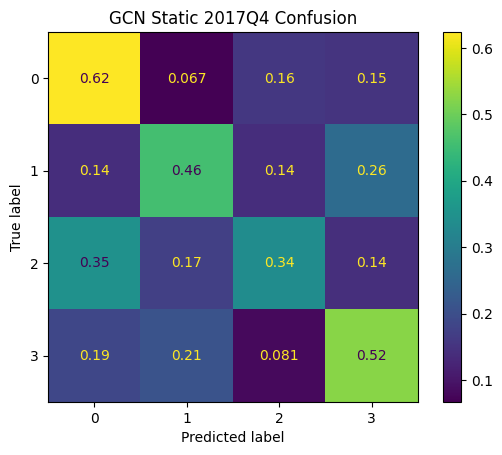


=== 2018Q1 ===
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=0, max=15.26, nan=False
 ▶ raw edge_weight: min=

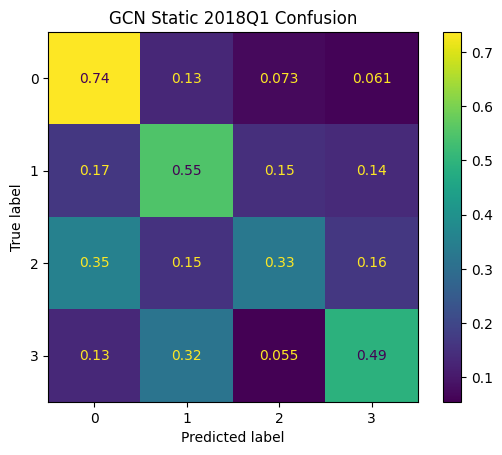


=== 2018Q2 ===
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=0, max=15.04, nan=False
 ▶ raw edge_weight: min=

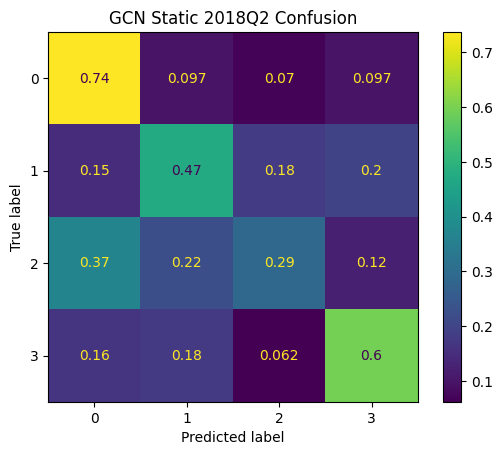


=== 2018Q3 ===
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=0, max=14.82, nan=False
 ▶ raw edge_weight: min=

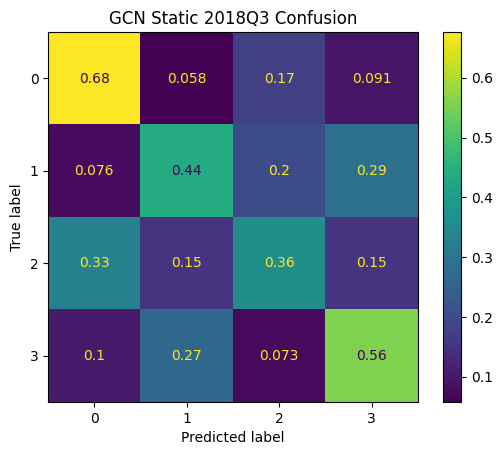


=== 2018Q4 ===
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=0, max=15.21, nan=False
 ▶ raw edge_weight: min=

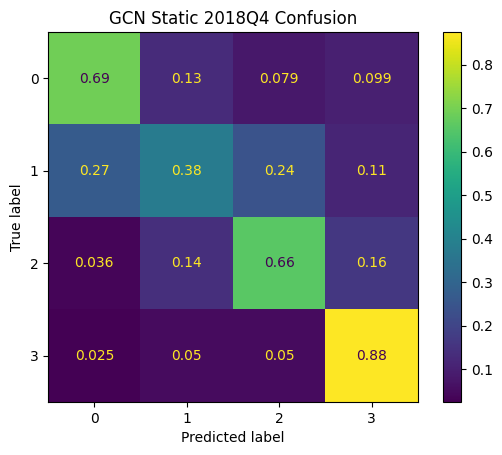


=== 2019Q1 ===
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=

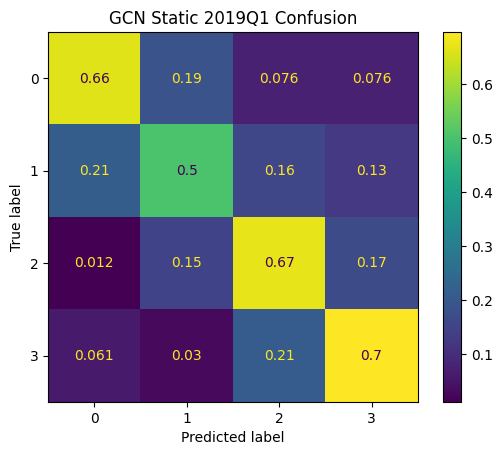


=== 2019Q2 ===
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=0, max=15.11, nan=False
 ▶ raw edge_weight: min=

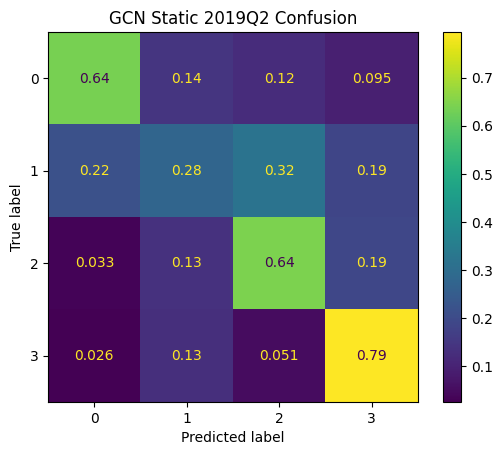


=== 2019Q3 ===
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=0, max=14.89, nan=False
 ▶ raw edge_weight: min=

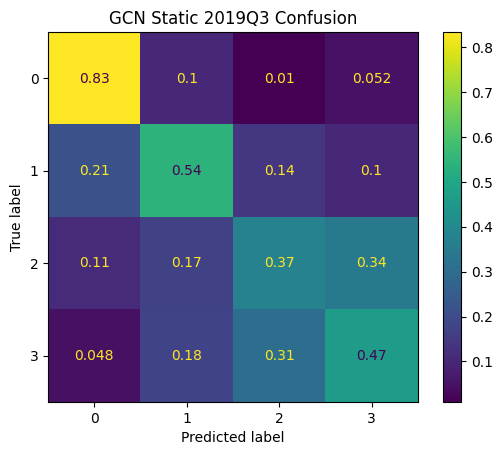


=== 2019Q4 ===
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=0, max=14.78, nan=False
 ▶ raw edge_weight: min=

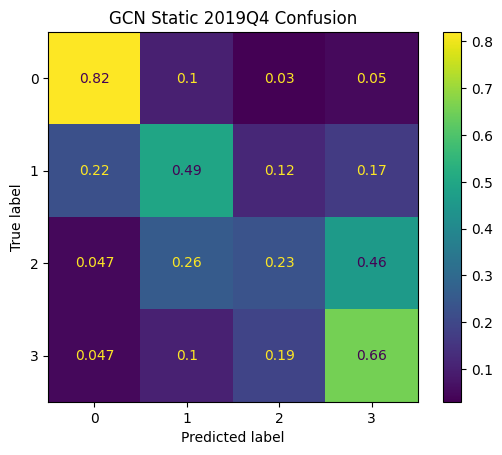


=== 2020Q1 ===
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=0, max=15.64, nan=False
 ▶ raw edge_weight: min=

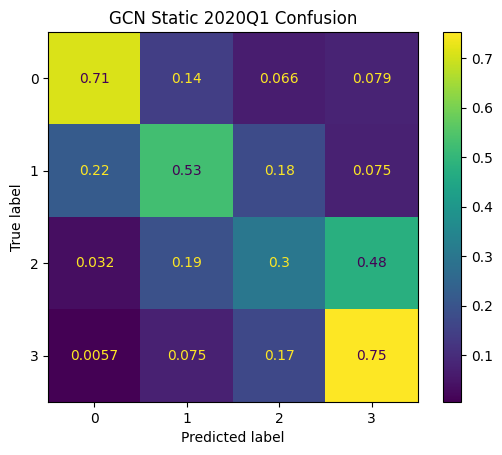


=== 2020Q2 ===
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=0, max=15.42, nan=False
 ▶ raw edge_weight: min=

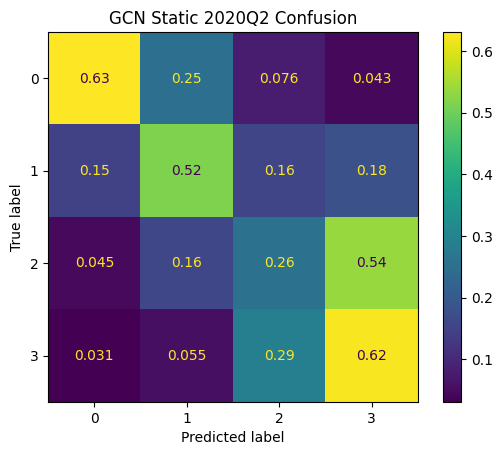


=== 2020Q3 ===
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=

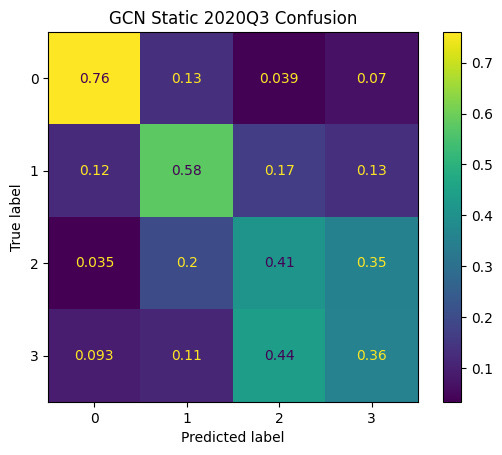


=== 2020Q4 ===
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=0, max=15.45, nan=False
 ▶ raw edge_weight: min=

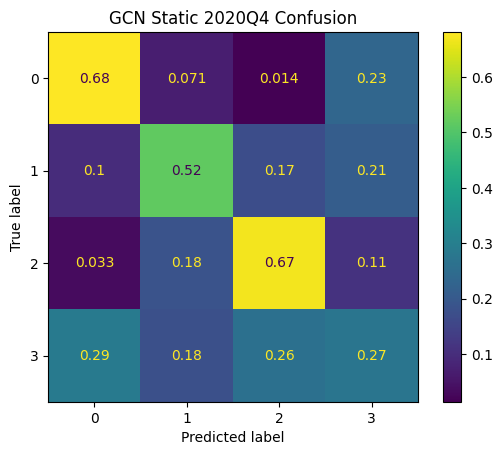


=== 2021Q1 ===
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=0, max=15.23, nan=False
 ▶ raw edge_weight: min=

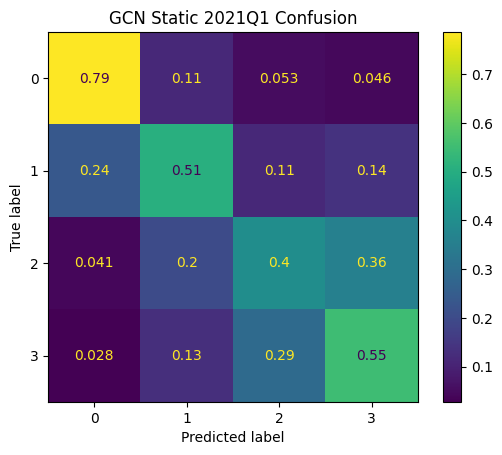


=== 2021Q2 ===
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=0, max=15.01, nan=False
 ▶ raw edge_weight: min=

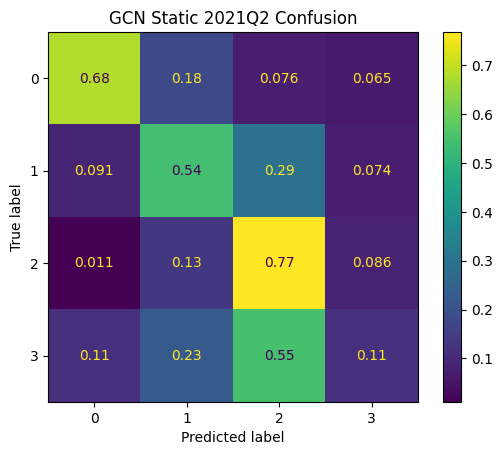


=== 2021Q3 ===
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=0, max=15.19, nan=False
 ▶ raw edge_weight: min=

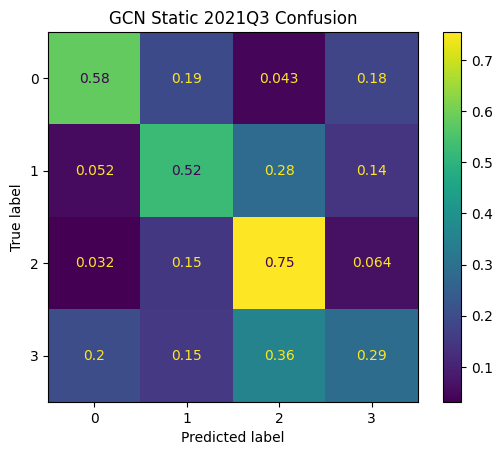


=== 2021Q4 ===
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=0, max=14.96, nan=False
 ▶ raw edge_weight: min=

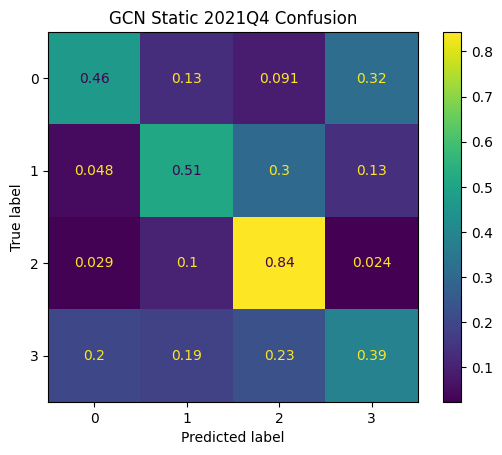


=== 2022Q1 ===
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=0, max=15.25, nan=False
 ▶ raw edge_weight: min=

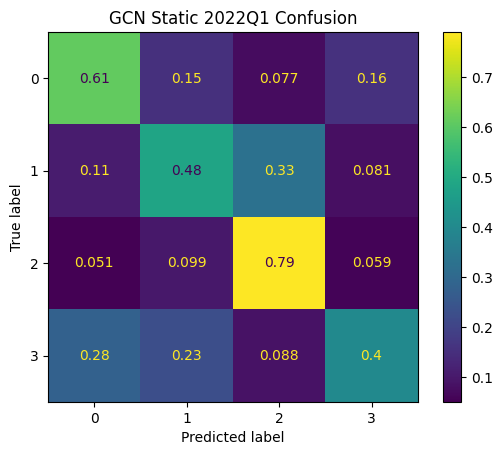


=== 2022Q2 ===
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=0, max=15.33, nan=False
 ▶ raw edge_weight: min=

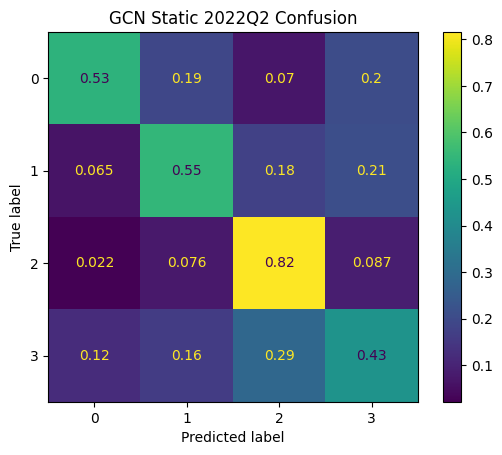


=== 2022Q3 ===
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=0, max=15.18, nan=False
 ▶ raw edge_weight: min=

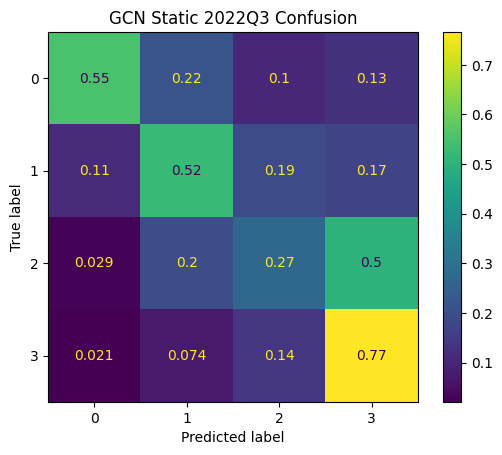


=== 2022Q4 ===
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=0, max=14.95, nan=False
 ▶ raw edge_weight: min=

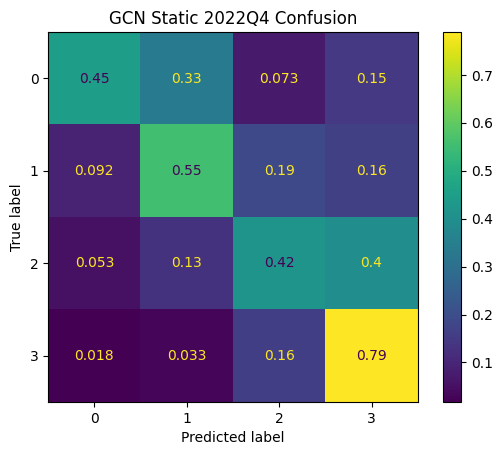


=== 2023Q1 ===


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, nan=False
 ▶ raw edge_weight: min=0, max=16.96, na

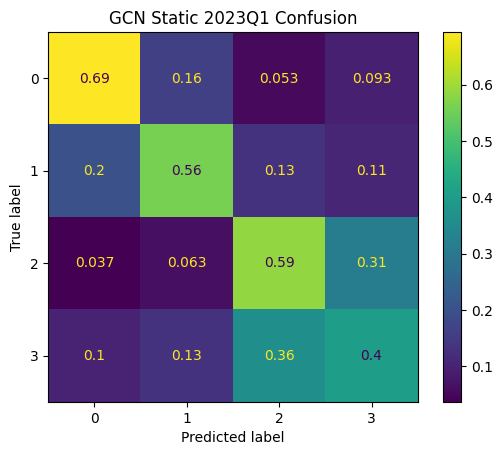


=== 2023Q2 ===
 ▶ raw edge_weight: min=0, max=15.08, nan=False


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, nan=False
 ▶ raw edge_weight: min=0, max=15.08, na

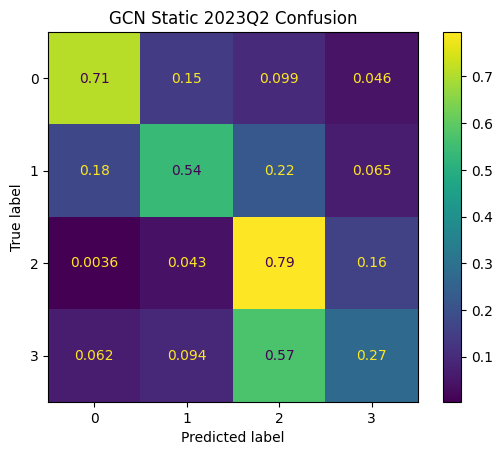


=== 2023Q3 ===


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, nan=False
 ▶ raw edge_weight: min=0, max=14.65, na

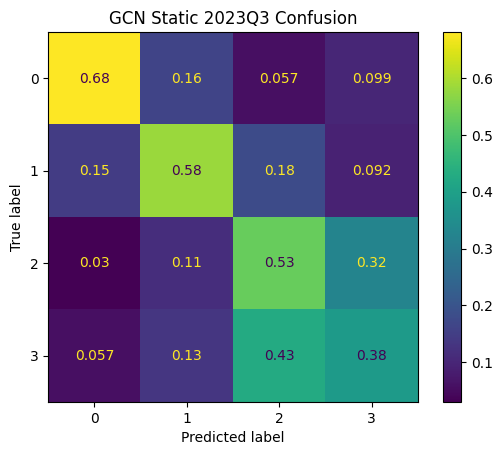

In [ ]:
##########
# Working STATIC GCN with failed banks
##########

import glob
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics               import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot           as plt
import os
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# File patterns
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# Load files
nodes_paths = sorted(glob.glob(NODES_PAT))
edges_paths = sorted(glob.glob(EDGES_PAT))

nodes_list = [pd.read_csv(path) for path in nodes_paths]
edges_list = [pd.read_csv(path) for path in edges_paths]
quarters    = [os.path.basename(p).replace('.csv','').replace('edge_','') for p in nodes_paths]

def make_preprocessor():
    return Pipeline([
        ("clip_equity", FunctionTransformer(
            lambda X: np.column_stack([
                X[:,0], X[:,1], np.clip(X[:,2],0,None),
                X[:,3], X[:,4], X[:,5:]
            ]), validate=True)),
        ("clip_degrees", FunctionTransformer(
            lambda X: np.column_stack([
                X[:,:5],
                np.clip(X[:,5],0,None),
                np.clip(X[:,6],0,None),
                np.clip(X[:,7],0,None),
                np.clip(X[:,8],0,None)
            ]), validate=True)),
        ("log1p", FunctionTransformer(np.log1p, validate=True)),
        ("robust", RobustScaler()),
    ])

# Enrichment
def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'index' not in df.columns:
        raise KeyError("'index' column missing")
    df.insert(0, 'BankID', df.index.astype(str))
    e = edges_df.copy()
    e['Sourceid'] = e['Sourceid'].astype(str).str.strip()
    e['Targetid'] = e['Targetid'].astype(str).str.strip()
    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')
    node_feats = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
                  .fillna(0)
                  .reset_index()
                  .rename(columns={'index':'BankID'}))
    merged = pd.merge(df, node_feats, on='BankID', how='left')
    merged[['in_degree','out_degree','in_wdeg','out_wdeg']] = \
        merged[['in_degree','out_degree','in_wdeg','out_wdeg']].fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

# Enrich and filter quarters
enriched = []
for df, ed, q in zip(nodes_list, edges_list, quarters):
    enr = enrich_nodes(df, ed)
    if TARGET in enr.columns:
        enriched.append((enr, ed, q))

# ─── 1) Build a global BankID→idx map once ─────────────────────────────────
all_bank_ids      = []
persistent_failed = set()
# start at index 7 so that 2017Q4 is included
for path_node, path_edge in zip(nodes_paths[7:31], edges_paths[7:31]):
    nd = pd.read_csv(path_node)
    ed = pd.read_csv(path_edge)
    all_bank_ids.append(enrich_nodes(nd, ed)['BankID'])
all_bank_ids = pd.unique(pd.concat(all_bank_ids))
id_to_idx    = {bid: i for i, bid in enumerate(all_bank_ids)}

# ─── 2) Loop over each quarter and train ────────────────────────────────────
results = []
for path_node, path_edge in zip(
        nodes_paths[7:len(nodes_paths) - 1],
        edges_paths[7:len(edges_paths) - 1]
    ):

    quarter_name = os.path.basename(path_node).replace(".csv","")
    print(f"\n=== {quarter_name} ===")
    # a) load
    nodes_df = pd.read_csv(path_node)
    edges_df = pd.read_csv(path_edge)

    # b) enrich & preprocess
    en_df = enrich_nodes(nodes_df, edges_df)
    pre   = make_preprocessor().fit(en_df[FEATURES].values)
    X_np  = pre.transform(en_df[FEATURES].values)

    raw = en_df[FEATURES].values
    newly_failed = set(en_df['BankID'].iloc[np.where(raw[:,2] < 0)[0]])
    persistent_failed |= newly_failed

    # Mask for this quarter includes all previously failed
    dead = np.array([bid in persistent_failed for bid in en_df['BankID'].values])
    zeroed_idx = np.where(dead)[0]
    feats = pre.transform(raw)
    feats[dead] = 0
    x = torch.tensor(feats, dtype=torch.float, device=DEVICE)

    # Build graph structure
    lm = {b: idx for idx, b in enumerate(en_df['BankID'].values)}
    src = edges_df['Sourceid'].astype(str).map(lm).fillna(-1).astype(int)
    dst = edges_df['Targetid'].astype(str).map(lm).fillna(-1).astype(int)
    valid = (src >= 0) & (dst >= 0)
    src, dst = src[valid], dst[valid]
    keep = (~dead[src]) & (~dead[dst])
    edge_index = torch.tensor([src[keep], dst[keep]], dtype=torch.long, device=DEVICE)

    edges_df['Weights'] = edges_df['Weights'].clip(lower=0)
    edges_df['Weights'] = np.log1p(edges_df['Weights'].values)
    edge_weight = torch.tensor(edges_df['Weights'].values[valid][keep], dtype=torch.float, device=DEVICE)

    graph_structure = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

    # d) build labels and masks
    y_np = en_df[TARGET].values - 1
    y = torch.tensor(y_np, dtype=torch.long, device=DEVICE)
    N = x.size(0)
    perm = torch.randperm(N)
    n_train = int(0.6*N); n_val = int(0.2*N)
    train_mask = torch.zeros(N, dtype=torch.bool, device=DEVICE)
    val_mask   = torch.zeros(N, dtype=torch.bool, device=DEVICE)
    test_mask  = torch.zeros(N, dtype=torch.bool, device=DEVICE)
    train_mask[perm[:n_train]]              = True
    val_mask[perm[n_train:n_train+n_val]]   = True
    test_mask[perm[n_train+n_val:]]         = True

    data = Data(x=x, y=y, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask).to(DEVICE)

    # e) class weights
    y_t = y_np.copy()
    y_t[dead] = -100
    valid_idx = y_t != -100
    classes = np.unique(y_t[valid_idx])
    cw = compute_class_weight("balanced", classes=classes, y=y_t[valid_idx])
    w = np.zeros(int(y_np.max()+1), dtype=float)
    for cls, wgt in zip(classes, cw):
        w[int(cls)] = wgt
    w_tensor = torch.tensor(w, dtype=torch.float, device=DEVICE)

    if dead.any():
        loss_fn = torch.nn.CrossEntropyLoss(weight=w_tensor, ignore_index=-100)
    else:
        loss_fn = torch.nn.CrossEntropyLoss(weight=w_tensor)

    # f) model & optimizer
    in_feats    = data.x.shape[1]
    n_classes   = int(data.y.max().item()) + 1
    gcn_h       = 128
    mlp_h1      = 128
    mlp_h2      = 128

    model = InterbankNetGCN(in_feats, gcn_h, mlp_h1, mlp_h2, n_classes, p_drop=0.1).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

    # g) train
    for epoch in range(1, 50):
        model.train()
        optimizer.zero_grad()
        out = model(
            graph_structure.x,
            edge_index=graph_structure.edge_index,
            edge_weight=graph_structure.edge_weight
        )
        loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        # if torch.isnan(loss) or torch.isinf(loss):
        #     print(f"NaN/Inf loss at epoch {epoch}")
        #     break

    # h) eval
    model.eval()
    with torch.no_grad():
        out   = model(graph_structure.x, edge_index=graph_structure.edge_index)
        preds = out.argmax(dim=1).cpu().numpy()
        ytrue = data.y.cpu().numpy()

    acc = accuracy_score(ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()])
    f1  = f1_score   (ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()], average="macro")
    print(f" → TEST  acc {acc:.3f}, f1 {f1:.3f}")

    disp = ConfusionMatrixDisplay.from_predictions(
        ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()], normalize="true"
    )
    disp.ax_.set_title(f"GCN Static {quarter_name} Confusion")
    plt.savefig(f"GCN_Static_{quarter_name}_confusion")
    plt.show()

    results.append({"quarter": quarter_name, "acc": acc, "f1": f1})

# finally:
pd.DataFrame(results).to_csv("GCN_Static_results_with_failed_banks.csv", index=False)



=== 2018Q1 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(807), np.int64(1): np.int64(865), np.int64(2): np.int64(560), np.int64(3): np.int64(496)}
val class counts: {np.int64(0): np.int64(244), np.int64(1): np.int64(308), np.int64(2): np.int64(192), np.int64(3): np.int64(165)}
test class counts: {np.int64(0): np.int64(272), np.int64(1): np.int64(280), np.int64(2): np.int64(198), np.int64(3): np.int64(161)}
w_tensor tensor([0.8594, 0.7825, 1.1968, 1.3832])
DEBUG --- all ALIVE
 → TEST  acc 0.533, f1 0.507


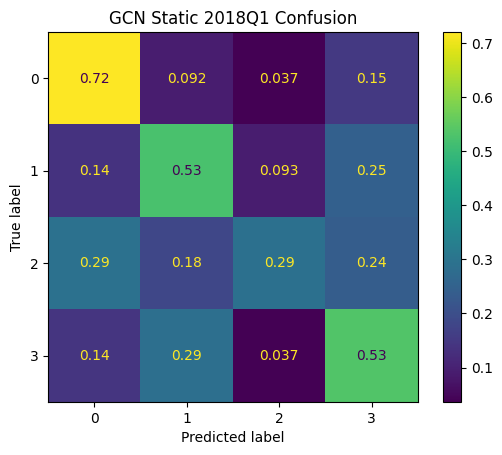


=== 2018Q2 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(670), np.int64(1): np.int64(855), np.int64(2): np.int64(664), np.int64(3): np.int64(539)}
val class counts: {np.int64(0): np.int64(231), np.int64(1): np.int64(284), np.int64(2): np.int64(219), np.int64(3): np.int64(175)}
test class counts: {np.int64(0): np.int64(200), np.int64(1): np.int64(307), np.int64(2): np.int64(214), np.int64(3): np.int64(190)}
w_tensor tensor([1.0327, 0.7863, 1.0365, 1.2577])
DEBUG --- all ALIVE
 → TEST  acc 0.485, f1 0.477


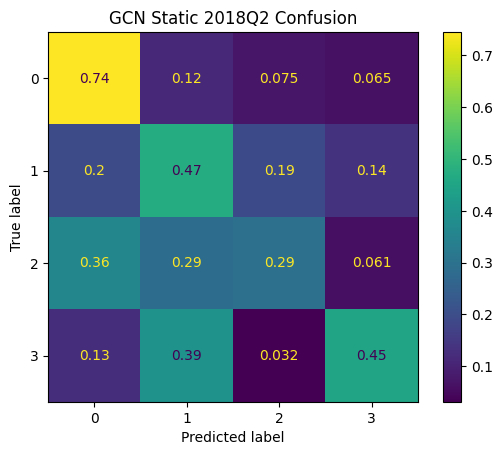


=== 2018Q3 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(614), np.int64(1): np.int64(879), np.int64(2): np.int64(677), np.int64(3): np.int64(558)}
val class counts: {np.int64(0): np.int64(252), np.int64(1): np.int64(293), np.int64(2): np.int64(203), np.int64(3): np.int64(161)}
test class counts: {np.int64(0): np.int64(235), np.int64(1): np.int64(274), np.int64(2): np.int64(217), np.int64(3): np.int64(185)}
w_tensor tensor([1.0327, 0.7863, 1.0365, 1.2577])
DEBUG --- all ALIVE
 → TEST  acc 0.487, f1 0.477


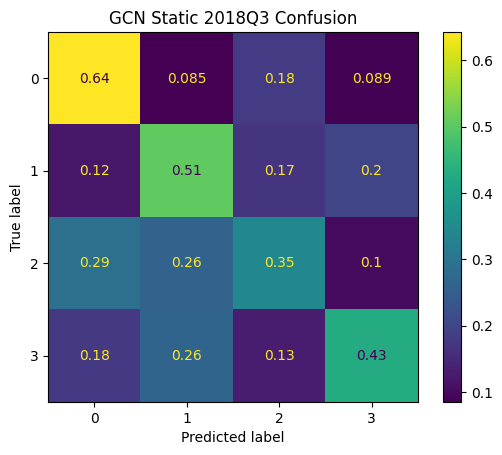


=== 2018Q4 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(713), np.int64(1): np.int64(728), np.int64(2): np.int64(1178), np.int64(3): np.int64(109)}
val class counts: {np.int64(0): np.int64(223), np.int64(1): np.int64(259), np.int64(2): np.int64(393), np.int64(3): np.int64(34)}
test class counts: {np.int64(0): np.int64(228), np.int64(1): np.int64(257), np.int64(2): np.int64(382), np.int64(3): np.int64(44)}
w_tensor tensor([0.9768, 0.9140, 0.5822, 6.0802])
DEBUG --- all ALIVE
 → TEST  acc 0.551, f1 0.501


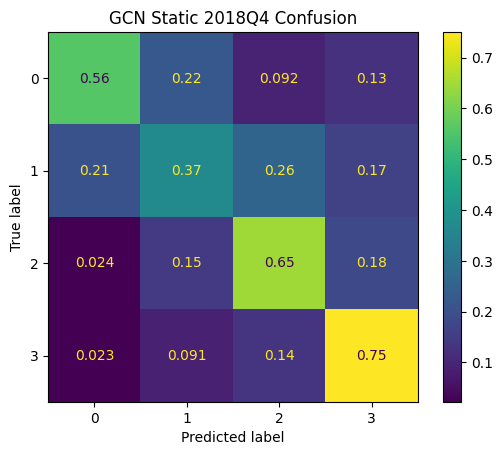


=== 2019Q1 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(547), np.int64(1): np.int64(813), np.int64(2): np.int64(1276), np.int64(3): np.int64(92)}
val class counts: {np.int64(0): np.int64(184), np.int64(1): np.int64(267), np.int64(2): np.int64(423), np.int64(3): np.int64(35)}
test class counts: {np.int64(0): np.int64(167), np.int64(1): np.int64(288), np.int64(2): np.int64(414), np.int64(3): np.int64(42)}
w_tensor tensor([1.2661, 0.8311, 0.5381, 6.7278])
DEBUG --- all ALIVE
 → TEST  acc 0.566, f1 0.506


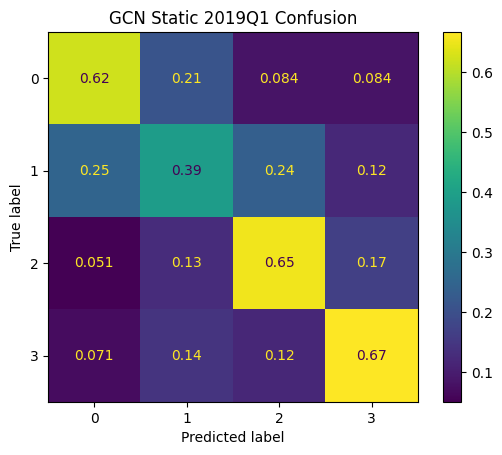


=== 2019Q2 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(717), np.int64(1): np.int64(936), np.int64(2): np.int64(970), np.int64(3): np.int64(105)}
val class counts: {np.int64(0): np.int64(251), np.int64(1): np.int64(295), np.int64(2): np.int64(337), np.int64(3): np.int64(26)}
test class counts: {np.int64(0): np.int64(225), np.int64(1): np.int64(319), np.int64(2): np.int64(332), np.int64(3): np.int64(35)}
w_tensor tensor([0.9531, 0.7335, 0.6937, 6.8494])
DEBUG --- all ALIVE
 → TEST  acc 0.540, f1 0.494


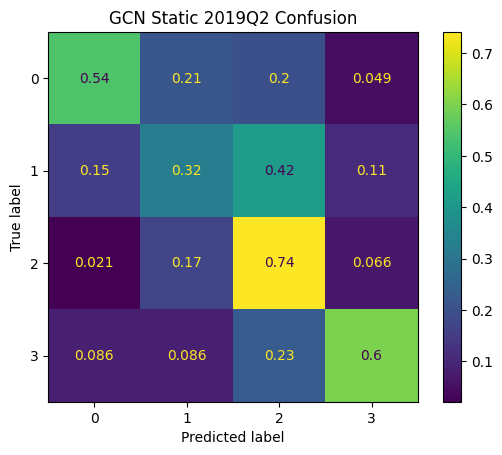


=== 2019Q3 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(290), np.int64(1): np.int64(810), np.int64(2): np.int64(1143), np.int64(3): np.int64(485)}
val class counts: {np.int64(0): np.int64(113), np.int64(1): np.int64(287), np.int64(2): np.int64(372), np.int64(3): np.int64(137)}
test class counts: {np.int64(0): np.int64(83), np.int64(1): np.int64(278), np.int64(2): np.int64(409), np.int64(3): np.int64(141)}
w_tensor tensor([2.3395, 0.8269, 0.5910, 1.4902])
DEBUG --- all ALIVE
 → TEST  acc 0.492, f1 0.491


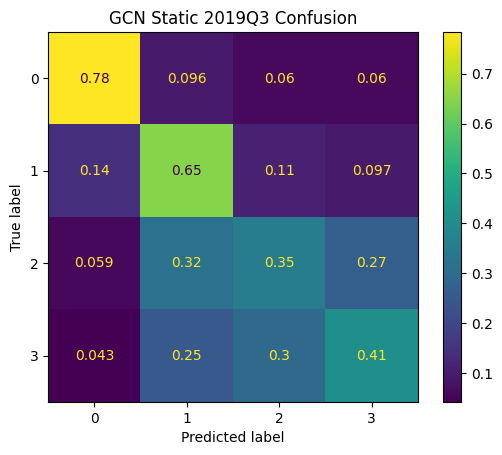


=== 2019Q4 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(253), np.int64(1): np.int64(721), np.int64(2): np.int64(1083), np.int64(3): np.int64(671)}
val class counts: {np.int64(0): np.int64(76), np.int64(1): np.int64(249), np.int64(2): np.int64(353), np.int64(3): np.int64(231)}
test class counts: {np.int64(0): np.int64(92), np.int64(1): np.int64(225), np.int64(2): np.int64(354), np.int64(3): np.int64(240)}
w_tensor tensor([2.7007, 0.9515, 0.6352, 0.9956])
DEBUG --- all ALIVE
 → TEST  acc 0.457, f1 0.480


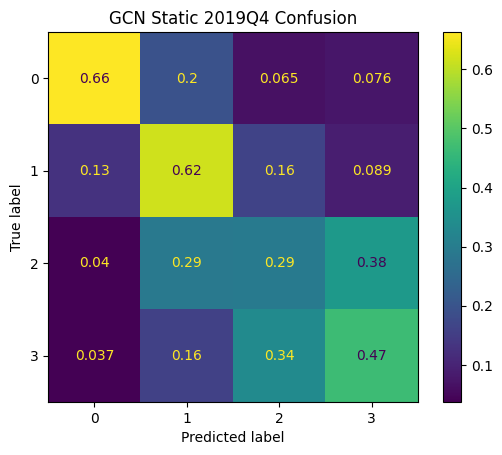


=== 2020Q1 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(248), np.int64(1): np.int64(647), np.int64(2): np.int64(1287), np.int64(3): np.int64(546)}
val class counts: {np.int64(0): np.int64(78), np.int64(1): np.int64(218), np.int64(2): np.int64(461), np.int64(3): np.int64(152)}
test class counts: {np.int64(0): np.int64(79), np.int64(1): np.int64(225), np.int64(2): np.int64(431), np.int64(3): np.int64(176)}
w_tensor tensor([2.8074, 1.0431, 0.5218, 1.3009])
DEBUG --- all ALIVE
 → TEST  acc 0.479, f1 0.489


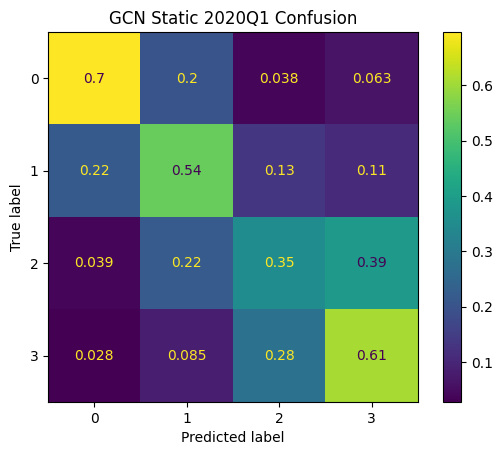


=== 2020Q2 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(280), np.int64(1): np.int64(883), np.int64(2): np.int64(1190), np.int64(3): np.int64(375)}
val class counts: {np.int64(0): np.int64(108), np.int64(1): np.int64(305), np.int64(2): np.int64(381), np.int64(3): np.int64(115)}
test class counts: {np.int64(0): np.int64(95), np.int64(1): np.int64(314), np.int64(2): np.int64(383), np.int64(3): np.int64(119)}
w_tensor tensor([2.3540, 0.7570, 0.5819, 1.8670])
DEBUG --- all ALIVE
 → TEST  acc 0.459, f1 0.456


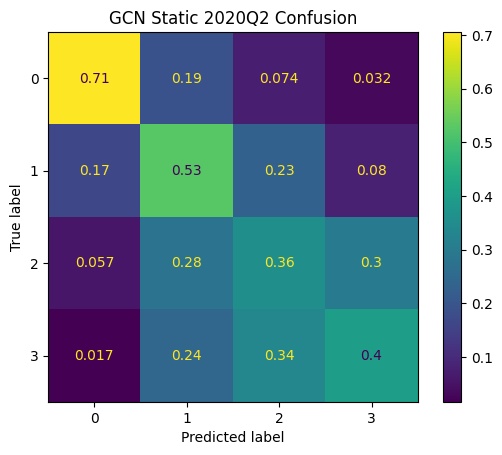


=== 2020Q3 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(390), np.int64(1): np.int64(1040), np.int64(2): np.int64(1039), np.int64(3): np.int64(259)}
val class counts: {np.int64(0): np.int64(123), np.int64(1): np.int64(338), np.int64(2): np.int64(347), np.int64(3): np.int64(101)}
test class counts: {np.int64(0): np.int64(111), np.int64(1): np.int64(344), np.int64(2): np.int64(352), np.int64(3): np.int64(104)}
w_tensor tensor([1.8221, 0.6603, 0.6542, 2.4504])
DEBUG --- all ALIVE
 → TEST  acc 0.533, f1 0.495


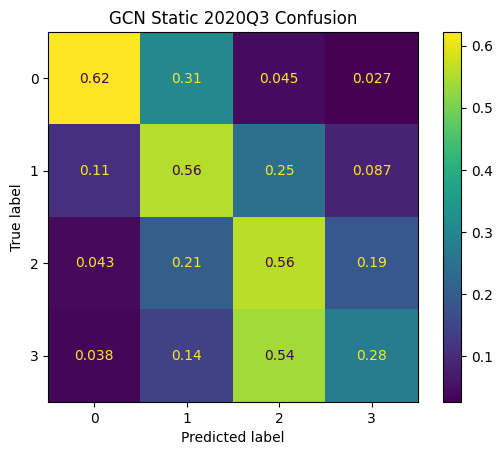


=== 2020Q4 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(453), np.int64(1): np.int64(1253), np.int64(2): np.int64(783), np.int64(3): np.int64(239)}
val class counts: {np.int64(0): np.int64(158), np.int64(1): np.int64(405), np.int64(2): np.int64(258), np.int64(3): np.int64(88)}
test class counts: {np.int64(0): np.int64(143), np.int64(1): np.int64(423), np.int64(2): np.int64(261), np.int64(3): np.int64(84)}
w_tensor tensor([1.5080, 0.5464, 0.8733, 2.7664])
DEBUG --- all ALIVE
 → TEST  acc 0.581, f1 0.490


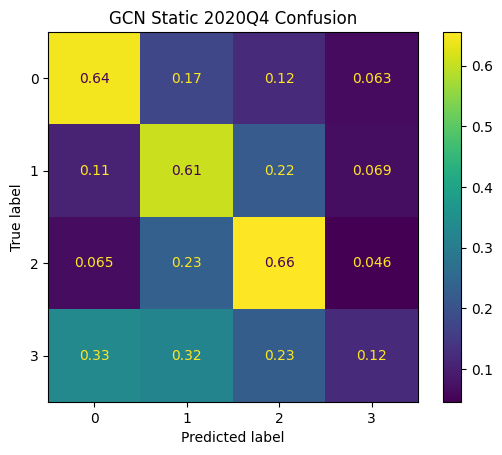


=== 2021Q1 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(405), np.int64(1): np.int64(1073), np.int64(2): np.int64(913), np.int64(3): np.int64(337)}
val class counts: {np.int64(0): np.int64(148), np.int64(1): np.int64(358), np.int64(2): np.int64(294), np.int64(3): np.int64(109)}
test class counts: {np.int64(0): np.int64(145), np.int64(1): np.int64(352), np.int64(2): np.int64(298), np.int64(3): np.int64(116)}
w_tensor tensor([1.6289, 0.6377, 0.7555, 2.0231])
DEBUG --- all ALIVE
 → TEST  acc 0.515, f1 0.497


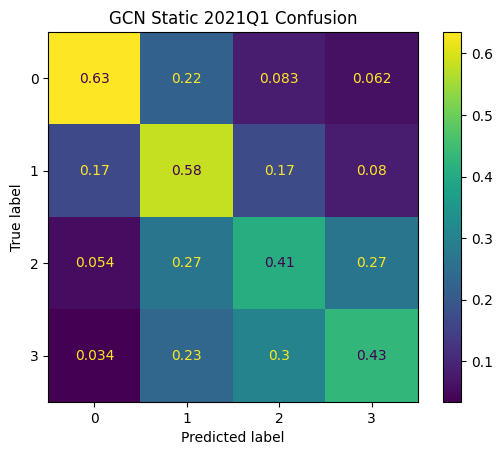


=== 2021Q2 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(565), np.int64(1): np.int64(1241), np.int64(2): np.int64(759), np.int64(3): np.int64(163)}
val class counts: {np.int64(0): np.int64(186), np.int64(1): np.int64(418), np.int64(2): np.int64(241), np.int64(3): np.int64(64)}
test class counts: {np.int64(0): np.int64(179), np.int64(1): np.int64(406), np.int64(2): np.int64(265), np.int64(3): np.int64(61)}
w_tensor tensor([1.2226, 0.5506, 0.8988, 3.9479])
DEBUG --- all ALIVE
 → TEST  acc 0.561, f1 0.471


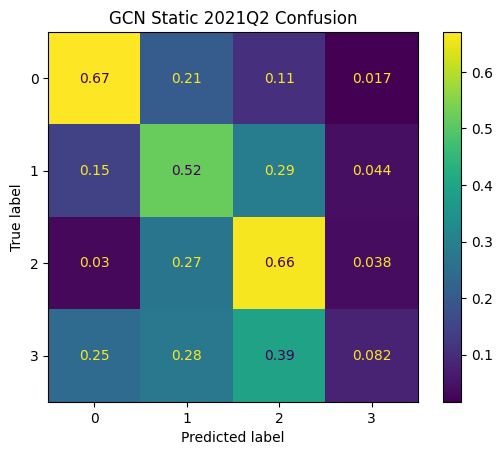


=== 2021Q3 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(637), np.int64(1): np.int64(1254), np.int64(2): np.int64(662), np.int64(3): np.int64(175)}
val class counts: {np.int64(0): np.int64(219), np.int64(1): np.int64(411), np.int64(2): np.int64(215), np.int64(3): np.int64(64)}
test class counts: {np.int64(0): np.int64(239), np.int64(1): np.int64(395), np.int64(2): np.int64(214), np.int64(3): np.int64(63)}
w_tensor tensor([1.0384, 0.5519, 1.0422, 3.7649])
DEBUG --- all ALIVE
 → TEST  acc 0.594, f1 0.513


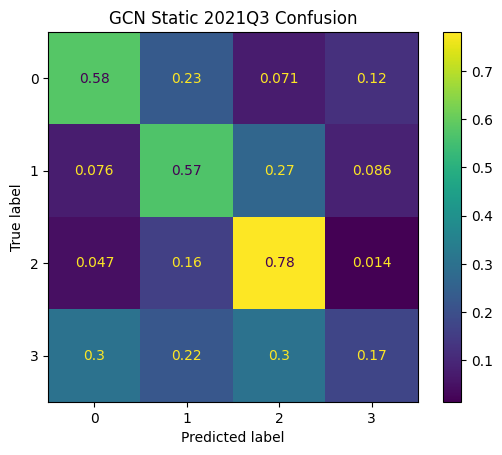


=== 2021Q4 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(726), np.int64(1): np.int64(1180), np.int64(2): np.int64(630), np.int64(3): np.int64(192)}
val class counts: {np.int64(0): np.int64(236), np.int64(1): np.int64(405), np.int64(2): np.int64(212), np.int64(3): np.int64(56)}
test class counts: {np.int64(0): np.int64(241), np.int64(1): np.int64(408), np.int64(2): np.int64(202), np.int64(3): np.int64(60)}
w_tensor tensor([0.9451, 0.5705, 1.0891, 3.6916])
DEBUG --- all ALIVE
 → TEST  acc 0.589, f1 0.528


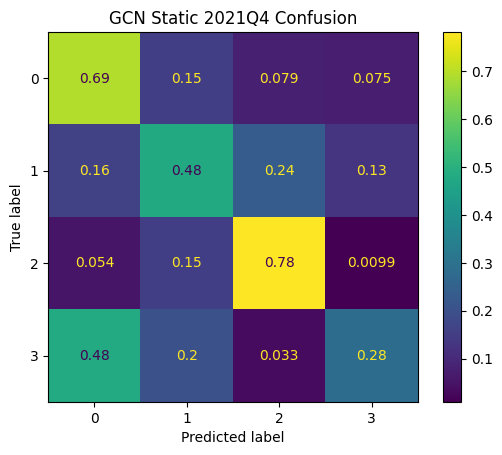


=== 2022Q1 ===
Exist
{np.False_: np.int64(4548)}
train class counts: {np.int64(0): np.int64(618), np.int64(1): np.int64(1204), np.int64(2): np.int64(763), np.int64(3): np.int64(143)}
val class counts: {np.int64(0): np.int64(240), np.int64(1): np.int64(352), np.int64(2): np.int64(263), np.int64(3): np.int64(54)}
test class counts: {np.int64(0): np.int64(210), np.int64(1): np.int64(400), np.int64(2): np.int64(248), np.int64(3): np.int64(53)}
w_tensor tensor([1.0646, 0.5813, 0.8925, 4.5480])
DEBUG --- all ALIVE
 → TEST  acc 0.583, f1 0.511


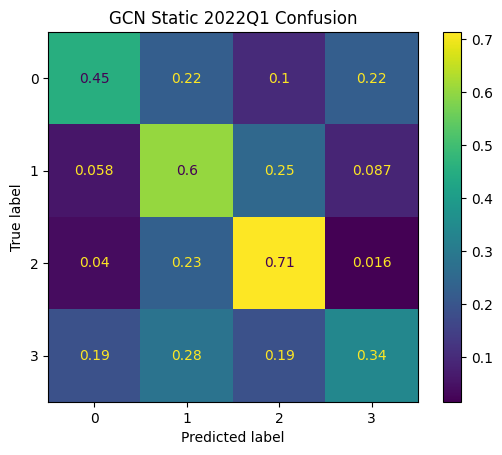


=== 2022Q2 ===
Exist
{np.False_: np.int64(4539), np.True_: np.int64(9)}
train class counts: {np.int64(0): np.int64(567), np.int64(1): np.int64(1165), np.int64(2): np.int64(850), np.int64(3): np.int64(146)}
val class counts: {np.int64(0): np.int64(195), np.int64(1): np.int64(379), np.int64(2): np.int64(295), np.int64(3): np.int64(40)}
test class counts: {np.int64(0): np.int64(213), np.int64(1): np.int64(375), np.int64(2): np.int64(277), np.int64(3): np.int64(46)}
w_tensor tensor([1.1747, 0.5913, 0.7980, 4.8912])
DEBUG --- FAILED banks
 → TEST  acc 0.574, f1 0.509


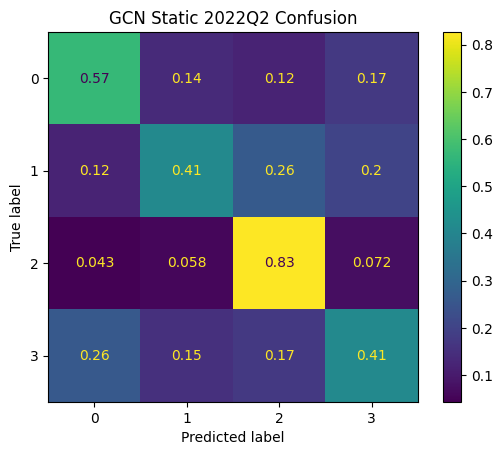


=== 2022Q3 ===
Exist
{np.False_: np.int64(4521), np.True_: np.int64(27)}
train class counts: {np.int64(0): np.int64(327), np.int64(1): np.int64(873), np.int64(2): np.int64(931), np.int64(3): np.int64(597)}
val class counts: {np.int64(0): np.int64(118), np.int64(1): np.int64(277), np.int64(2): np.int64(302), np.int64(3): np.int64(212)}
test class counts: {np.int64(0): np.int64(105), np.int64(1): np.int64(288), np.int64(2): np.int64(321), np.int64(3): np.int64(197)}
w_tensor tensor([2.1205, 0.7915, 0.7273, 1.1235])
DEBUG --- FAILED banks
 → TEST  acc 0.479, f1 0.478


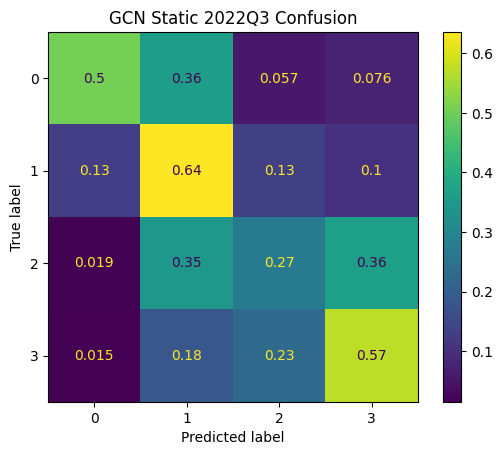


=== 2022Q4 ===
Exist
{np.False_: np.int64(4519), np.True_: np.int64(29)}
train class counts: {np.int64(0): np.int64(291), np.int64(1): np.int64(776), np.int64(2): np.int64(889), np.int64(3): np.int64(772)}
val class counts: {np.int64(0): np.int64(97), np.int64(1): np.int64(263), np.int64(2): np.int64(283), np.int64(3): np.int64(266)}
test class counts: {np.int64(0): np.int64(100), np.int64(1): np.int64(237), np.int64(2): np.int64(297), np.int64(3): np.int64(277)}
w_tensor tensor([2.3935, 0.8931, 0.7701, 0.8591])
DEBUG --- FAILED banks
 → TEST  acc 0.507, f1 0.508


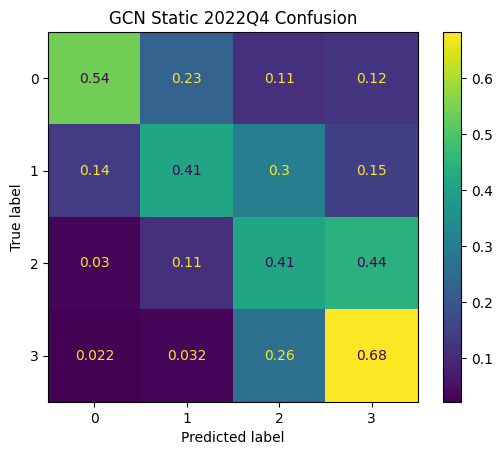


=== 2023Q1 ===
Exist
{np.False_: np.int64(4517), np.True_: np.int64(31)}
train class counts: {np.int64(0): np.int64(447), np.int64(1): np.int64(1052), np.int64(2): np.int64(810), np.int64(3): np.int64(419)}
val class counts: {np.int64(0): np.int64(169), np.int64(1): np.int64(344), np.int64(2): np.int64(269), np.int64(3): np.int64(127)}
test class counts: {np.int64(0): np.int64(151), np.int64(1): np.int64(368), np.int64(2): np.int64(264), np.int64(3): np.int64(128)}
w_tensor tensor([1.5219, 0.6416, 0.8408, 1.6804])
DEBUG --- FAILED banks


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


 → TEST  acc 0.593, f1 0.547


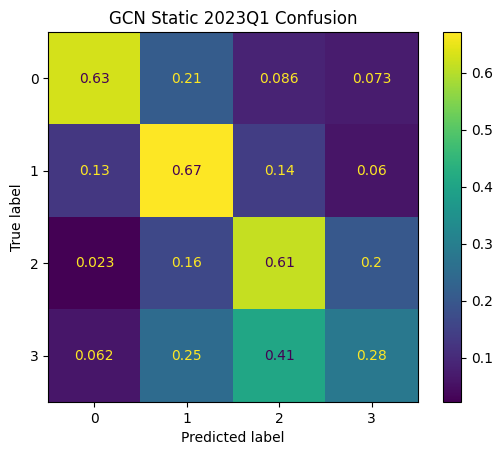


=== 2023Q2 ===
Exist
{np.False_: np.int64(4516), np.True_: np.int64(32)}
train class counts: {np.int64(0): np.int64(430), np.int64(1): np.int64(1074), np.int64(2): np.int64(845), np.int64(3): np.int64(379)}
val class counts: {np.int64(0): np.int64(158), np.int64(1): np.int64(342), np.int64(2): np.int64(276), np.int64(3): np.int64(133)}
test class counts: {np.int64(0): np.int64(128), np.int64(1): np.int64(335), np.int64(2): np.int64(318), np.int64(3): np.int64(130)}
w_tensor tensor([1.6315, 0.6474, 0.7846, 1.7613])
DEBUG --- FAILED banks


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


 → TEST  acc 0.600, f1 0.548


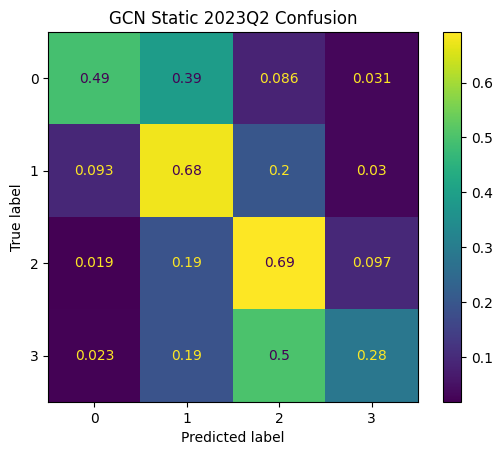


=== 2023Q3 ===


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


Exist
{np.False_: np.int64(4513), np.True_: np.int64(35)}
train class counts: {np.int64(0): np.int64(420), np.int64(1): np.int64(1041), np.int64(2): np.int64(788), np.int64(3): np.int64(479)}
val class counts: {np.int64(0): np.int64(136), np.int64(1): np.int64(341), np.int64(2): np.int64(263), np.int64(3): np.int64(169)}
test class counts: {np.int64(0): np.int64(119), np.int64(1): np.int64(332), np.int64(2): np.int64(283), np.int64(3): np.int64(177)}
w_tensor tensor([1.7252, 0.6621, 0.8458, 1.3742])
DEBUG --- FAILED banks
 → TEST  acc 0.550, f1 0.551


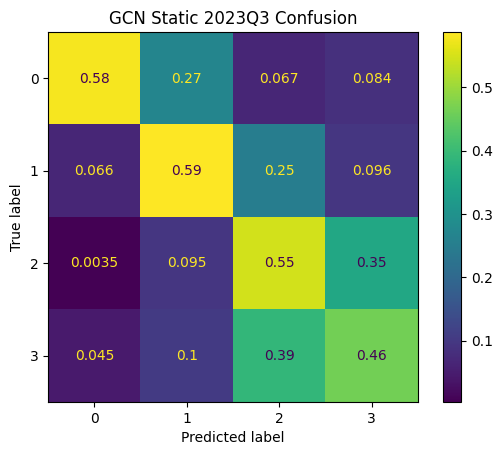

In [ ]:
##############
# Working GCN static
###############
import glob
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics               import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot           as plt
import glob
import os
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler


DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# File patterns
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# Load files
nodes_paths = sorted(glob.glob(NODES_PAT))
edges_paths = sorted(glob.glob(EDGES_PAT))

nodes_list = [pd.read_csv(path) for path in nodes_paths]
edges_list = [pd.read_csv(path) for path in edges_paths]
quarters = [os.path.basename(p).replace('.csv','').replace('edge_','') for p in nodes_paths]

def make_preprocessor():
    return Pipeline([
        ("clip_equity", FunctionTransformer(
            lambda X: np.column_stack([X[:,0], X[:,1], np.clip(X[:,2],0,None), X[:,3], X[:,4], X[:,5:]]), validate=True)),
        ("clip_degrees", FunctionTransformer(
            lambda X: np.column_stack([X[:,:5], np.clip(X[:,5],0,None), np.clip(X[:,6],0,None), np.clip(X[:,7],0,None), np.clip(X[:,8],0,None)]), validate=True)),
        ("log1p", FunctionTransformer(np.log1p, validate=True)),
        ("robust", RobustScaler()),
    ])

# Enrichment
def enrich_nodes(nodes_df, edges_df):
    df = nodes_df.copy()
    if 'index' not in df.columns:
        raise KeyError("'index' column missing")
    df.insert(0, 'BankID', df.index.astype(str))
    e = edges_df.copy()
    e['Sourceid'] = e['Sourceid'].astype(str).str.strip()
    e['Targetid'] = e['Targetid'].astype(str).str.strip()
    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')
    node_feats = (pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)
                  .fillna(0)
                  .reset_index()
                  .rename(columns={'index':'BankID'}))
    merged = pd.merge(df, node_feats, on='BankID', how='left')
    merged[['in_degree','out_degree','in_wdeg','out_wdeg']] = merged[['in_degree','out_degree','in_wdeg','out_wdeg']].fillna(0)
    if TARGET in df.columns:
        merged[TARGET] = df[TARGET].values
    return merged

# Enrich and filter quarters
enriched = []
for df, ed, q in zip(nodes_list, edges_list, quarters):
    enr = enrich_nodes(df, ed)
    if TARGET in enr.columns:
        enriched.append((enr, ed, q))


FEATURES = [
    "Total_assets","Total_liabilities","Equity","Liquid_assets","Tier_1_Capital",
    "in_degree","out_degree","in_wdeg","out_wdeg"
]
TARGET = "rank_next_quarter"
usable = enriched[:-1]
T = len(usable)
#labels = np.concatenate([df[TARGET].values - 1 for df,_,_ in usable[warmup:]])
#out_classes = int(np.unique(labels).max() + 1)
#print("Classes:", out_classes)
all_bank_ids = []
persistent_failed = set()
# in_feats    = data.x.shape[1]
# hidden_feats= 256
# num_classes = int(data.y.max().item()) + 1

for path_node, path_edge in zip(nodes_paths[8:31], edges_paths[8:31]):
    nd = pd.read_csv(path_node)
    ed = pd.read_csv(path_edge)
    all_bank_ids.append(enrich_nodes(nd, ed)['BankID'])
all_bank_ids = pd.unique(pd.concat(all_bank_ids))
id_to_idx    = {bid: i for i, bid in enumerate(all_bank_ids)}
#%%
# ─── 2) Loop over each quarter and train ────────────────────────────────────
results = []
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for path_node, path_edge in zip(nodes_paths[8:len(nodes_paths) - 1], edges_paths[8:len(edges_paths) - 1]):
    quarter_name = path_node.split("/")[-1].replace(".csv","")
    print(f"\n=== {quarter_name} ===")
    # a) load
    nodes_df = pd.read_csv(path_node)
    edges_df = pd.read_csv(path_edge)

    # b) enrich & preprocess
    en_df = enrich_nodes(nodes_df, edges_df)
    pre   = make_preprocessor().fit(en_df[FEATURES].values)
    X_np  = pre.transform(en_df[FEATURES].values)
    # ─── DEBUG: find any NaNs or Infs in the normalized array
    nan_rows = np.where(np.isnan(X_np).any(axis=1))[0]
    inf_rows = np.where(np.isinf(X_np).any(axis=1))[0]
    try:
      en_df['BankID']
      print("Exist")
    except:
      print("fail")
    raw = en_df[FEATURES].values
    newly_failed = set(en_df['BankID'].iloc[np.where(raw[:,2]<0)[0]])
    persistent_failed |= newly_failed
    # Mask for this quarter includes all previously failed
    dead = np.array([bid in persistent_failed for bid in en_df['BankID'].values])
    unique, counts = np.unique(dead, return_counts=True)
    print(dict(zip(unique, counts)))
    zeroed_idx = np.where(dead)[0]
    feats = pre.transform(raw)
    feats[dead] = 0
    x = torch.tensor(feats, dtype=torch.float, device=DEVICE)
    lm = {b: idx for idx, b in enumerate(en_df['BankID'].astype(str))}
    edges_df['Sourceid'] = edges_df['Sourceid'].astype(str)
    src = edges_df['Sourceid'].map(lm)
    edges_df['Targetid'] = edges_df['Targetid'].astype(str)
    dst = edges_df['Targetid'].map(lm)
    valid = (src>=0)&(dst>=0)
    src, dst = src[valid], dst[valid]
    keep = (~dead[src]) & (~dead[dst])
    edge_index = torch.tensor([src[keep], dst[keep]], dtype=torch.long, device=DEVICE)
    edges_df['Weights'] = edges_df['Weights'].clip(lower=0)
    edges_df['Weights'] = np.log1p(edges_df['Weights'].values)

    edge_weight = torch.tensor(edges_df['Weights'].values[valid][keep], dtype=torch.float, device=DEVICE)
    lm = {b: idx for idx, b in enumerate(en_df['BankID'].values)}
    graph_structure = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)


    x     = torch.tensor(X_np, dtype=torch.float, device=device)
    y_np  = en_df[TARGET].values - 1
    y     = torch.tensor(y_np, dtype=torch.long, device=device)
    # d) masks
    N      = x.size(0)
    perm   = torch.randperm(N)
    n_train = int(0.6*N); n_val = int(0.2*N)
    train_mask = torch.zeros(N, dtype=torch.bool, device=device)
    val_mask   = torch.zeros(N, dtype=torch.bool, device=device)
    test_mask  = torch.zeros(N, dtype=torch.bool, device=device)
    train_mask[perm[:n_train]]             = True
    val_mask  [perm[n_train:n_train+n_val]] = True
    test_mask [perm[n_train+n_val:]]        = True
    y_np = en_df[TARGET].values - 1
    for name, mask in [("train", train_mask), ("val", val_mask), ("test", test_mask)]:
      classes, counts = np.unique(y_np[mask.cpu()], return_counts=True)
      print(f"{name} class counts:", dict(zip(classes, counts)))

    data = Data(x=x, y=y, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)



    # (your masks and y are long/bool, so they’re fine)
    data = data.to(device)
    # e) class weights

    y_t = en_df[TARGET].values - 1
    y_t[dead] = -100
    valid = (y_t != -100)
    classes = np.unique(y_t[valid])
    cw = compute_class_weight("balanced", classes=classes, y=y_t[valid])
    num_classes = int(y.max())+1


    w = np.zeros(int(y_np.max()+1), dtype=float)
    for cls, wgt in zip(classes, cw):
        w[int(cls)] = wgt
    w_tensor = torch.tensor(w, dtype=torch.float, device=DEVICE)
    print("w_tensor",w_tensor)
    if dead.any():
      print("DEBUG --- FAILED banks")
      loss_fn = nn.CrossEntropyLoss(weight=w_tensor, ignore_index=-100)
    else:
      print("DEBUG --- all ALIVE")
      loss_fn = nn.CrossEntropyLoss(weight=w_tensor)

    in_feats    = data.x.shape[1]
    hidden_feats= 256
    n_classes = int(data.y.max().item()) + 1
    gcn_h = 64
    mlp_h1 = 128
    mlp_h2 = 128
    model = InterbankNetGCN(in_feats,gcn_h,mlp_h1,mlp_h2,n_classes,p_drop=0.1).to(device)

    # f) model/opt
    model     = model
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

    # g) train
    for epoch in range(1, 50):
      model.train()
      optimizer.zero_grad()
      out = model(
        graph_structure.x,
        edge_index=graph_structure.edge_index,
        edge_weight=graph_structure.edge_weight,
      )
      loss = loss_fn(out[data.train_mask], data.y[data.train_mask])

      # this will error the moment any op in the backward graph produces NaN/Inf
      # with torch.autograd.detect_anomaly():
      #   out = model(graph_structure.x,
      #               edge_index=graph_structure.edge_index,
      #               edge_weight=graph_structure.edge_weight)
      #   loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()

      if torch.isnan(loss) or torch.isinf(loss):
          print(f"NaN/Inf loss at epoch {epoch}")
          break
    # h) eval
    model.eval()
    with torch.no_grad():
        out   = model(graph_structure.x, edge_index = graph_structure.edge_index)
        preds = out.argmax(dim=1).cpu().numpy()
        ytrue = data.y.cpu().numpy()

    acc = accuracy_score(ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()])
    f1  = f1_score   (ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()], average="macro")
    print(f" → TEST  acc {acc:.3f}, f1 {f1:.3f}")

    disp = ConfusionMatrixDisplay.from_predictions(
        ytrue[data.test_mask.cpu()], preds[data.test_mask.cpu()], normalize="true"
    )
    disp.ax_.set_title(f"GCN Static {quarter_name} Confusion")
    plt.savefig(f"GCN_Static_{quarter_name}_confusion")
    plt.show()

    results.append({"quarter":quarter_name,"acc":acc,"f1":f1})

# finally:
pd.DataFrame(results).to_csv("GCN Static_results_with_failed_banks.csv", index=False)

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# file patterns
NODES_PAT = "/content/[0-9][0-9][0-9][0-9]Q[1-4].csv"
EDGES_PAT = "/content/edge_[0-9][0-9][0-9][0-9]Q[1-4].csv"

# load file lists
nodes_paths = sorted(glob.glob(NODES_PAT))
edges_paths = sorted(glob.glob(EDGES_PAT))
quarters    = [os.path.basename(p).replace(".csv","").replace("edge_","")
               for p in nodes_paths]

FEATURES = [
    "Total_assets","Total_liabilities","Equity","Liquid_assets","Tier_1_Capital",
    "in_degree","out_degree","in_wdeg","out_wdeg"
]
TARGET = "rank_next_quarter"

def make_preprocessor():
    return Pipeline([
        ("clip_equity", FunctionTransformer(
            lambda X: np.column_stack([
                X[:,0], X[:,1], np.clip(X[:,2],0,None),
                X[:,3], X[:,4], X[:,5:]
            ]), validate=True)),
        ("clip_degs", FunctionTransformer(
            lambda X: np.column_stack([
                X[:,:5],
                np.clip(X[:,5],0,None),
                np.clip(X[:,6],0,None),
                np.clip(X[:,7],0,None),
                np.clip(X[:,8],0,None),
            ]), validate=True)),
        ("log1p", FunctionTransformer(np.log1p, validate=True)),
        ("robust", RobustScaler()),
    ])

def enrich_nodes(ndf, edf):
    df = ndf.copy()
    df.insert(0, 'BankID', df.index.astype(str))
    e = edf.copy()
    e['Sourceid'] = e['Sourceid'].astype(str).str.strip()
    e['Targetid'] = e['Targetid'].astype(str).str.strip()
    in_deg   = e.groupby('Targetid').size().rename('in_degree')
    out_deg  = e.groupby('Sourceid').size().rename('out_degree')
    in_wdeg  = e.groupby('Targetid')['Weights'].sum().rename('in_wdeg')
    out_wdeg = e.groupby('Sourceid')['Weights'].sum().rename('out_wdeg')
    feats = pd.concat([in_deg, out_deg, in_wdeg, out_wdeg], axis=1)\
              .fillna(0).reset_index().rename(columns={'index':'BankID'})
    merged = df.merge(feats, on='BankID', how='left')
    merged[['in_degree','out_degree','in_wdeg','out_wdeg']] = \
      merged[['in_degree','out_degree','in_wdeg','out_wdeg']].fillna(0)
    return merged

# simple GCN model
class StaticGCN(nn.Module):
    def __init__(self, in_feats, hidden, num_classes, p_drop=0.1):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden)
        self.bn1   = nn.BatchNorm1d(hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.bn2   = nn.BatchNorm1d(hidden)
        self.lin   = nn.Linear(hidden, num_classes)
        self.drop  = nn.Dropout(p_drop)

    def forward(self, x, edge_index, edge_weight):
        h = F.relu(self.bn1(self.conv1(x, edge_index, edge_weight)))
        h = self.drop(h)
        h = F.relu(self.bn2(self.conv2(h, edge_index, edge_weight)))
        return self.lin(h)

results = []

# we start from index=1 so that idx-1 exists
for i in range(1, len(nodes_paths)):
    prev_node, prev_edge = nodes_paths[i-1], edges_paths[i-1]
    cur_node,  cur_edge  = nodes_paths[i],   edges_paths[i]
    q_prev = os.path.basename(prev_node).replace(".csv","")
    q_cur  = os.path.basename(cur_node).replace(".csv","")
    print(f"\n==== Train on {q_prev} → Test on {q_cur} ====")

    # --- prepare train graph ---
    nd_prev = pd.read_csv(prev_node)
    ed_prev = pd.read_csv(prev_edge)
    df_prev = enrich_nodes(nd_prev, ed_prev)
    pre     = make_preprocessor().fit(df_prev[FEATURES].values)
    X_prev  = pre.transform(df_prev[FEATURES].values)
    X_prev  = torch.tensor(X_prev, dtype=torch.float, device=DEVICE)
    # labels: these are the *next* quarter's ratings, i.e. for q_cur
    y_prev  = torch.tensor(df_prev[TARGET].values-1, dtype=torch.long, device=DEVICE)

    # build edge_index + weight
    lm_prev = {bid:i for i,bid in enumerate(df_prev['BankID'])}
    src = ed_prev['Sourceid'].astype(str).map(lm_prev).fillna(-1).astype(int)
    dst = ed_prev['Targetid'].astype(str).map(lm_prev).fillna(-1).astype(int)
    mask = (src>=0)&(dst>=0)
    edge_index_prev = torch.tensor([src[mask], dst[mask]], dtype=torch.long, device=DEVICE)
    edge_weight_prev= torch.tensor(ed_prev['Weights'][mask].values, dtype=torch.float, device=DEVICE)

    # --- prepare test graph ---
    nd_cur = pd.read_csv(cur_node)
    ed_cur = pd.read_csv(cur_edge)
    df_cur = enrich_nodes(nd_cur, ed_cur)
    X_cur  = pre.transform(df_cur[FEATURES].values)  # same preprocessor
    X_cur  = torch.tensor(X_cur, dtype=torch.float, device=DEVICE)
    y_cur  = torch.tensor(df_cur[TARGET].values-1, dtype=torch.long, device=DEVICE)

    lm_cur = {bid:i for i,bid in enumerate(df_cur['BankID'])}
    src = ed_cur['Sourceid'].astype(str).map(lm_cur).fillna(-1).astype(int)
    dst = ed_cur['Targetid'].astype(str).map(lm_cur).fillna(-1).astype(int)
    mask = (src>=0)&(dst>=0)
    edge_index_cur  = torch.tensor([src[mask], dst[mask]], dtype=torch.long, device=DEVICE)
    edge_weight_cur = torch.tensor(ed_cur['Weights'][mask].values, dtype=torch.float, device=DEVICE)

    # --- class weights from train set ---
    classes = np.unique(y_prev.cpu().numpy())
    cw = compute_class_weight("balanced", classes=classes, y=y_prev.cpu().numpy())
    weight = torch.zeros(int(y_prev.max())+1, device=DEVICE)
    for c,w in zip(classes, cw): weight[int(c)] = w
    loss_fn = nn.CrossEntropyLoss(weight=weight)

    # --- model / optimizer ---
    model = StaticGCN(in_feats=X_prev.size(1),
                      hidden=128,
                      num_classes=int(y_prev.max())+1,
                      p_drop=0.1).to(DEVICE)
    opt   = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

    # --- train on prev graph ---
    model.train()
    for epoch in range(1, 101):
        opt.zero_grad()
        out = model(X_prev, edge_index_prev, edge_weight_prev)
        loss= loss_fn(out, y_prev)
        loss.backward()
        opt.step()

    # --- eval on cur graph ---
    model.eval()
    with torch.no_grad():
        logits = model(X_cur, edge_index_cur, edge_weight_cur)
        pred   = logits.argmax(dim=1).cpu().numpy()
        true   = y_cur.cpu().numpy()

    acc = accuracy_score(true, pred)
    f1  = f1_score    (true, pred, average="macro")
    print(f"{q_cur} →  ACC {acc:.3f}   F1 {f1:.3f}")
    results.append({'quarter':q_cur, 'acc':acc, 'f1':f1})

# save
pd.DataFrame(results).to_csv("gcn_static_results.csv", index=False)


In [ ]:
edges_df['Weights'].describe()

,Weights
count,1.246400e+04
mean,9.436589e+03
std,4.485171e+04
min,-3.356793e+05
25%,9.231400e+02
50%,2.987000e+03
75%,8.151470e+03
max,2.303271e+06


In [ ]:
print("class weights:", w_tensor.cpu().numpy(), "  max_weight=", w_tensor.max().item())


class weights: [0.8594104 0.7825189 1.1968421 1.3832117]   max_weight= 1.3832117319107056


In [ ]:
x.shape

torch.Size([4548, 9])

In [ ]:
en_df.describe()

,index,Total_assets,Total_liabilities,Equity,Liquid_assets,Deposits_and_short-term_funding,Long-term_funding,Net_income,Interbank_assets,Interbank_liabilities,...,Time_deposits,Non-interest_income_/_Operating_revenues,Net_interest_margin_(interest_earning_assets),rank_next_quarter,srisk_ratio,srisk_value,in_degree,out_degree,in_wdeg,out_wdeg
count,4548.000000,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,4.548000e+03,...,4.548000e+03,4548.000000,4548.000000,4548.000000,275.000000,275.000000,4548.000000,4548.000000,4.548000e+03,4.548000e+03
mean,2273.500000,7.116523e+06,6.454777e+06,6.505824e+05,2.274611e+06,5.242808e+06,6.181513e+05,1.958514e+04,5.959369e+05,4.572638e+05,...,8.954568e+05,15.870680,3.749851,2.279464,0.262473,-78.472364,2.729991,2.729991,2.431850e+04,2.431850e+04
std,1313.038842,6.687975e+07,6.088387e+07,6.195174e+06,2.748755e+07,5.064798e+07,7.095687e+06,1.934951e+05,8.974880e+06,5.533779e+06,...,7.296975e+06,34.930817,1.323586,1.069994,1.078417,9489.673485,26.317229,7.668042,2.632685e+05,2.206289e+05
min,0.000000,3.028000e+03,1.000000e+00,5.830000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.980180e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,-1981.395349,-0.007349,1.000000,0.000000,-29870.800000,0.000000,0.000000,-2.669763e+05,-8.395778e+05
25%,1136.750000,1.009002e+05,8.791850e+04,1.149175e+04,2.488025e+04,8.499950e+04,0.000000e+00,2.060000e+02,4.557000e+03,0.000000e+00,...,2.143625e+04,8.120774,3.269262,1.000000,0.000000,-924.500000,0.000000,1.000000,0.000000e+00,2.878250e+03
50%,2273.500000,2.134905e+05,1.882660e+05,2.389400e+04,5.317350e+04,1.833110e+05,0.000000e+00,5.530000e+02,1.035100e+04,0.000000e+00,...,4.706650e+04,12.982283,3.694507,2.000000,0.000000,-279.200000,0.000000,2.000000,0.000000e+00,7.458507e+03
75%,3410.250000,5.300390e+05,4.684295e+05,6.101975e+04,1.339870e+05,4.568640e+05,5.033250e+03,1.490250e+03,2.217625e+04,8.175000e+02,...,1.154242e+05,19.516408,4.127945,3.000000,0.000000,-67.600000,1.000000,3.000000,1.002600e+03,1.487425e+04
max,4547.000000,2.198296e+09,1.983327e+09,2.149690e+08,1.113077e+09,1.697200e+09,2.005349e+08,6.673000e+06,3.868180e+08,1.703230e+08,...,1.902208e+08,132.692308,44.748040,4.000000,9.080000,104146.600000,816.000000,290.000000,7.794707e+06,7.117744e+06


In [ ]:
results_MLP_weight = pd.DataFrame(results)
results_MLP_weight

NameError: name 'pd' is not defined

In [ ]:
display(results_GRU_static_weight)
display(results_MLP_weight)
display(results_LSTM_weight)
display(results_TGCN_weight)

,quarter,acc_GRU_static,f1_GRU_static
0,2018Q1,0.458836,0.323424
1,2018Q2,0.437980,0.350015
2,2018Q3,0.413831,0.337916
3,2018Q4,0.580681,0.432516
4,2019Q1,0.647640,0.456069
5,2019Q2,0.520307,0.455015
6,2019Q3,0.536773,0.432592
7,2019Q4,0.475302,0.308803
8,2020Q1,0.474204,0.184232
9,2020Q2,0.417124,0.179525


,quarter,acc,f1
0,2018Q1,0.462130,0.392859
1,2018Q2,0.456641,0.427353
2,2018Q3,0.458836,0.424451
3,2018Q4,0.621295,0.551931
4,2019Q1,0.726674,0.655703
5,2019Q2,0.580681,0.550548
6,2019Q3,0.392975,0.436364
7,2019Q4,0.425906,0.430771
8,2020Q1,0.456641,0.502437
9,2020Q2,0.416026,0.445806


,quarter,acc_LSTM,f1_LSTM
0,2018Q1,0.605761,0.585172
1,2018Q2,0.548373,0.539949
2,2018Q3,0.564644,0.553321
3,2018Q4,0.623351,0.577183
4,2019Q1,0.662929,0.606158
5,2019Q2,0.590150,0.549668
6,2019Q3,0.574978,0.582557
7,2019Q4,0.529903,0.555820
8,2020Q1,0.553870,0.573778
9,2020Q2,0.549252,0.558899


,quarter,acc,f1
0,2018Q1,0.679639,0.672614
1,2018Q2,0.678320,0.672144
2,2018Q3,0.663808,0.662082
3,2018Q4,0.734609,0.696050
4,2019Q1,0.750660,0.697262
5,2019Q2,0.648417,0.613593
6,2019Q3,0.673483,0.686610
7,2019Q4,0.621372,0.652327
8,2020Q1,0.658751,0.686840
9,2020Q2,0.641161,0.656359


In [ ]:
results_LSTM_weight = results_LSTM_weight.rename(columns= {"acc":"acc_LSTM","f1":"f1_LSTM"})
results_MLP_weight = results_MLP_weight.rename(columns= {"acc":"acc_MLP","f1":"f1_MLP"})
merged_results = pd.merge(results_MLP_weight,results_LSTM_weight, how = "inner", left_on = "quarter", right_on = "quarter")


In [ ]:
results_GRU_static_weight = results_GRU_static_weight.rename(columns= {"acc":"acc_GRU_static","f1":"f1_GRU_static"})
merged_results = pd.merge(merged_results, results_GRU_static_weight, how = "inner", left_on = "quarter", right_on="quarter")

In [ ]:
merged_results

,quarter,acc_MLP,f1_MLP,acc_LSTM,f1_LSTM,acc_GRU_static,f1_GRU_static
0,2018Q1,0.462130,0.392859,0.605761,0.585172,0.458836,0.323424
1,2018Q2,0.456641,0.427353,0.548373,0.539949,0.437980,0.350015
2,2018Q3,0.458836,0.424451,0.564644,0.553321,0.413831,0.337916
3,2018Q4,0.621295,0.551931,0.623351,0.577183,0.580681,0.432516
4,2019Q1,0.726674,0.655703,0.662929,0.606158,0.647640,0.456069
5,2019Q2,0.580681,0.550548,0.590150,0.549668,0.520307,0.455015
6,2019Q3,0.392975,0.436364,0.574978,0.582557,0.536773,0.432592
7,2019Q4,0.425906,0.430771,0.529903,0.555820,0.475302,0.308803
8,2020Q1,0.456641,0.502437,0.553870,0.573778,0.474204,0.184232
9,2020Q2,0.416026,0.445806,0.549252,0.558899,0.417124,0.179525


In [ ]:
results_TGCN_GRU_weight = results_TGCN_GRU_weight.rename(columns= {"acc":"acc_TGCN","f1":"f1_TGCN"})
merged_results = pd.merge(merged_results,results_TGCN_GRU_weight, how = "inner", left_on="quarter", right_on = "quarter")
merged_results

,quarter,acc_MLP,f1_MLP,acc_LSTM,f1_LSTM,acc_GRU_static,f1_GRU_static,acc_TGCN,f1_TGCN
0,2018Q1,0.462130,0.392859,0.605761,0.585172,0.458836,0.323424,0.679639,0.672614
1,2018Q2,0.456641,0.427353,0.548373,0.539949,0.437980,0.350015,0.678320,0.672144
2,2018Q3,0.458836,0.424451,0.564644,0.553321,0.413831,0.337916,0.663808,0.662082
3,2018Q4,0.621295,0.551931,0.623351,0.577183,0.580681,0.432516,0.734609,0.696050
4,2019Q1,0.726674,0.655703,0.662929,0.606158,0.647640,0.456069,0.750660,0.697262
5,2019Q2,0.580681,0.550548,0.590150,0.549668,0.520307,0.455015,0.648417,0.613593
6,2019Q3,0.392975,0.436364,0.574978,0.582557,0.536773,0.432592,0.673483,0.686610
7,2019Q4,0.425906,0.430771,0.529903,0.555820,0.475302,0.308803,0.621372,0.652327
8,2020Q1,0.456641,0.502437,0.553870,0.573778,0.474204,0.184232,0.658751,0.686840
9,2020Q2,0.416026,0.445806,0.549252,0.558899,0.417124,0.179525,0.641161,0.656359


In [ ]:
merged_results.to_csv("merged_results_weight.csv")